In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/participantstaskb/Participant2.csv
/kaggle/input/participantstaskb/Participant17.csv
/kaggle/input/participantstaskb/Participant22.csv
/kaggle/input/participantstaskb/Participant18.csv
/kaggle/input/participantstaskb/Participant5.csv
/kaggle/input/participantstaskb/Participant3.csv
/kaggle/input/participantstaskb/Participant25.csv
/kaggle/input/participantstaskb/Participant4.csv
/kaggle/input/participantstaskb/Participant7.csv
/kaggle/input/participantstaskb/Participant15.csv
/kaggle/input/participantstaskb/Participant9.csv
/kaggle/input/participantstaskb/Participant14.csv
/kaggle/input/participantstaskb/Participant30.csv
/kaggle/input/participantstaskb/Participant20.csv
/kaggle/input/participantstaskb/Participant10.csv
/kaggle/input/participantstaskb/Participant27.csv
/kaggle/input/participantstaskb/Participant13.csv
/kaggle/input/participantstaskb/Participant1.csv
/kaggle/input/participantstaskb/Participant29.csv
/kaggle/input/participantstaskb/Participant19.csv
/kaggle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import DistanceMetric
from sklearn.metrics import RocCurveDisplay


%matplotlib inline

# Task A
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [3]:
DF_listA= list()
DF_listA.clear()

In [4]:
for i in range (0, 30):
    DF_listA.insert(i, pd.read_csv('../input/participantstaska/Participant'+str(i+1)+'.csv') )

    


In [5]:
training_subjects = np.array([1, 4, 5, 7, 9, 10, 11, 14, 2, 16, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30])
validation_subjects = np.array([3, 6, 12, 20, 25])
test_subjects = np.array([15,8,13,18,28])
DF_train = list()
DF_validation = list()
DF_test = list()
k=0

In [6]:
for i in training_subjects:
    DF_train.insert(k, DF_listA[i-1])
    k=k+1

In [7]:
k=0
for i in validation_subjects:
    DF_validation.insert(k, DF_listA[i-1])
    k=k+1

In [8]:
k=0
for i in test_subjects:
    DF_test.insert(k, DF_listA[i-1])
    k=k+1

In [9]:
trainData = pd.concat(DF_train, ignore_index=True)
validData = pd.concat(DF_validation, ignore_index=True)
testData = pd.concat (DF_test, ignore_index=True)

X_train = trainData.drop(['event'], axis=1)
y_train = pd.DataFrame(trainData.iloc[:,-1])

X_valid = validData.drop(['event'], axis=1)
y_valid = pd.DataFrame(validData.iloc[:,-1])

X_test = testData.drop(['event'], axis=1)
y_test = pd.DataFrame(testData.iloc[:,-1])



In [10]:
y_train

,event
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
82905,neutral
82906,neutral
82907,neutral
82908,neutral


## Exploratory Data Analysis
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [11]:
X_train0=X_train.filter(like='0_')
X_train1=X_train.filter(like='1_')
X_train2=X_train.filter(like='2_')
X_train3=X_train.filter(like='3_')
X_train4=X_train.filter(like='4_')
X_train5=X_train.filter(like='5_')
X_train6=X_train.filter(like='6_')

In [12]:
X_train0

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,0_wl,0_mnf,0_mdf,0_pkf,0_mnp,0_ttp,0_vcf,0_psr,0_ohm,0_maxx
0,0.000239,1.638807e-08,-0.792585,3.046877,-4.630699,3.376406,0.792585,-4.254332,-15.069834,72.946410,...,-1.058954e-07,544.604029,542.72,542.72,4.139882e-19,1.039110e-16,7102.666072,7102.666072,1.011903,8.300508e-08
1,0.000238,1.670549e-08,-0.793107,3.050583,-4.634412,3.376935,0.793107,-4.260304,-15.109591,73.159224,...,1.163173e-07,543.874706,542.72,542.72,4.404857e-19,1.105619e-16,6683.714236,6683.714236,1.011235,8.306522e-08
2,0.000281,2.506824e-07,0.323033,0.045824,-0.210550,0.538019,-0.323033,-0.038422,0.202461,-0.701410,...,9.586409e-07,1020.863720,1003.52,10.24,1.179606e-16,2.960812e-14,324993.012852,324993.012852,1.145358,8.299931e-08
3,0.000311,4.572766e-07,0.122728,0.126412,-0.278373,0.423509,-0.122728,-0.118655,0.245343,-0.579366,...,7.362469e-07,1056.987167,1024.00,10.24,1.965454e-16,4.933291e-14,341071.808634,341071.808634,1.142491,8.402524e-08
4,0.000360,7.049527e-07,0.027009,-0.045968,-0.347643,0.309458,-0.027009,0.045347,0.363407,-0.478147,...,-6.762907e-07,1084.156948,1013.76,1013.76,3.155314e-16,7.919838e-14,297441.892630,297441.892630,1.119400,9.078198e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82905,0.000504,1.184610e-06,-0.297024,0.056971,-0.411560,0.441620,0.297024,-0.065432,0.384630,-0.696410,...,-8.967091e-07,940.558771,768.00,563.20,7.338805e-16,1.842040e-13,255310.746461,255310.746461,1.135165,1.652936e-07
82906,0.000498,1.178461e-06,-0.305266,0.030499,-0.378019,0.416893,0.305266,-0.035154,0.364730,-0.644973,...,-1.002028e-07,945.943150,768.00,624.64,7.207801e-16,1.809158e-13,263113.748037,263113.748037,1.137561,1.771414e-07
82907,0.000499,1.175803e-06,-0.285564,0.032826,-0.416912,0.432850,0.285564,-0.037512,0.401273,-0.693386,...,-1.867270e-06,947.760199,808.96,624.64,7.118866e-16,1.786835e-13,252019.544840,252019.544840,1.131622,1.956231e-07
82908,0.000501,1.202677e-06,-0.224705,-0.049706,-0.336067,0.390123,0.224705,0.055291,0.354649,-0.597657,...,2.094135e-06,967.087433,808.96,624.64,6.882732e-16,1.727566e-13,279618.767921,279618.767921,1.139726,1.902403e-07


In [13]:
test0 = SelectKBest(score_func=f_classif, k=3)
fit0 = test0.fit(X_train0, y_train)

test1 = SelectKBest(score_func=f_classif, k=3)
fit1 = test1.fit(X_train1, y_train)

test2 = SelectKBest(score_func=f_classif, k=3)
fit2 = test2.fit(X_train2, y_train)

test3 = SelectKBest(score_func=f_classif, k=3)
fit3 = test3.fit(X_train3, y_train)

test4 = SelectKBest(score_func=f_classif, k=3)
fit4 = test4.fit(X_train4, y_train)

test5 = SelectKBest(score_func=f_classif, k=3)
fit5 = test5.fit(X_train5, y_train)

test6 = SelectKBest(score_func=f_classif, k=3)
fit6 = test6.fit(X_train6, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [14]:
cols0 = test0.get_support(indices=True)
X_new0 = X_train0.iloc[:,cols0]

cols1 = test1.get_support(indices=True)
X_new1 = X_train1.iloc[:,cols1]

cols2 = test2.get_support(indices=True)
X_new2 = X_train2.iloc[:,cols2]

cols3 = test3.get_support(indices=True)
X_new3 = X_train3.iloc[:,cols3]

cols4 = test4.get_support(indices=True)
X_new4 = X_train4.iloc[:,cols4]

cols5 = test5.get_support(indices=True)
X_new5 = X_train5.iloc[:,cols5]

cols6 = test6.get_support(indices=True)
X_new6 = X_train6.iloc[:,cols6]

In [15]:
print(X_new0.columns)
print(X_new1.columns)
print(X_new2.columns)
print(X_new3.columns)
print(X_new4.columns)
print(X_new5.columns)
print(X_new6.columns)

Index(['0_aac', '0_dasdv', '0_rms'], dtype='object')
Index(['1_aac', '1_dasdv', '1_rms'], dtype='object')
Index(['2_iav', '2_mav', '2_rms'], dtype='object')
Index(['3_aac', '3_dasdv', '3_rms'], dtype='object')
Index(['4_iav', '4_mav', '4_rms'], dtype='object')
Index(['5_aac', '5_dasdv', '5_rms'], dtype='object')
Index(['6_aac', '6_dasdv', '6_rms'], dtype='object')


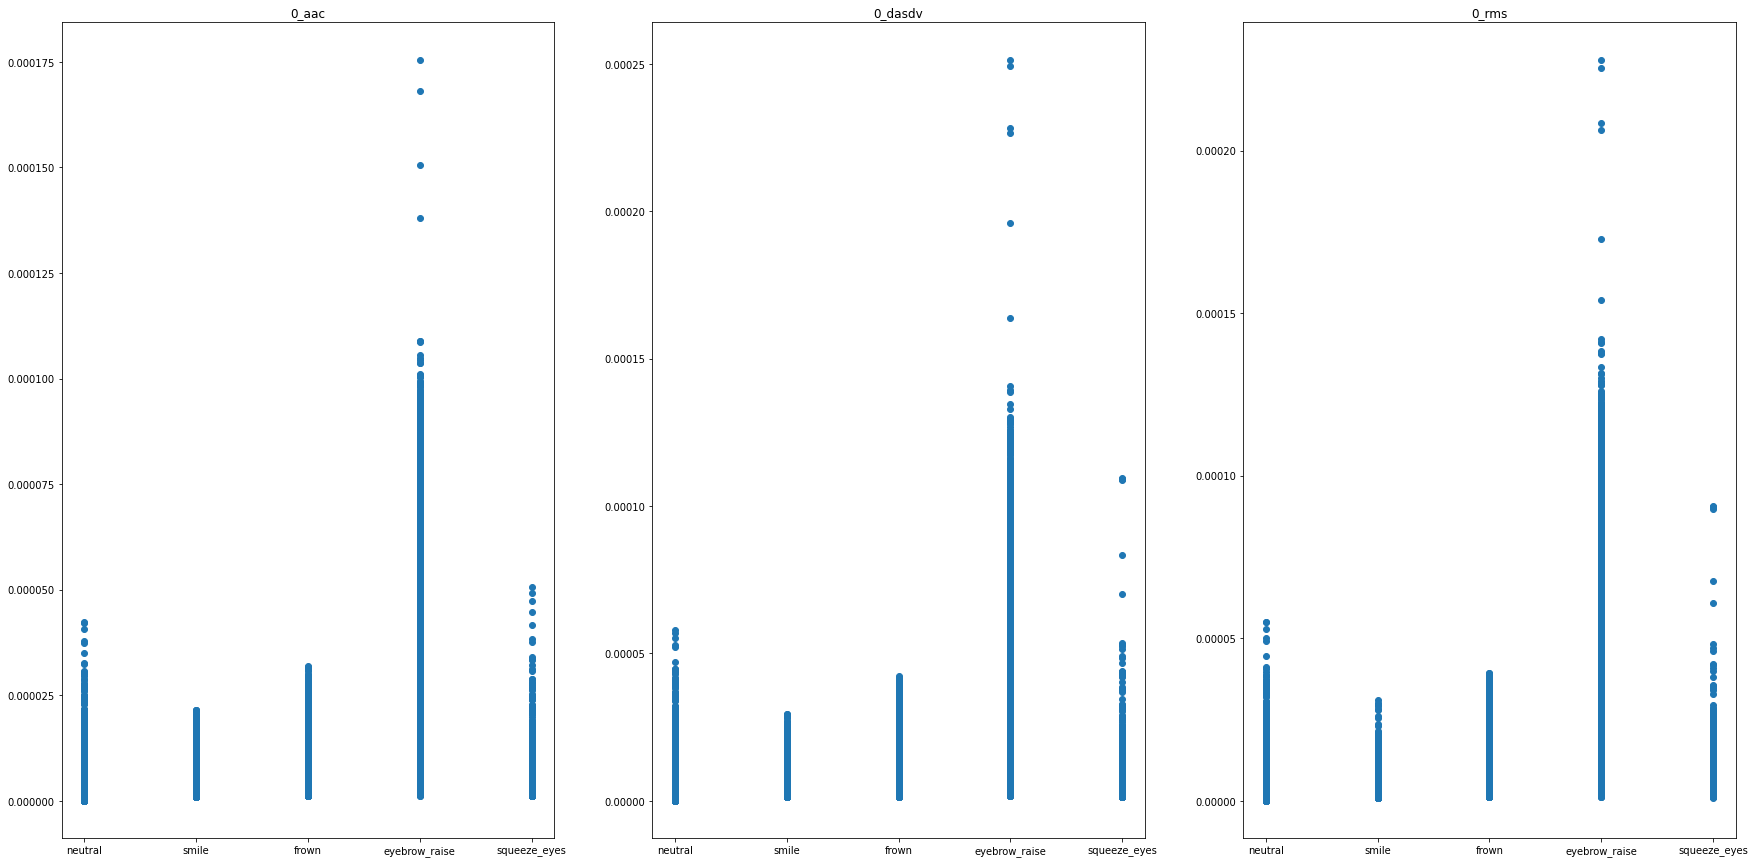

In [16]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('0_aac')
ax2.set_title('0_dasdv')
ax3.set_title('0_rms')




ax1.scatter(y_train['event'], X_train['0_aac'])
ax2.scatter(y_train['event'], X_train['0_dasdv'])
ax3.scatter(y_train['event'], X_train['0_rms'])



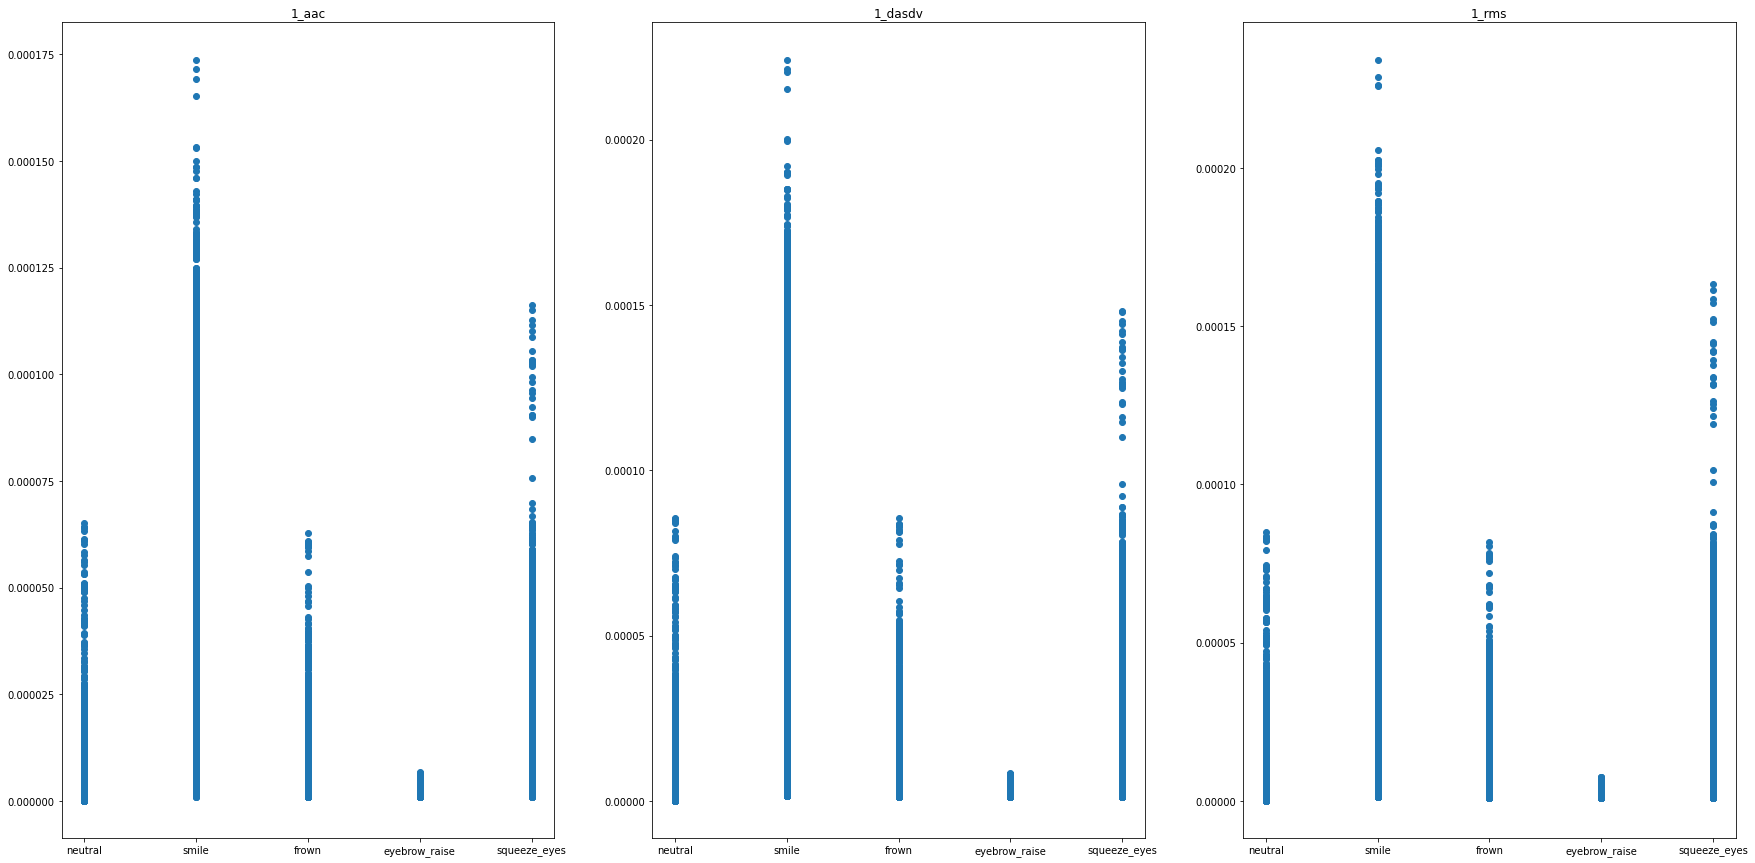

In [17]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('1_aac')
ax2.set_title('1_dasdv')
ax3.set_title('1_rms')




ax1.scatter(y_train['event'], X_train['1_aac'])
ax2.scatter(y_train['event'], X_train['1_dasdv'])
ax3.scatter(y_train['event'], X_train['1_rms'])


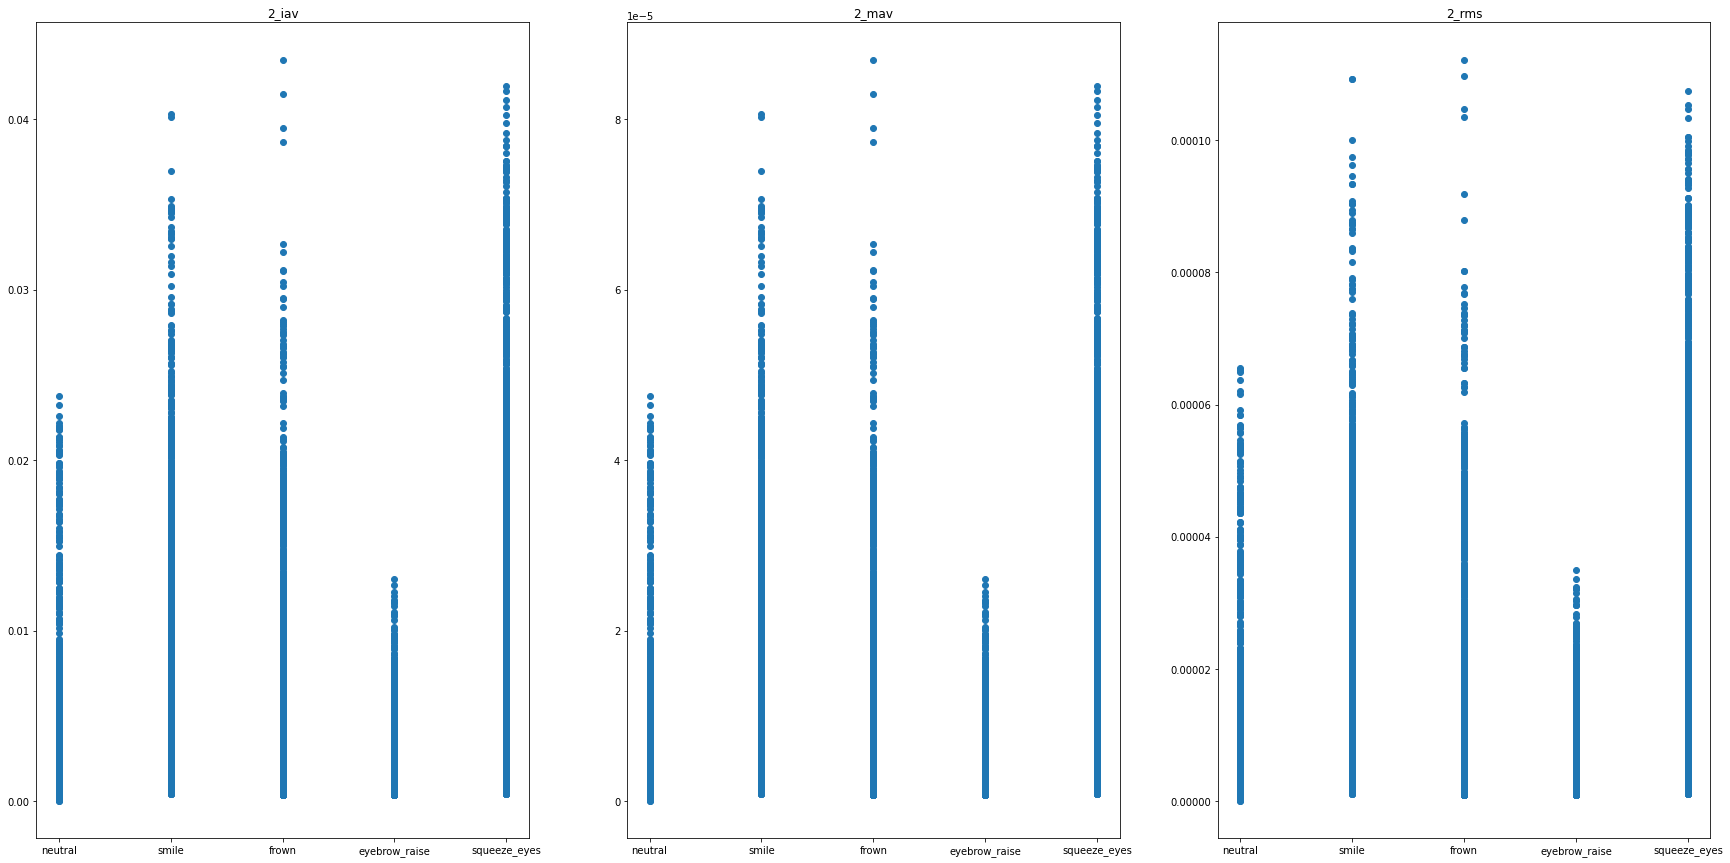

In [18]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('2_iav')
ax2.set_title('2_mav')
ax3.set_title('2_rms')




ax1.scatter(y_train['event'], X_train['2_iav'])
ax2.scatter(y_train['event'], X_train['2_mav'])
ax3.scatter(y_train['event'], X_train['2_rms'])

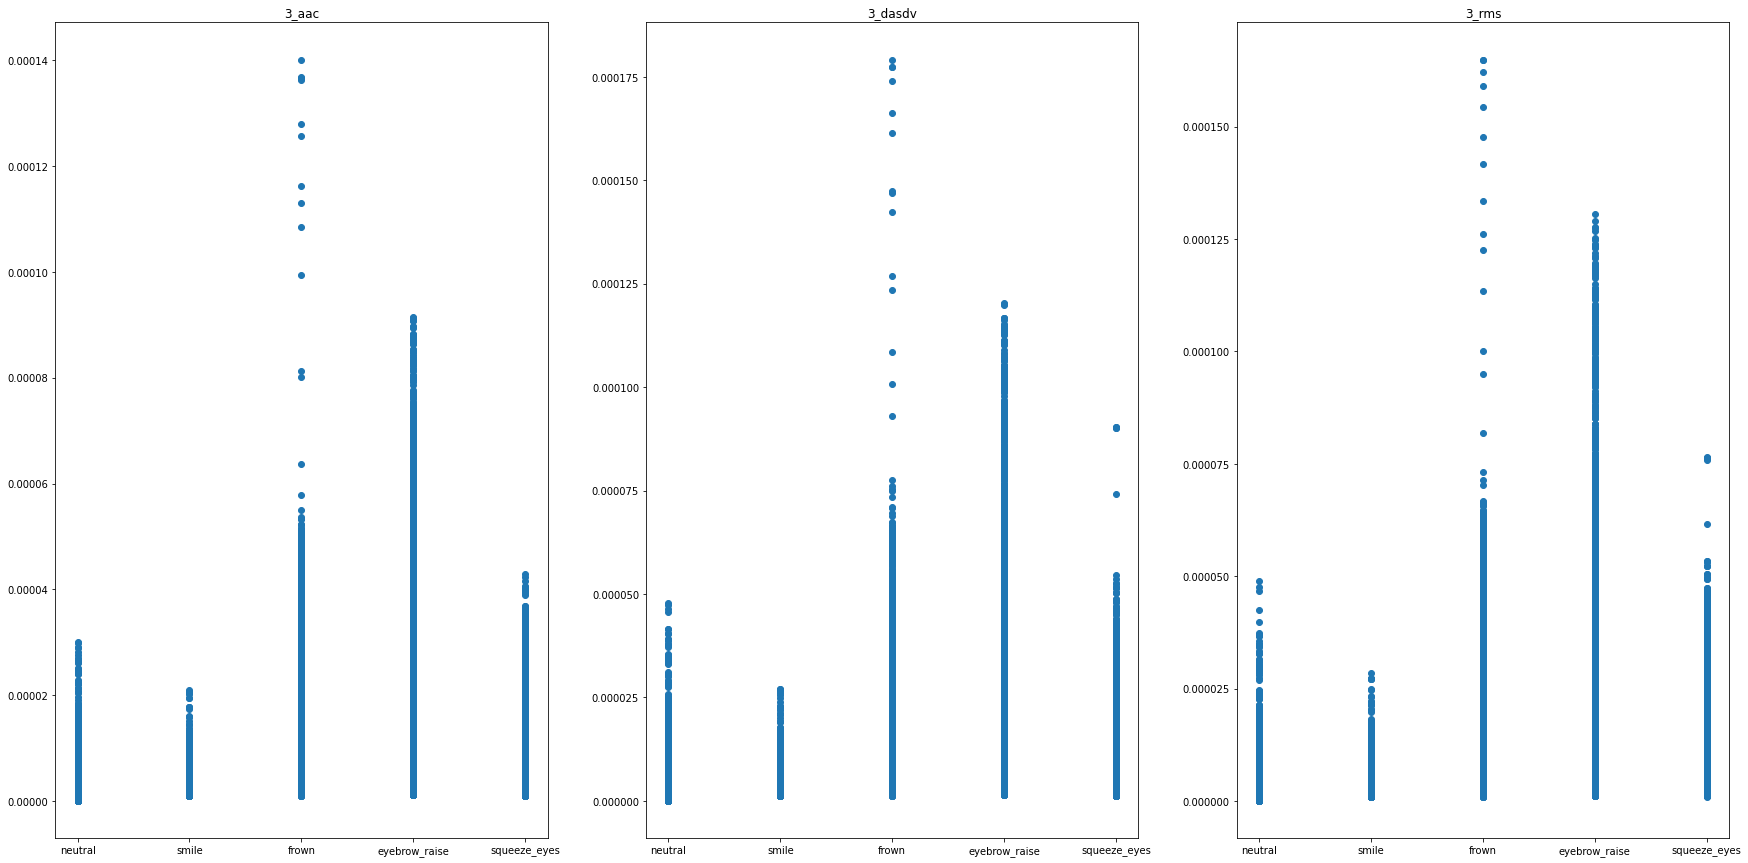

In [19]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('3_aac')
ax2.set_title('3_dasdv')
ax3.set_title('3_rms')




ax1.scatter(y_train['event'], X_train['3_aac'])
ax2.scatter(y_train['event'], X_train['3_dasdv'])
ax3.scatter(y_train['event'], X_train['3_rms'])

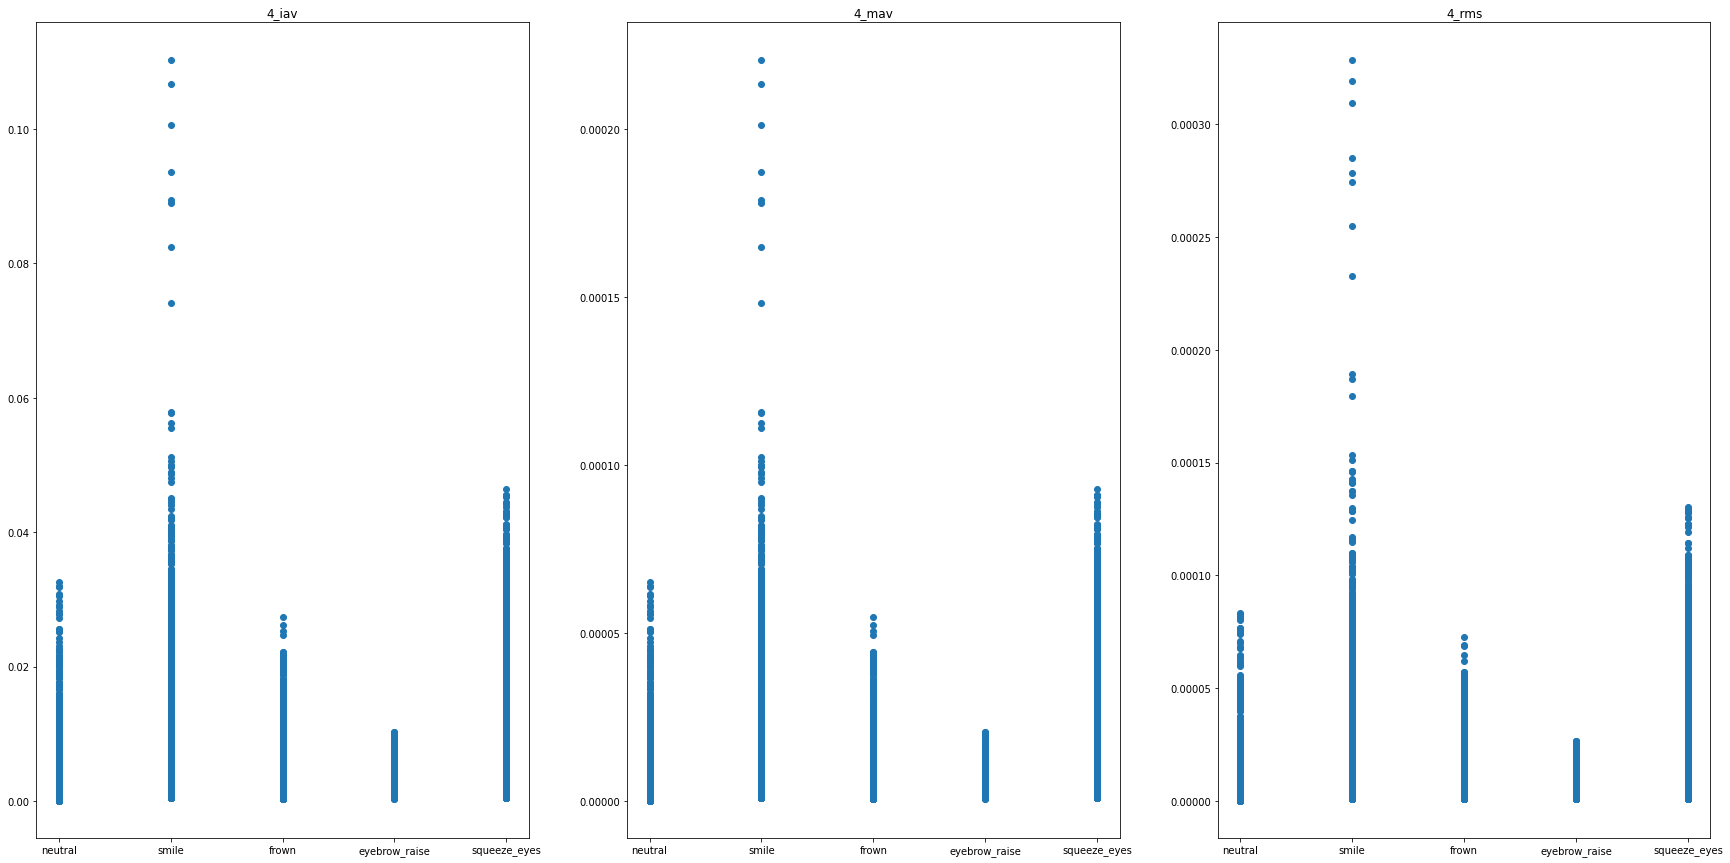

In [20]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('4_iav')
ax2.set_title('4_mav')
ax3.set_title('4_rms')




ax1.scatter(y_train['event'], X_train['4_iav'])
ax2.scatter(y_train['event'], X_train['4_mav'])
ax3.scatter(y_train['event'], X_train['4_rms'])

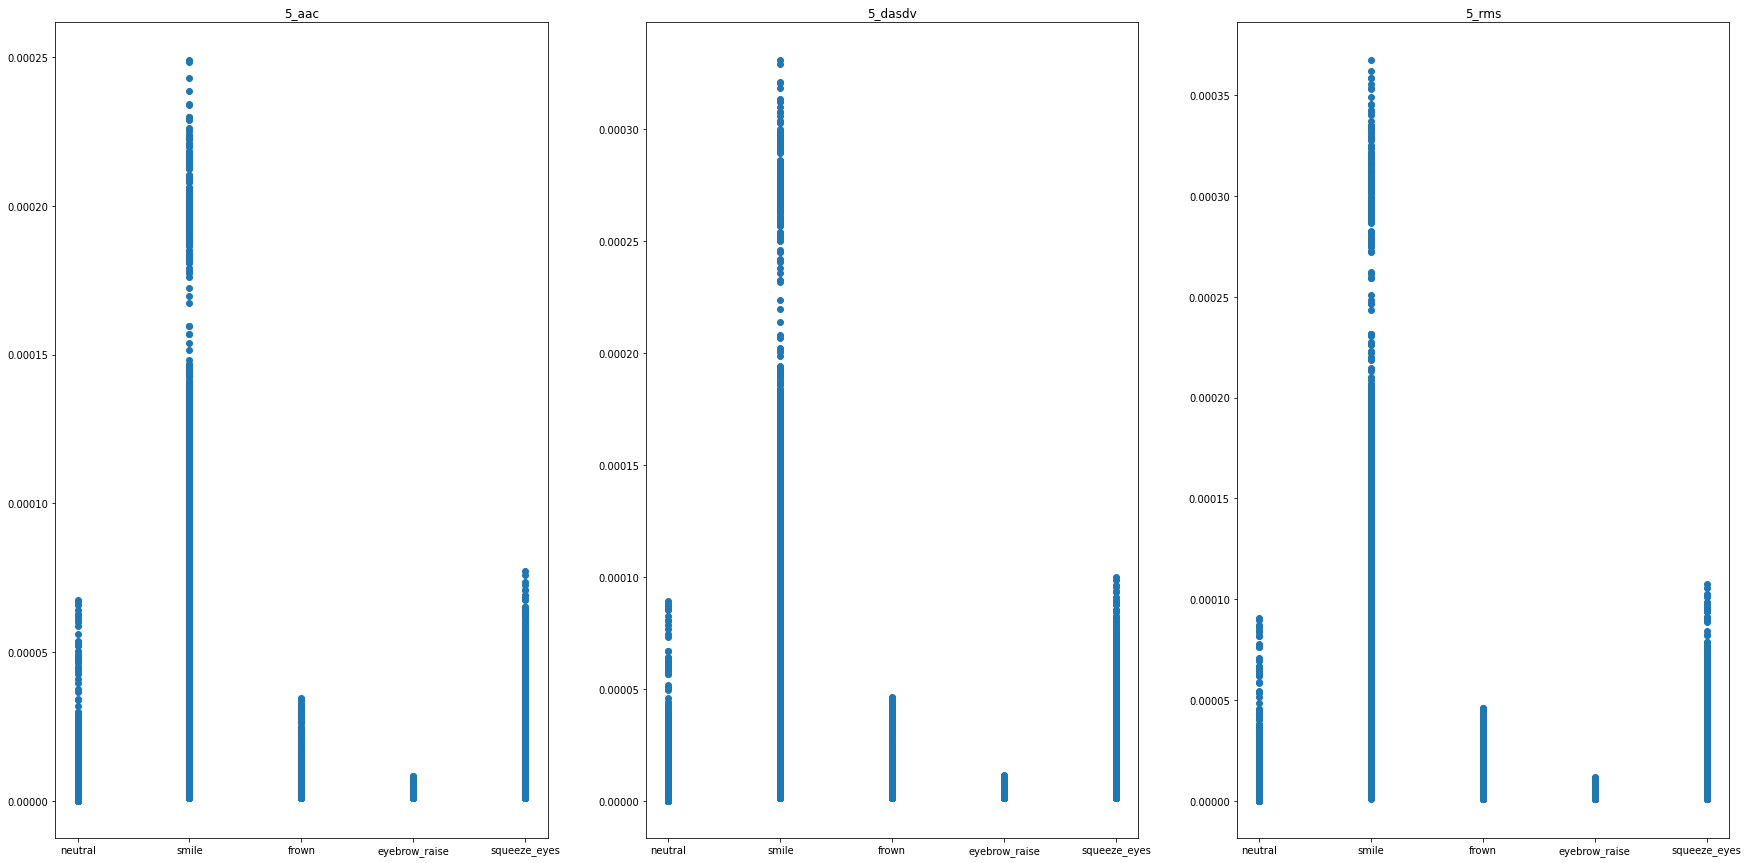

In [21]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('5_aac')
ax2.set_title('5_dasdv')
ax3.set_title('5_rms')




ax1.scatter(y_train['event'], X_train['5_aac'])
ax2.scatter(y_train['event'], X_train['5_dasdv'])
ax3.scatter(y_train['event'], X_train['5_rms'])

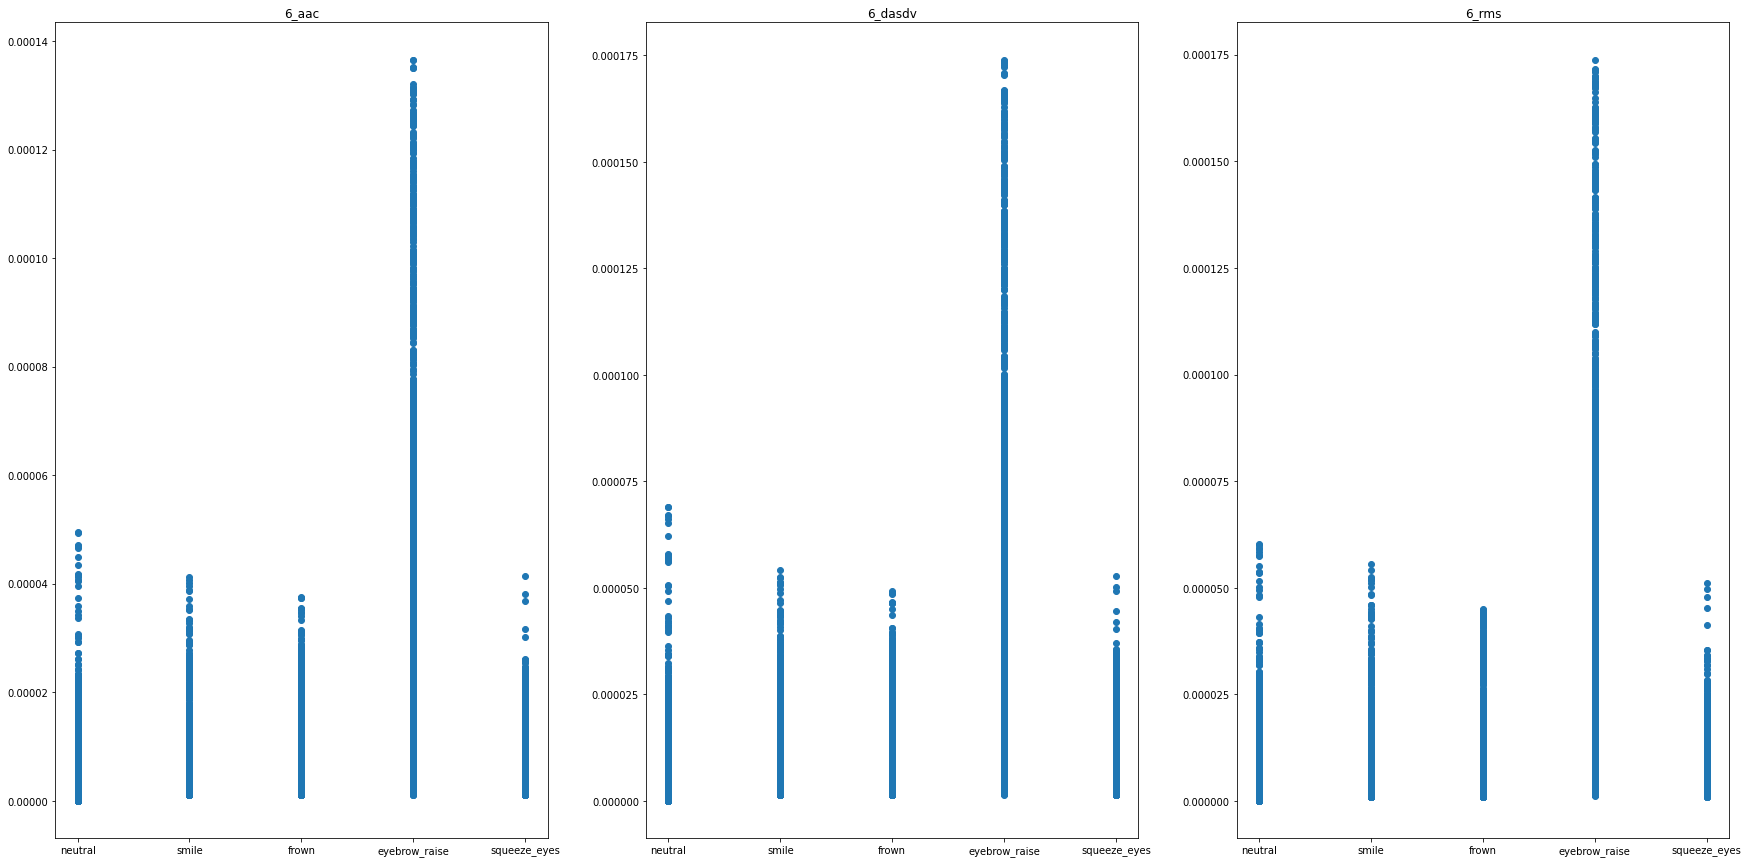

In [22]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('6_aac')
ax2.set_title('6_dasdv')
ax3.set_title('6_rms')




ax1.scatter(y_train['event'], X_train['6_aac'])
ax2.scatter(y_train['event'], X_train['6_dasdv'])
ax3.scatter(y_train['event'], X_train['6_rms'])

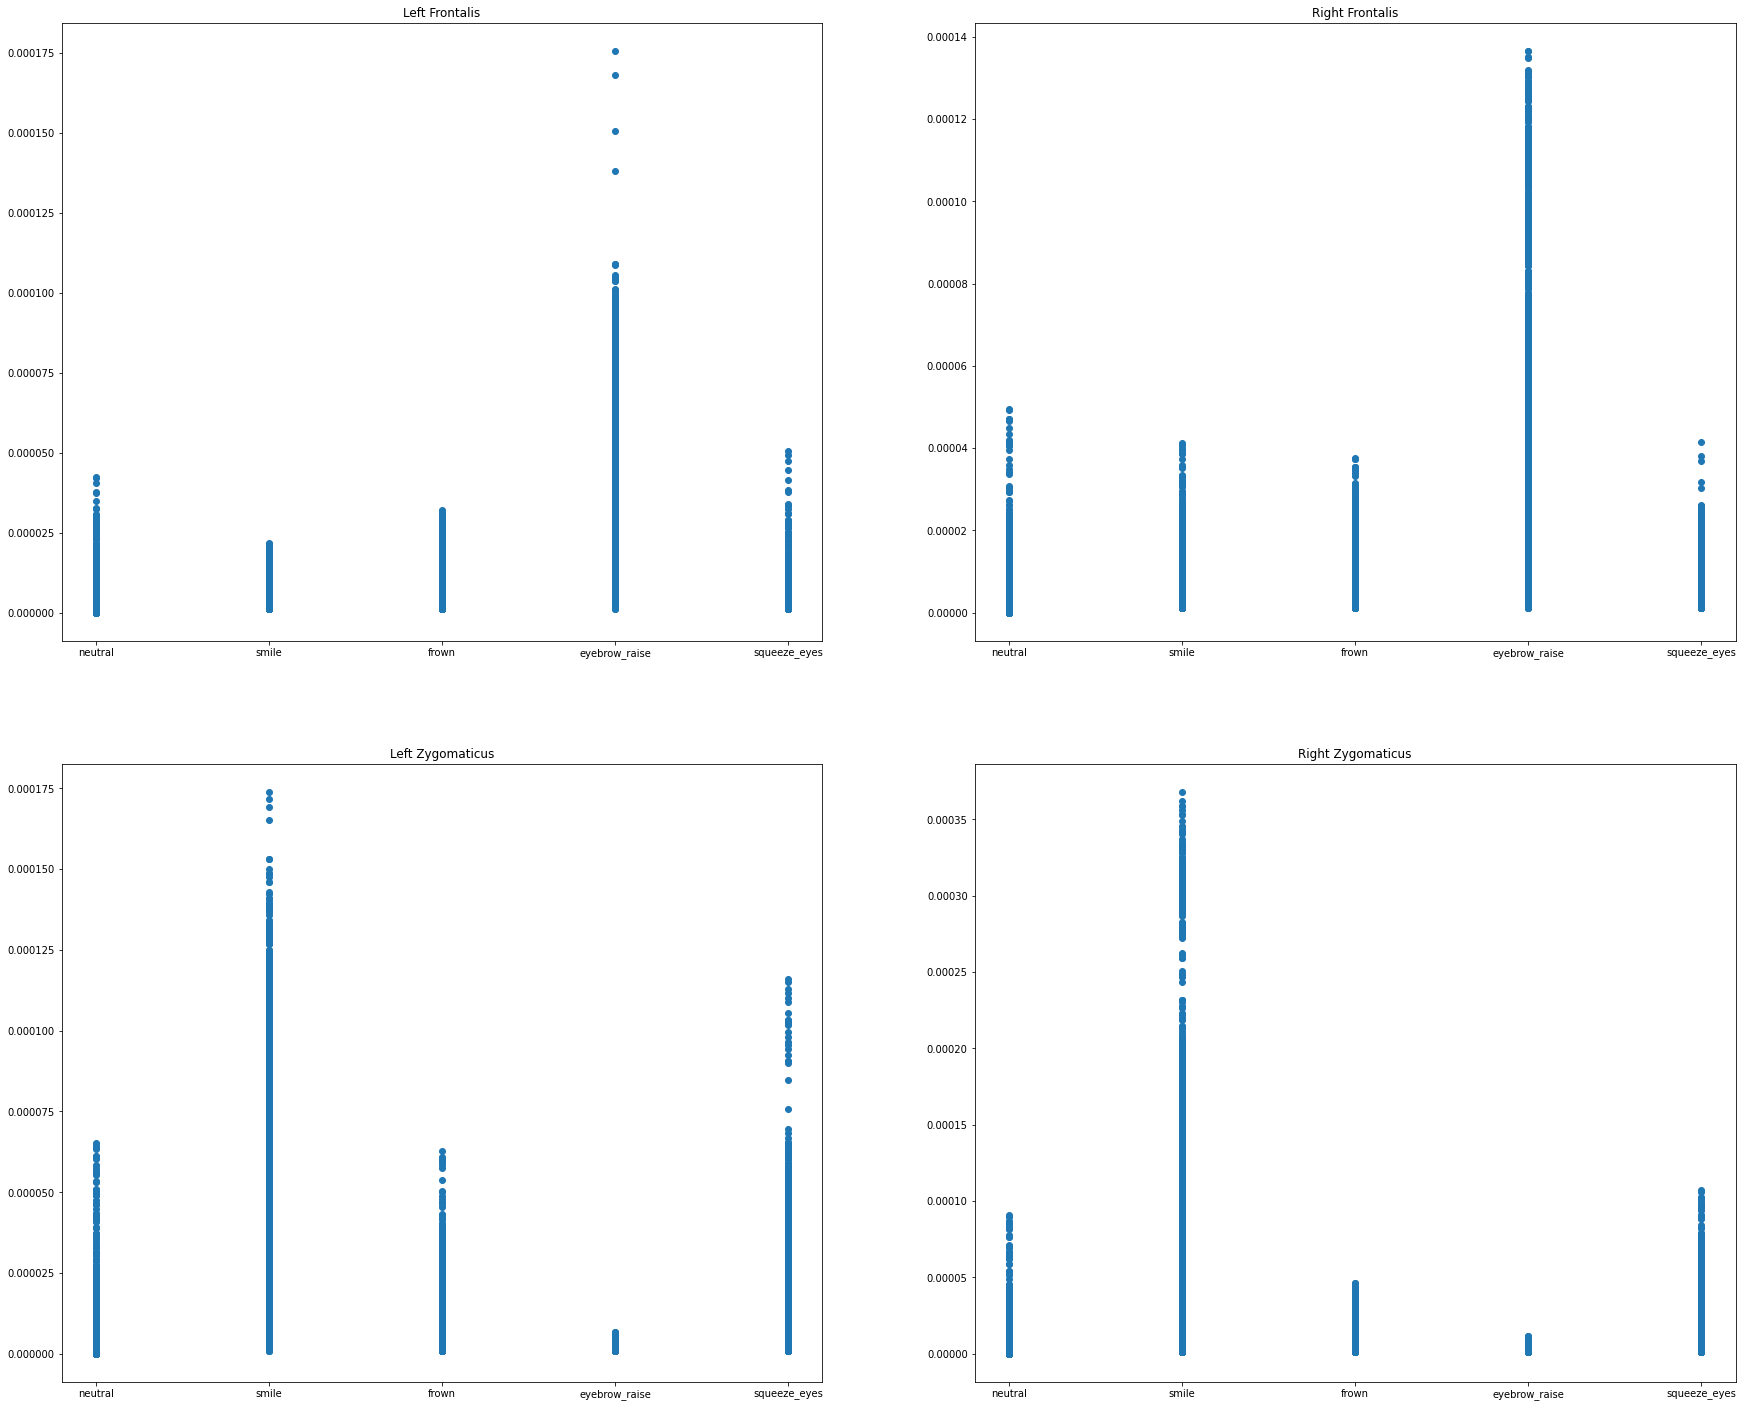

In [23]:
fig = plt.figure(figsize = (30,25))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)



ax1.set_title('Left Frontalis')
ax2.set_title('Right Frontalis')
ax3.set_title('Left Zygomaticus')
ax4.set_title('Right Zygomaticus')



ax1.scatter(y_train['event'], X_train['0_aac'])
ax2.scatter(y_train['event'], X_train['6_aac'])
ax3.scatter(y_train['event'], X_train['1_aac'])
ax4.scatter(y_train['event'], X_train['5_rms'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


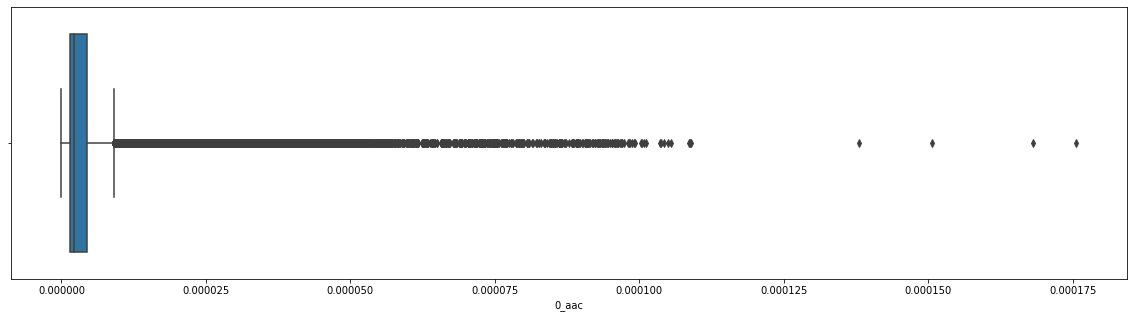

In [24]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(trainData['0_aac'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


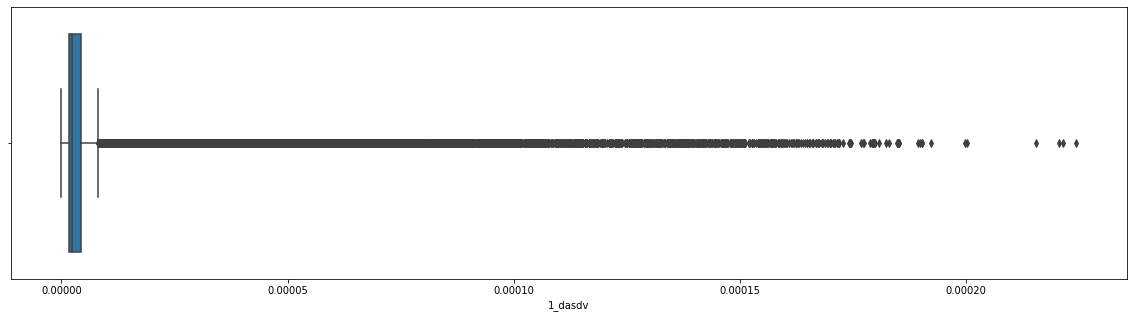

In [25]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(trainData['1_dasdv'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


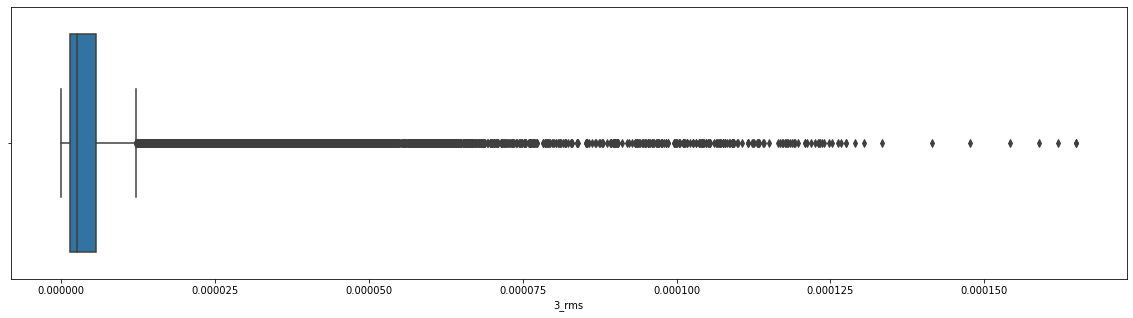

In [26]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(trainData['3_rms'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


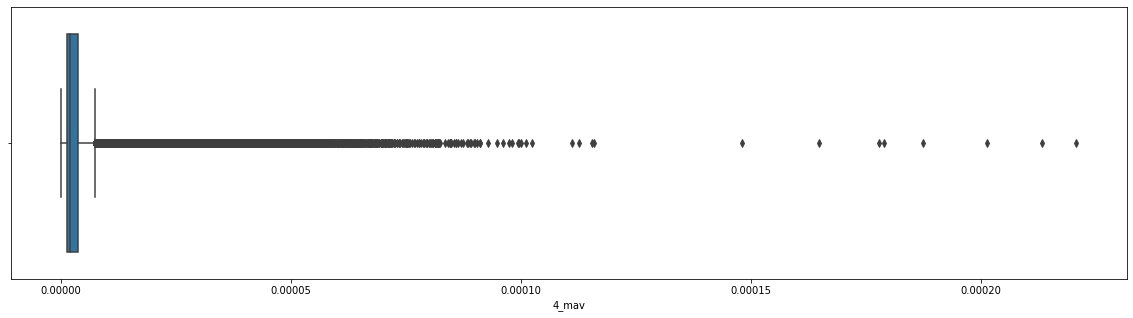

In [27]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(trainData['4_mav'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


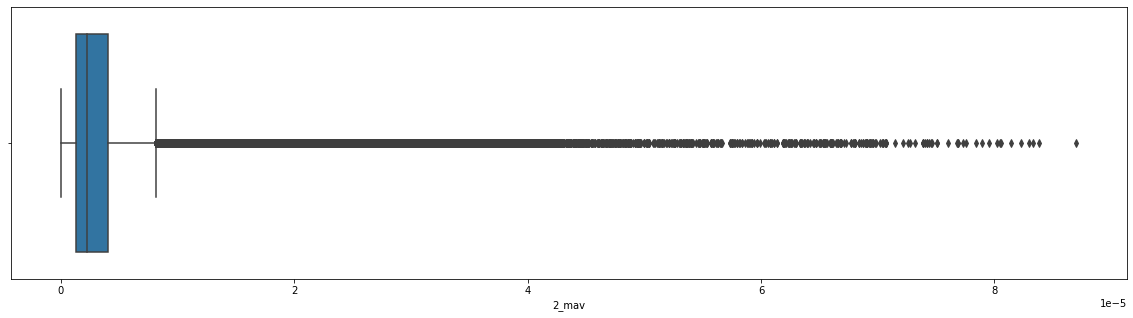

In [28]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(trainData['2_mav'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


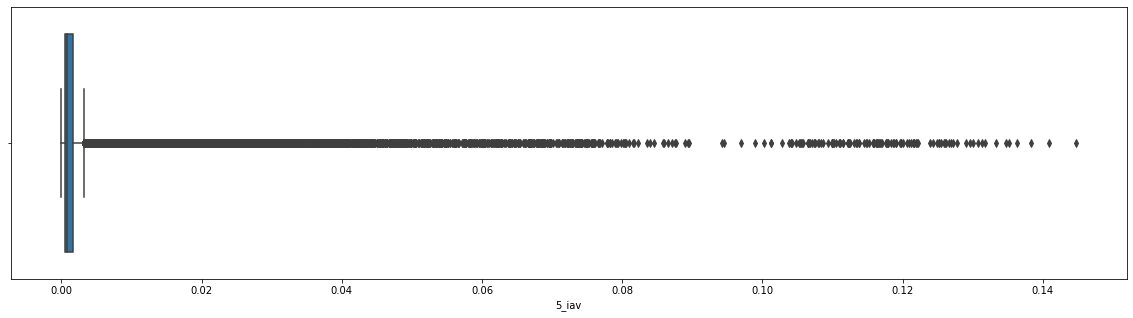

In [29]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(trainData['5_iav'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


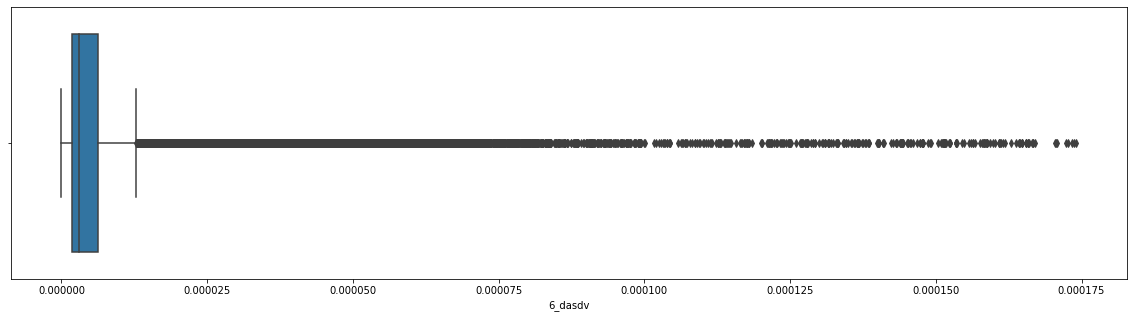

In [30]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(trainData['6_dasdv'])
plt.show()

## Training the model
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Dummy Classifier

In [31]:
dclf = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf.fit(X_train, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [32]:
score_dummy = dclf.score(X_valid, y_valid)
y_pred_dummy = dclf.predict(X_valid)
f1_dummy=f1_score(y_valid, y_pred_dummy, average='macro')
print ('Accuracy: '+str(score_dummy*100)+' %')
print ('F1-Score: '+str(f1_dummy))

Accuracy: 65.02807554874937 %
F1-Score: 0.15761700021652386


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


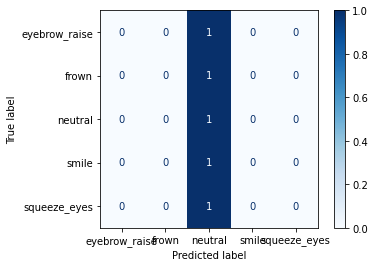

In [33]:
plot_confusion_matrix(estimator=dclf, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [34]:
score_dummy = dclf.score(X_test, y_test)
y_pred_dummy = dclf.predict(X_test)
f1_dummy=f1_score(y_test, y_pred_dummy, average='macro')
print ('Accuracy: '+str(score_dummy*100)+' %')
print ('F1-Score: '+str(f1_dummy))

Accuracy: 60.8858166922683 %
F1-Score: 0.15137646796728305


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


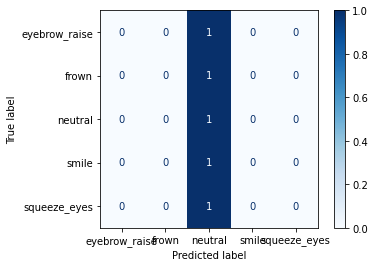

In [35]:
plot_confusion_matrix(estimator=dclf, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### Decision Tree

In [36]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
score_tree = clf_tree.score(X_valid, y_valid)
y_pred_tree = clf_tree.predict(X_valid)
f1_tree=f1_score(y_valid, y_pred_tree, average='macro')
print ('Accuracy: '+str(score_tree*100)+' %')
print ('F1-Score: '+str(f1_tree))

Accuracy: 73.35375191424195 %
F1-Score: 0.6078931080927403


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


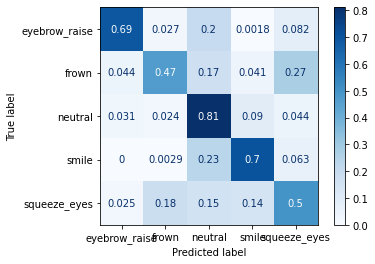

In [38]:
plot_confusion_matrix(estimator=clf_tree, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [39]:
score_tree = clf_tree.score(X_test, y_test)
y_pred_tree = clf_tree.predict(X_test)
f1_tree=f1_score(y_test, y_pred_tree, average='macro')
print ('Accuracy: '+str(score_tree*100)+' %')
print ('F1-Score: '+str(f1_tree))

Accuracy: 76.76907322068612 %
F1-Score: 0.6578004164246499


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


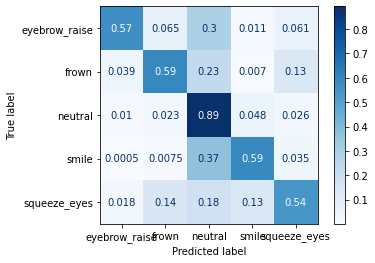

In [40]:
plot_confusion_matrix(estimator=clf_tree, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest 

In [41]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [42]:
y_pred_rf = clf_rf.predict(X_valid)
score_rf = clf_rf.score(X_valid, y_valid)
f1_rf = f1_score(y_valid, y_pred_rf, average='macro')
print ('Accuracy: '+str(score_rf*100)+' %')
print ('F1-Score: '+str(f1_rf))

Accuracy: 86.25829504849413 %
F1-Score: 0.7476918221074674


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


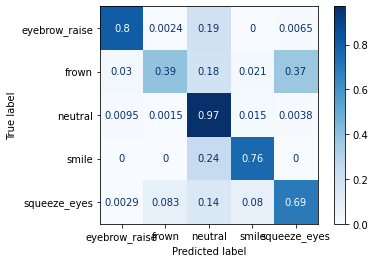

In [43]:
plot_confusion_matrix(estimator=clf_rf, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [44]:
y_pred_rf = clf_rf.predict(X_test)
score_rf = clf_rf.score(X_test, y_test)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print ('Accuracy: '+str(score_rf*100)+' %')
print ('F1-Score: '+str(f1_rf))

Accuracy: 84.90015360983104 %
F1-Score: 0.7702291386177671


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


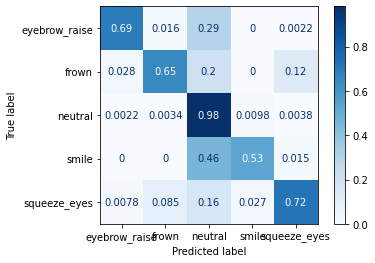

In [45]:
plot_confusion_matrix(estimator=clf_rf, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost Classifier

In [46]:
xgb = XGBClassifier(n_estimators=150, max_depth=15, learning_rate=0.3)
le = LabelEncoder()
y_trainXGB = le.fit_transform(y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
xgb.fit(X_train, y_trainXGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [48]:
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

In [49]:
y_predXGB = xgb.predict(X_valid)
predictions = [round(value) for value in y_predXGB]
score_xgb = accuracy_score(y_validXGB, predictions)
f1_xgb = f1_score(y_validXGB, predictions, average='macro')
print ('Accuracy: '+str(score_xgb*100)+' %')
print ('F1-Score: '+str(f1_xgb))

Accuracy: 86.63093415007657 %
F1-Score: 0.767161145860254


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


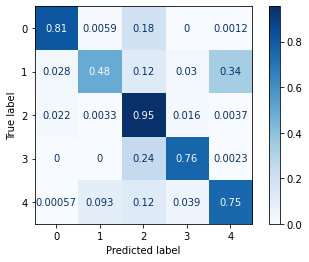

In [50]:
plot_confusion_matrix(estimator=xgb, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [51]:
y_predXGB = xgb.predict(X_test)
predictions = [round(value) for value in y_predXGB]
score_xgb = accuracy_score(y_testXGB, predictions)
f1_xgb = f1_score(y_testXGB, predictions, average='macro')
print ('Accuracy: '+str(score_xgb*100)+' %')
print ('F1-Score: '+str(f1_xgb))

Accuracy: 86.02662570404506 %
F1-Score: 0.7927827956220487


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


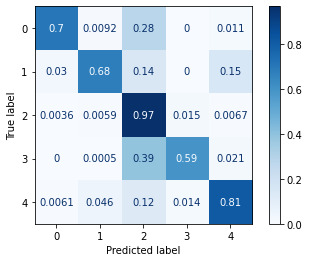

In [52]:
plot_confusion_matrix(estimator=xgb, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

<br>

## Standardization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scale= StandardScaler()
X_train_std = scale.fit_transform(X_train) 
X_valid_std = scale.fit_transform(X_valid) 
X_test_std = scale.fit_transform(X_test) 

In [55]:
names= X_train.columns

In [56]:
X_train_std=pd.DataFrame(X_train_std, columns=names)
X_train_std

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,-0.522122,-0.565168,-6.427284,15.934565,-15.899762,9.654034,6.427284,-18.785046,-38.760942,36.360228,...,0.001675,0.103566,1.718919,1.738083,-0.164710,-0.164710,-1.182548,-1.182548,-1.673800,-0.526914
1,-0.522167,-0.565130,-6.433759,15.954655,-15.914283,9.655899,6.433759,-18.812223,-38.860284,36.464797,...,-0.006972,0.119002,1.718919,1.738083,-0.164710,-0.164710,-1.196780,-1.196780,-1.702310,-0.527010
2,-0.511469,-0.536898,7.407520,-0.333337,1.386763,-0.349694,-7.407520,0.402929,-0.599354,0.172516,...,-0.058016,1.894275,1.080479,1.236433,-0.164183,-0.164183,1.291280,1.291280,-0.260452,-0.527085
3,-0.504242,-0.511970,4.923533,0.103510,1.121518,-0.753277,-4.923533,0.037765,-0.492201,0.232483,...,0.025413,0.876025,0.697414,0.825992,-0.163597,-0.163597,0.979671,0.979671,0.343116,-0.525446
4,-0.492012,-0.482085,3.736527,-0.830915,0.850616,-1.155242,-3.736527,0.784191,-0.197189,0.282218,...,-0.172937,0.665574,0.442038,0.825992,-0.163006,-0.163006,0.826149,0.826149,0.397143,-0.514144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82905,-0.456148,-0.424208,-0.281822,-0.272909,0.600647,-0.689447,0.281822,0.279998,-0.144158,0.174972,...,0.003953,1.019943,0.314350,0.096319,-0.163022,-0.163022,0.954791,0.954791,0.175043,-0.413540
82906,-0.457747,-0.424950,-0.384023,-0.416409,0.731820,-0.776594,0.384023,0.417804,-0.193884,0.200246,...,0.040631,1.129857,0.505882,0.187528,-0.163097,-0.163097,0.879356,0.879356,-0.002106,-0.408528
82907,-0.457362,-0.425271,-0.139696,-0.403797,0.579713,-0.720355,0.139696,0.407070,-0.102572,0.176458,...,0.048549,1.051206,0.378194,0.050715,-0.163159,-0.163159,0.854246,0.854246,0.044267,-0.406341
82908,-0.456909,-0.422029,0.615013,-0.851180,0.895886,-0.870945,-0.615013,0.829449,-0.219075,0.223496,...,0.054846,1.347397,1.016635,-0.268517,-0.163548,-0.163548,0.906913,0.906913,-0.163196,-0.447858


In [57]:
X_valid_std=pd.DataFrame(X_valid_std, columns=names)
X_valid_std

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,-0.309432,-0.511888,6.584028,0.742912,-0.266905,1.650844,-6.584028,-0.393835,0.189979,-0.565936,...,-0.001924,-0.248970,-1.021193,-3.246858,-0.246950,-0.246950,6.090280,6.090280,5.656831,-0.421194
1,-0.309392,-0.511733,6.562281,0.741801,-0.251991,1.646238,-6.562281,-0.394075,0.179616,-0.561402,...,-0.001924,-0.127764,-0.435296,-3.246858,-0.246950,-0.246950,6.024318,6.024318,5.322373,-0.421195
2,-0.334296,-0.491062,3.958053,1.377484,2.049719,0.058124,-3.958053,-1.042924,-1.418352,0.214281,...,0.031709,-2.913548,-4.731868,-3.198133,-0.246433,-0.246433,2.006984,2.006984,10.742264,-0.421210
3,-0.354479,-0.465254,4.705832,1.089255,1.782854,0.071266,-4.705832,-0.758677,-1.245697,0.183712,...,-0.046767,-2.295074,-4.276171,-3.198133,-0.246105,-0.246105,3.115866,3.115866,9.322988,-0.421824
4,-0.376187,-0.439158,3.991435,1.170859,1.850301,-0.107815,-3.991435,-0.870205,-1.294198,0.228257,...,0.117659,-1.458701,-1.932587,-3.198133,-0.245696,-0.245696,3.003488,3.003488,5.824910,-0.426108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,-0.314658,-0.328136,-0.157127,0.033003,0.149134,0.812505,0.157127,-0.009401,0.042771,-0.258817,...,0.096771,-1.275344,-1.346691,-1.005501,-0.220590,-0.220590,-0.684579,-0.684579,0.441750,-0.255934
19586,-0.339843,-0.345451,0.056861,-0.118017,0.150836,0.677982,-0.056861,0.143460,0.096703,-0.227890,...,0.091835,-1.268696,-1.216491,-0.713150,-0.219313,-0.219313,-0.692394,-0.692394,0.422989,-0.264890
19587,-0.363186,-0.360055,-0.155874,-0.269191,0.359605,0.287871,0.155874,0.291225,-0.019036,-0.082430,...,0.388254,-0.632551,-0.825894,0.310077,-0.210733,-0.210733,0.335218,0.335218,0.980834,-0.122509
19588,-0.390718,-0.381586,0.151010,-0.571238,0.855080,-0.086410,-0.151010,0.589726,-0.350058,0.082963,...,-0.670506,-0.639685,-0.825894,-0.713150,-0.212673,-0.212673,0.431589,0.431589,1.095216,-0.093281


In [58]:
X_test_std=pd.DataFrame(X_test_std, columns=names)
X_test_std

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,-0.543922,-0.611169,3.217059,4.908629,-1.839622,1.451972,-3.217059,-4.123599,-1.363663,-0.024946,...,0.023645,-2.166288,-1.448059,-0.540801,-0.228520,-0.228520,-1.475178,-1.475178,-0.164402,-0.395478
1,-0.543935,-0.610649,3.223168,4.935209,-1.860126,1.450891,-3.223168,-4.145170,-1.378326,-0.020367,...,-0.001663,-2.209685,-1.448059,-0.540801,-0.228516,-0.228516,-1.601712,-1.601712,-0.518901,-0.395280
2,-0.531220,-0.578742,4.146661,0.287967,0.946605,0.388543,-4.146661,-0.144980,-0.526607,-0.008548,...,-0.021126,-1.827803,-1.335593,-2.172361,-0.227521,-0.227521,1.267194,1.267194,5.815936,-0.395555
3,-0.517010,-0.543309,2.519532,0.195411,1.017810,-0.155791,-2.519532,-0.108045,-0.566340,0.134364,...,0.090171,-1.433375,-1.335593,-2.172361,-0.226520,-0.226520,1.417133,1.417133,4.676765,-0.395166
4,-0.497078,-0.505146,1.599425,-0.131500,0.711159,-0.476554,-1.599425,0.168130,-0.294144,0.178389,...,0.124718,-0.877178,-0.660794,-2.172361,-0.225711,-0.225711,1.108184,1.108184,2.721351,-0.395913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19525,-0.466402,-0.444407,0.120924,-0.390834,1.025841,-0.776797,-0.120924,0.399766,-0.473116,0.278416,...,-0.075252,-0.166841,-0.548327,-0.506810,-0.224286,-0.224286,0.110088,0.110088,0.311832,-0.430304
19526,-0.461918,-0.441009,0.646011,-0.698273,1.059054,-0.749117,-0.646011,0.692481,-0.442839,0.268129,...,0.082788,-0.101239,-0.492094,-0.506810,-0.224377,-0.224377,0.096054,0.096054,0.227215,-0.426559
19527,-0.451122,-0.435513,0.285912,-0.638747,1.096436,-0.614812,-0.285912,0.638075,-0.482631,0.238117,...,-0.114144,-0.133204,-0.492094,-0.268874,-0.223892,-0.223892,-0.003420,-0.003420,0.142367,-0.393406
19528,-0.448961,-0.431005,0.447961,-0.814982,1.044506,-0.587137,-0.447961,0.805210,-0.409683,0.222293,...,0.050378,-0.133378,-0.435861,-0.268874,-0.223534,-0.223534,-0.053831,-0.053831,0.082699,-0.364149


### Dummy Classifier - Standardization

In [59]:
print(X_train_std.shape)
print(y_train.shape)

(82910, 238)
(82910, 1)


In [60]:
dclf_std = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_std.fit(X_train_std, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [61]:
score_dummy_std = dclf_std.score(X_valid_std, y_valid)
y_pred_dummy_std = dclf_std.predict(X_valid_std)
f1_dummy_std=f1_score(y_valid, y_pred_dummy_std, average='macro')
print ('Accuracy: '+str(score_dummy_std*100)+' %')
print ('F1-Score: '+str(f1_dummy_std))

Accuracy: 65.02807554874937 %
F1-Score: 0.15761700021652386


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


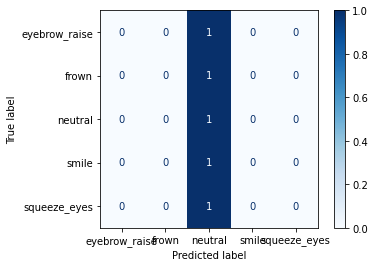

In [62]:
plot_confusion_matrix(estimator=dclf_std, X=X_valid_std, y_true=y_valid,
                      normalize='true', cmap='Blues')

### Decision Tree - Standardization

In [63]:
clf_tree_std = tree.DecisionTreeClassifier()
clf_tree_std.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [64]:
score_tree_std = clf_tree_std.score(X_valid_std, y_valid)
y_pred_tree_std = clf_tree_std.predict(X_valid_std)
f1_tree_std=f1_score(y_valid, y_pred_tree_std, average='macro')
print ('Accuracy: '+str(score_tree_std*100)+' %')
print ('F1-Score: '+str(f1_tree_std))

Accuracy: 60.48494129657988 %
F1-Score: 0.47412443458964654


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


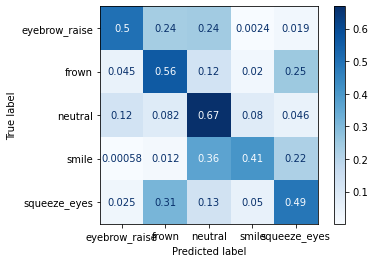

In [65]:
plot_confusion_matrix(estimator=clf_tree_std, X=X_valid_std, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [66]:
score_tree_std = clf_tree_std.score(X_test_std, y_test)
y_pred_tree_std = clf_tree_std.predict(X_test_std)
f1_tree_std=f1_score(y_test, y_pred_tree_std, average='macro')
print ('Accuracy: '+str(score_tree_std*100)+' %')
print ('F1-Score: '+str(f1_tree_std))

Accuracy: 61.51561699948797 %
F1-Score: 0.5276563995682219


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


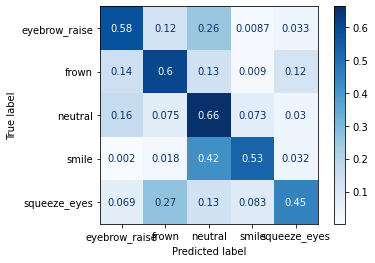

In [67]:
plot_confusion_matrix(estimator=clf_tree_std, X=X_test_std, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest - Standardization

In [68]:
clf_rf_std = RandomForestClassifier(random_state=42)
clf_rf_std.fit(X_train_std, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [69]:
y_pred_rf_std = clf_rf_std.predict(X_valid_std)
score_rf_std = clf_rf_std.score(X_valid_std, y_valid)
f1_rf_std = f1_score(y_valid, y_pred_rf_std, average='macro')
print ('Accuracy: '+str(score_rf_std*100)+' %')
print ('F1-Score: '+str(f1_rf_std))

Accuracy: 83.7723328228688 %
F1-Score: 0.6981810176966408


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


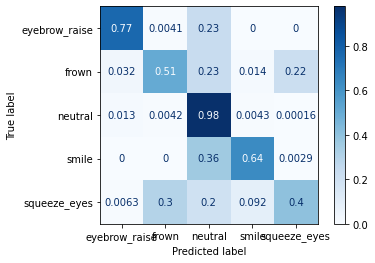

In [70]:
plot_confusion_matrix(estimator=clf_rf_std, X=X_valid_std, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [71]:
y_pred_rf_std = clf_rf_std.predict(X_test_std)
score_rf_std = clf_rf_std.score(X_test_std, y_test)
f1_rf_std = f1_score(y_test, y_pred_rf_std, average='macro')
print ('Accuracy: '+str(score_rf_std*100)+' %')
print ('F1-Score: '+str(f1_rf_std))

Accuracy: 83.75832053251409 %
F1-Score: 0.7485380400750697


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


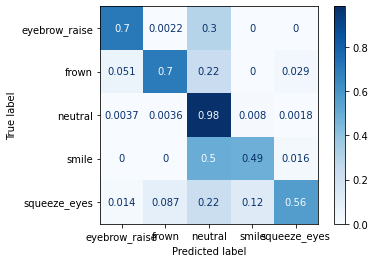

In [72]:
plot_confusion_matrix(estimator=clf_rf_std, X=X_test_std, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - Standardization

In [73]:
xgb_std = XGBClassifier(n_estimators=100)

In [74]:
xgb_std.fit(X_train_std, y_trainXGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [75]:
y_predXGB_std = xgb_std.predict(X_valid_std)
predictions_std = [round(value) for value in y_predXGB_std]
score_xgb_std = accuracy_score(y_validXGB, predictions_std)
f1_xgb_std = f1_score(y_validXGB, predictions_std, average='macro')
print ('Accuracy: '+str(score_xgb_std*100)+' %')
print ('F1-Score: '+str(f1_xgb_std))

Accuracy: 83.68555385400714 %
F1-Score: 0.6961238971604586


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


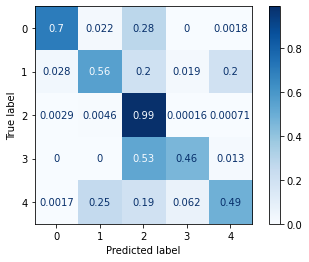

In [76]:
plot_confusion_matrix(estimator=xgb_std, X=X_valid_std, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [77]:
y_predXGB_std = xgb_std.predict(X_test_std)
predictions_std = [round(value) for value in y_predXGB_std]
score_xgb_std = accuracy_score(y_testXGB, predictions_std)
f1_xgb_std = f1_score(y_testXGB, predictions_std, average='macro')
print ('Accuracy: '+str(score_xgb_std*100)+' %')
print ('F1-Score: '+str(f1_xgb_std))

Accuracy: 81.57706093189964 %
F1-Score: 0.7051783992129381


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


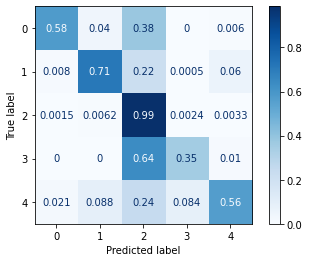

In [78]:
plot_confusion_matrix(estimator=xgb_std, X=X_test_std, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

<br>

## Normalization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [80]:
X_train_norm = scaler.fit_transform(X_train) 
X_valid_norm = scaler.fit_transform(X_valid) 
X_test_norm = scaler.fit_transform(X_test) 

In [81]:
X_train_norm=pd.DataFrame(X_train_norm, columns=names)
X_train_norm

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,0.002998,0.000093,0.111243,0.848564,0.146227,0.896924,0.888757,0.193294,0.392795,0.505383,...,0.450527,0.346192,0.404,0.404,8.090131e-08,8.090131e-08,0.084401,0.084401,0.033932,0.000372
1,0.002995,0.000095,0.110969,0.849304,0.145730,0.897032,0.889031,0.192458,0.391431,0.506741,...,0.450351,0.347239,0.404,0.404,8.127696e-08,8.127696e-08,0.083298,0.083298,0.033332,0.000366
2,0.003537,0.001428,0.695357,0.249227,0.737620,0.315410,0.304643,0.784095,0.916645,0.035409,...,0.449313,0.467700,0.364,0.360,2.092998e-05,2.092998e-05,0.276029,0.276029,0.063711,0.000361
3,0.003903,0.002605,0.590481,0.265321,0.728546,0.291950,0.409519,0.772852,0.918116,0.036188,...,0.451010,0.398607,0.340,0.324,4.414332e-05,4.414332e-05,0.251891,0.251891,0.076428,0.000466
4,0.004523,0.004015,0.540365,0.230895,0.719278,0.268583,0.459635,0.795834,0.922165,0.036833,...,0.446975,0.384327,0.324,0.324,6.754144e-05,6.754144e-05,0.239999,0.239999,0.077567,0.001193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82905,0.006339,0.006748,0.370708,0.251453,0.710726,0.295660,0.629292,0.780310,0.922893,0.035441,...,0.450574,0.408372,0.316,0.260,6.690306e-05,6.690306e-05,0.249964,0.249964,0.072887,0.007657
82906,0.006258,0.006713,0.366393,0.246166,0.715214,0.290594,0.633607,0.784553,0.922211,0.035769,...,0.451320,0.415831,0.328,0.268,6.392727e-05,6.392727e-05,0.244121,0.244121,0.069155,0.007979
82907,0.006277,0.006698,0.376709,0.246631,0.710010,0.293863,0.623291,0.784223,0.923464,0.035460,...,0.451481,0.410494,0.320,0.256,6.147947e-05,6.147947e-05,0.242176,0.242176,0.070132,0.008120
82908,0.006300,0.006851,0.408573,0.230148,0.720826,0.285110,0.591427,0.797228,0.921865,0.036071,...,0.451609,0.430592,0.360,0.228,4.606984e-05,4.606984e-05,0.246255,0.246255,0.065760,0.005452


In [82]:
X_valid_norm=pd.DataFrame(X_valid_norm, columns=names)
X_valid_norm

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,0.021111,0.001014,0.689949,0.259515,0.745331,0.503061,0.310051,0.863210,0.984904,0.004450,...,0.518533,0.592606,0.420000,0.000,0.000000e+00,0.000000e+00,0.920336,0.920336,0.190591,0.012454
1,0.021115,0.001031,0.688860,0.259471,0.745870,0.502826,0.311140,0.863201,0.984788,0.004498,...,0.518533,0.606522,0.480000,0.000,3.145475e-37,3.145475e-37,0.913316,0.913316,0.182717,0.012454
2,0.018476,0.003304,0.558443,0.284363,0.829046,0.421731,0.441557,0.840751,0.966992,0.012747,...,0.519802,0.286667,0.040000,0.004,4.192546e-05,4.192546e-05,0.485764,0.485764,0.310323,0.012453
3,0.016337,0.006143,0.595891,0.273077,0.819403,0.422402,0.404109,0.850586,0.968915,0.012422,...,0.516840,0.357679,0.086667,0.004,6.849247e-05,6.849247e-05,0.603779,0.603779,0.276907,0.012388
4,0.014037,0.009012,0.560115,0.276272,0.821840,0.413258,0.439885,0.846727,0.968374,0.012896,...,0.523046,0.453708,0.326667,0.004,1.016478e-04,1.016478e-04,0.591819,0.591819,0.194548,0.011936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,0.020557,0.021221,0.352359,0.231717,0.760365,0.460252,0.647641,0.876511,0.983264,0.007716,...,0.522258,0.474761,0.386667,0.184,2.136508e-03,2.136508e-03,0.199309,0.199309,0.067807,0.029880
19586,0.017888,0.019317,0.363075,0.225803,0.760427,0.453383,0.636925,0.881800,0.983865,0.008045,...,0.522072,0.475524,0.400000,0.208,2.240006e-03,2.240006e-03,0.198477,0.198477,0.067365,0.028936
19587,0.015415,0.017711,0.352422,0.219884,0.767971,0.433463,0.647578,0.886913,0.982576,0.009592,...,0.533259,0.548564,0.440000,0.292,2.935472e-03,2.935472e-03,0.307843,0.307843,0.080499,0.043949
19588,0.012497,0.015343,0.367790,0.208056,0.785876,0.414351,0.632210,0.897241,0.978889,0.011351,...,0.493300,0.547745,0.440000,0.208,2.778246e-03,2.778246e-03,0.318099,0.318099,0.083192,0.047031


In [83]:
X_test_norm=pd.DataFrame(X_test_norm, columns=names)
X_test_norm

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,0.006236,0.000763,0.541276,0.469026,0.765808,0.482620,0.458724,0.703574,0.944124,0.044873,...,0.446400,0.162850,0.192771,0.192771,0.000003,0.000003,0.077203,0.077203,0.092724,0.014761
1,0.006234,0.000817,0.541563,0.470076,0.764853,0.482556,0.458437,0.702781,0.943912,0.044938,...,0.445770,0.159611,0.192771,0.192771,0.000003,0.000003,0.063822,0.063822,0.079413,0.014781
2,0.007533,0.004085,0.585056,0.286467,0.895602,0.419117,0.414944,0.849881,0.956207,0.045104,...,0.445285,0.188115,0.200803,0.000000,0.000080,0.000080,0.367220,0.367220,0.317277,0.014753
3,0.008984,0.007714,0.508425,0.282810,0.898919,0.386612,0.491575,0.851239,0.955633,0.047118,...,0.448057,0.217556,0.200803,0.000000,0.000158,0.000158,0.383077,0.383077,0.274503,0.014792
4,0.011020,0.011623,0.465091,0.269894,0.884634,0.367458,0.534909,0.861395,0.959563,0.047738,...,0.448918,0.259072,0.248996,0.000000,0.000220,0.000220,0.350404,0.350404,0.201080,0.014718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19525,0.014153,0.017844,0.395459,0.259648,0.899293,0.349529,0.604541,0.869913,0.956979,0.049147,...,0.443937,0.312094,0.257028,0.196787,0.000330,0.000330,0.244851,0.244851,0.110606,0.011297
19526,0.014611,0.018192,0.420189,0.247502,0.900840,0.351182,0.579811,0.880677,0.957416,0.049002,...,0.447873,0.316990,0.261044,0.196787,0.000323,0.000323,0.243367,0.243367,0.107429,0.011670
19527,0.015714,0.018755,0.403230,0.249853,0.902581,0.359202,0.596770,0.878676,0.956842,0.048579,...,0.442968,0.314605,0.261044,0.224900,0.000361,0.000361,0.232847,0.232847,0.104243,0.014967
19528,0.015935,0.019217,0.410862,0.242891,0.900162,0.360854,0.589138,0.884823,0.957895,0.048356,...,0.447066,0.314591,0.265060,0.224900,0.000389,0.000389,0.227516,0.227516,0.102002,0.017877


### Dummy Classifier - Normalization

In [84]:
dclf_norm = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_norm.fit(X_train_norm, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [85]:
score_dummy_norm = dclf_norm.score(X_valid_norm, y_valid)
y_pred_dummy_norm = dclf_norm.predict(X_valid_norm)
f1_dummy_norm=f1_score(y_valid, y_pred_dummy_norm, average='macro')
print ('Accuracy: '+str(score_dummy_norm*100)+' %')
print ('F1-Score: '+str(f1_dummy_norm))

Accuracy: 65.02807554874937 %
F1-Score: 0.15761700021652386


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


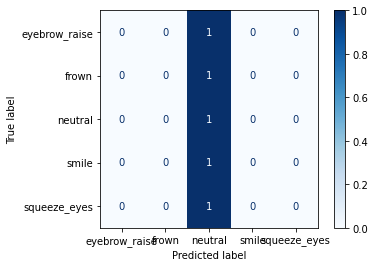

In [86]:
plot_confusion_matrix(estimator=dclf_norm, X=X_valid_norm, y_true=y_valid,
                      normalize='true', cmap='Blues')

### Decision Tree - Normalization

In [87]:
clf_tree_norm = tree.DecisionTreeClassifier()
clf_tree_norm.fit(X_train_norm, y_train)

DecisionTreeClassifier()

In [88]:
score_tree_norm = clf_tree_norm.score(X_valid_norm, y_valid)
y_pred_tree_norm = clf_tree_norm.predict(X_valid_norm)
f1_tree_norm=f1_score(y_valid, y_pred_tree_norm, average='macro')
print ('Accuracy: '+str(score_tree_norm*100)+' %')
print ('F1-Score: '+str(f1_tree_norm))

Accuracy: 37.68759571209801 %
F1-Score: 0.24013378928147558


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


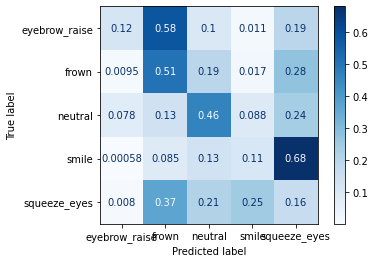

In [89]:
plot_confusion_matrix(estimator=clf_tree_norm, X=X_valid_norm, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [90]:
score_tree_norm = clf_tree_norm.score(X_test_norm, y_test)
y_pred_tree_norm = clf_tree_norm.predict(X_test_norm)
f1_tree_norm=f1_score(y_test, y_pred_tree_norm, average='macro')
print ('Accuracy: '+str(score_tree_norm*100)+' %')
print ('F1-Score: '+str(f1_tree_norm))

Accuracy: 37.94162826420891 %
F1-Score: 0.3240766050519318


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


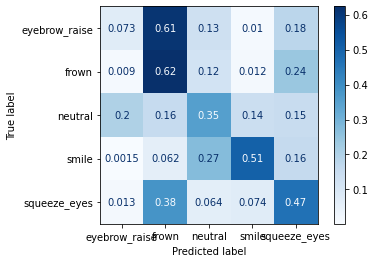

In [91]:
plot_confusion_matrix(estimator=clf_tree_norm, X=X_test_norm, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest - Normalization

In [92]:
clf_rf_norm = RandomForestClassifier(random_state=42)
clf_rf_norm.fit(X_train_norm, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [93]:
y_pred_rf_norm = clf_rf_norm.predict(X_valid_norm)
score_rf_norm = clf_rf_norm.score(X_valid_norm, y_valid)
f1_rf_norm = f1_score(y_valid, y_pred_rf_norm, average='macro')
print ('Accuracy: '+str(score_rf_norm*100)+' %')
print ('F1-Score: '+str(f1_rf_norm))

Accuracy: 77.28432873915263 %
F1-Score: 0.6396599661232171


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


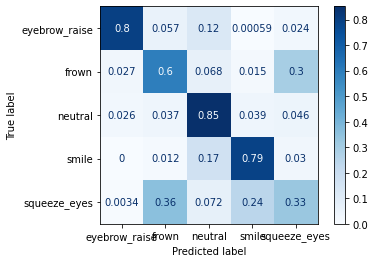

In [94]:
plot_confusion_matrix(estimator=clf_rf_norm, X=X_valid_norm, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [95]:
y_pred_rf_norm = clf_rf_norm.predict(X_test_norm)
score_rf_norm = clf_rf_norm.score(X_test_norm, y_test)
f1_rf_norm = f1_score(y_test, y_pred_rf_norm, average='macro')
print ('Accuracy: '+str(score_rf_norm*100)+' %')
print ('F1-Score: '+str(f1_rf_norm))

Accuracy: 76.0010240655402 %
F1-Score: 0.6677588083463919


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


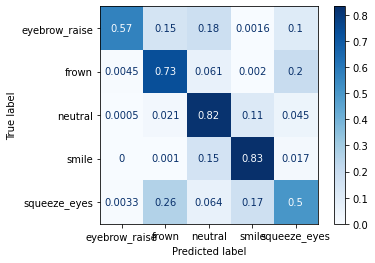

In [96]:
plot_confusion_matrix(estimator=clf_rf_norm, X=X_test_norm, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - Normalization

In [97]:
xgb_norm = XGBClassifier(n_estimators=100)

In [98]:
y_trainXGB = le.fit_transform(y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
xgb_norm.fit(X_train_norm, y_trainXGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [100]:
y_predXGB_norm = xgb_norm.predict(X_valid_norm)
predictions_norm = [round(value) for value in y_predXGB_norm]
score_xgb_norm = accuracy_score(y_validXGB, predictions_norm)
f1_xgb_norm = f1_score(y_validXGB, predictions_norm, average='macro')
print ('Accuracy: '+str(score_xgb_norm*100)+' %')
print ('F1-Score: '+str(f1_xgb_norm))

Accuracy: 70.01531393568146 %
F1-Score: 0.3896621299734825


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


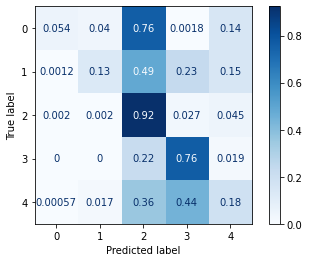

In [101]:
plot_confusion_matrix(estimator=xgb_norm, X=X_valid_norm, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [102]:
y_predXGB_norm = xgb_norm.predict(X_test_norm)
predictions_norm = [round(value) for value in y_predXGB_norm]
score_xgb_norm = accuracy_score(y_testXGB, predictions_norm)
f1_xgb_norm = f1_score(y_testXGB, predictions_norm, average='macro')
print ('Accuracy: '+str(score_xgb_norm*100)+' %')
print ('F1-Score: '+str(f1_xgb_norm))

Accuracy: 70.76804915514593 %
F1-Score: 0.503694298964669


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


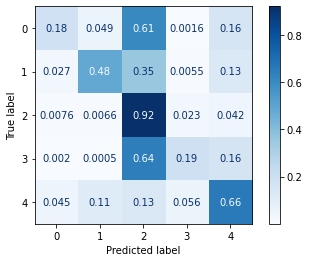

In [103]:
plot_confusion_matrix(estimator=xgb_norm, X=X_test_norm, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

## Undersampling
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [104]:
from imblearn.under_sampling import OneSidedSelection

In [105]:
y_train.value_counts()

event        
neutral          51773
smile             8342
frown             8016
eyebrow_raise     7587
squeeze_eyes      7192
dtype: int64

In [106]:
listClasses= list()
listClasses= ["neutral", "smile", "eyebrow_raise"]

In [107]:
undersample = OneSidedSelection(n_neighbors=5, n_seeds_S=200)
X_train_us = X_train
y_train_us = y_train
X_train_us, y_train_us = undersample.fit_resample(X_train_us, y_train_us)

In [108]:
y_train_us.value_counts()

event        
neutral          40537
squeeze_eyes      7192
frown             6346
smile             5110
eyebrow_raise     4632
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='event', ylabel='count'>

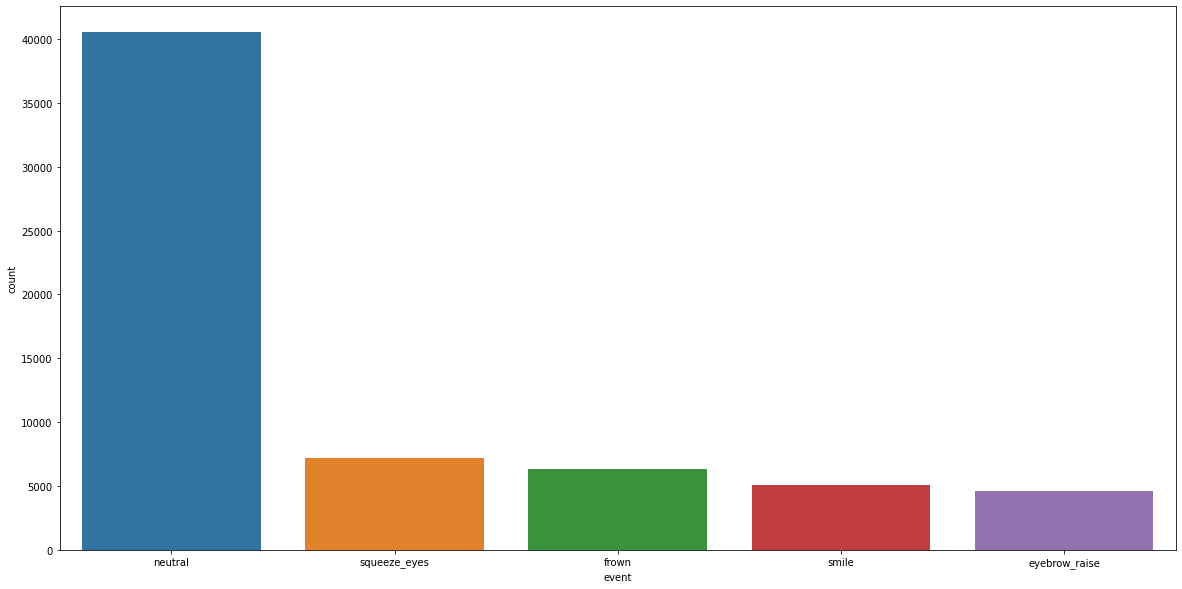

In [109]:
plt.figure(figsize = (20,10))
sns.countplot(y_train_us['event'], order = y_train_us['event'].value_counts().index)

### Dummy Classifier - Undersampling

In [110]:
dclf_us = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_us.fit(X_train_us, y_train_us)

DummyClassifier(random_state=0, strategy='most_frequent')

In [111]:
score_dummy_us = dclf_us.score(X_valid, y_valid)
y_pred_dummy_us = dclf_us.predict(X_valid)
f1_dummy_us=f1_score(y_valid, y_pred_dummy_us, average='macro')
print ('Accuracy: '+str(score_dummy_us*100)+' %')
print ('F1-Score: '+str(f1_dummy_us))

Accuracy: 65.02807554874937 %
F1-Score: 0.15761700021652386


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


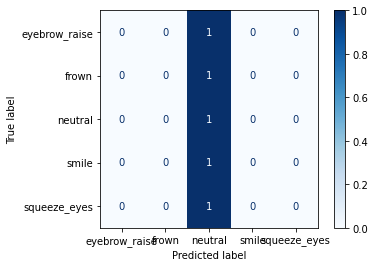

In [112]:
plot_confusion_matrix(estimator=dclf_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [113]:
score_dummy_us = dclf_us.score(X_test, y_test)
y_pred_dummy_us = dclf_us.predict(X_test)
f1_dummy_us=f1_score(y_test, y_pred_dummy_us, average='macro')
print ('Accuracy: '+str(score_dummy_us*100)+' %')
print ('F1-Score: '+str(f1_dummy_us))

Accuracy: 60.8858166922683 %
F1-Score: 0.15137646796728305


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


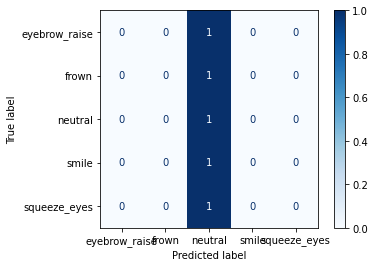

In [114]:
plot_confusion_matrix(estimator=dclf_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### Decision Tree - Undersampling

In [115]:
clf_tree_us = tree.DecisionTreeClassifier()
clf_tree_us.fit(X_train_us, y_train_us)

DecisionTreeClassifier()

In [116]:
score_tree_us = clf_tree_us.score(X_valid, y_valid)
y_pred_tree_us = clf_tree_us.predict(X_valid)
f1_tree_us=f1_score(y_valid, y_pred_tree_us, average='macro')
print ('Accuracy: '+str(score_tree_us*100)+' %')
print ('F1-Score: '+str(f1_tree_us))

Accuracy: 73.94078611536499 %
F1-Score: 0.6134789293386353


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


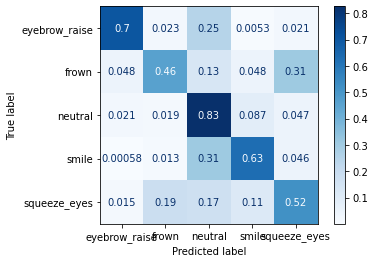

In [117]:
plot_confusion_matrix(estimator=clf_tree_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [118]:
score_tree_us = clf_tree_us.score(X_test, y_test)
y_pred_tree_us = clf_tree_us.predict(X_test)
f1_tree_us=f1_score(y_test, y_pred_tree_us, average='macro')
print ('Accuracy: '+str(score_tree_us*100)+' %')
print ('F1-Score: '+str(f1_tree_us))

Accuracy: 75.57091653865847 %
F1-Score: 0.6386283064986217


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


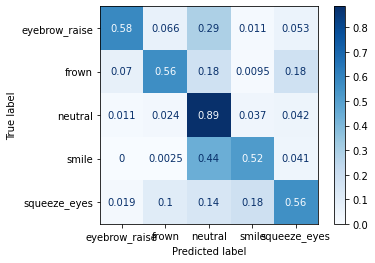

In [119]:
plot_confusion_matrix(estimator=clf_tree_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest - Undersampling


In [120]:
clf_rf_us = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_us.fit(X_train_us, y_train_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [121]:
y_pred_rf_us = clf_rf_us.predict(X_valid)
score_rf_us = clf_rf_us.score(X_valid, y_valid)
f1_rf_us = f1_score(y_valid, y_pred_rf_us, average='macro')
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 86.52884124553344 %
F1-Score: 0.7493292209575372


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


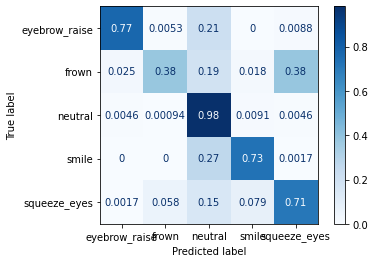

In [122]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [123]:
y_pred_rf_us = clf_rf_us.predict(X_test)
score_rf_us = clf_rf_us.score(X_test, y_test)
f1_rf_us = f1_score(y_test, y_pred_rf_us, average='macro')
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 84.20378904249873 %
F1-Score: 0.7561590403097674


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


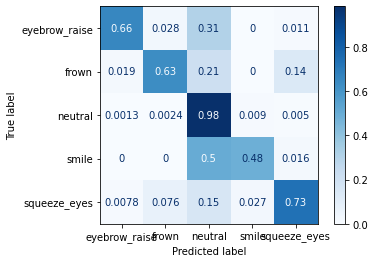

In [124]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

<br>

### XGBoost - Undersampling - BEST MODEL

In [125]:
xgb_us = XGBClassifier(n_estimators=100, booster='gblinear')
le = LabelEncoder()
y_trainXGB_us = le.fit_transform(y_train_us)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
xgb_us.fit(X_train_us, y_trainXGB_us)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, random_state=0, reg_alpha=0, ...)

In [127]:
y_predXGB_us = xgb_us.predict(X_valid)
predictions_us = [round(value) for value in y_predXGB_us]
score_xgb_us = accuracy_score(y_validXGB, predictions_us)
f1_xgb_us = f1_score(y_validXGB, predictions_us, average='macro')
print ('Accuracy: '+str(score_xgb_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_us))

Accuracy: 84.53292496171517 %
F1-Score: 0.7271791541572588


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


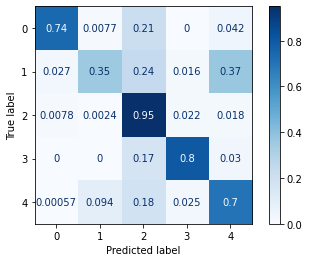

In [128]:
plot_confusion_matrix(estimator=xgb_us, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [129]:
y_testXGB= le.fit_transform(y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
y_predXGB_us = xgb_us.predict(X_test)
predictions_us = [round(value) for value in y_predXGB_us]
score_xgb_us = accuracy_score(y_testXGB, predictions_us)
f1_xgb_us = f1_score(y_testXGB, predictions_us, average='macro')
print ('Accuracy: '+str(score_xgb_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_us))

Accuracy: 83.03635432667691 %
F1-Score: 0.7399487749145132


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


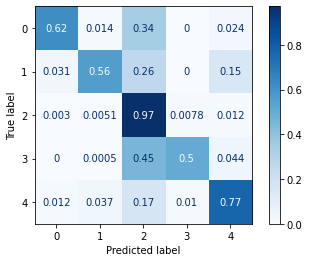

In [131]:
plot_confusion_matrix(estimator=xgb_us, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

## Undersampling - Standardization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [132]:
scale= StandardScaler()
X_train_us_std = scale.fit_transform(X_train_us) 
X_valid_us_std = scale.fit_transform(X_valid) 
X_test_us_std = scale.fit_transform(X_test) 

In [133]:
names= X_train_us.columns

In [134]:
X_train_us_std=pd.DataFrame(X_train_us_std, columns=names)
X_valid_us_std=pd.DataFrame(X_valid_us_std, columns=names)
X_test_us_std=pd.DataFrame(X_test_us_std, columns=names)


### XGBoost - Undersampling - Standardization

In [135]:
xgb_us_std = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_us = le.fit_transform(y_train_us)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
xgb_us_std.fit(X_train_us_std, y_trainXGB_us)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [137]:
y_predXGB_us_std = xgb_us_std.predict(X_valid_us_std)
predictions_us_std = [round(value) for value in y_predXGB_us_std]
score_xgb_us_std = accuracy_score(y_validXGB, predictions_us_std)
f1_xgb_us_std = f1_score(y_validXGB, predictions_us_std, average='macro')
print ('Accuracy: '+str(score_xgb_us_std*100)+' %')
print ('F1-Score: '+str(f1_xgb_us_std))

Accuracy: 83.57835630423686 %
F1-Score: 0.691932386478539


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


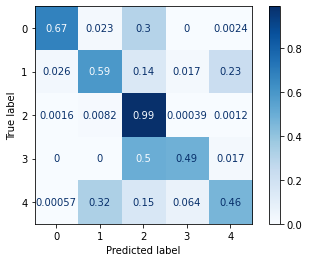

In [138]:
plot_confusion_matrix(estimator=xgb_us_std, X=X_valid_us_std, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

<br>

## Random undersampling
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [139]:
from imblearn.under_sampling import RandomUnderSampler

In [140]:
y_train.value_counts()

event        
neutral          51773
smile             8342
frown             8016
eyebrow_raise     7587
squeeze_eyes      7192
dtype: int64

In [141]:
dict_os = {
  "eyebrow_raise": 4834,
  "frown": 8016,
  "neutral": 9000 ,
  "smile": 5374 ,
  "squeeze_eyes": 7192 
}


In [142]:
undersample = RandomUnderSampler(sampling_strategy=dict_os, random_state=40)

In [143]:
X_train_rus, y_train_rus = undersample.fit_resample(X_train, y_train)

In [144]:
y_train_rus['event'].value_counts()

neutral          9000
frown            8016
squeeze_eyes     7192
smile            5374
eyebrow_raise    4834
Name: event, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='event', ylabel='count'>

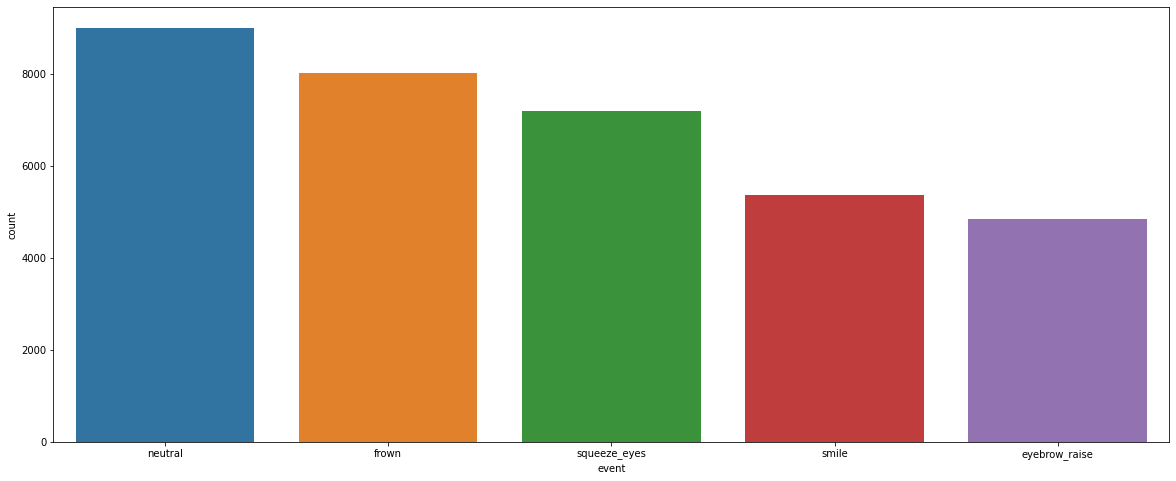

In [145]:
plt.figure(figsize = (20,8))
sns.countplot(y_train_rus['event'], order = y_train_rus['event'].value_counts().index)

### Dummy Classifier - Random Undersampling

In [146]:
dclf_rus = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_rus.fit(X_train_rus, y_train_rus)

DummyClassifier(random_state=0, strategy='most_frequent')

In [147]:
score_dummy_rus = dclf_rus.score(X_valid, y_valid)
y_pred_dummy_rus = dclf_rus.predict(X_valid)
f1_dummy_rus=f1_score(y_valid, y_pred_dummy_rus, average='macro')
print ('Accuracy: '+str(score_dummy_rus*100)+' %')
print ('F1-Score: '+str(f1_dummy_rus))

Accuracy: 65.02807554874937 %
F1-Score: 0.15761700021652386


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


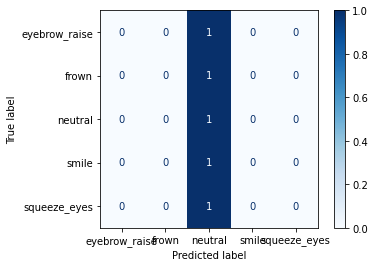

In [148]:
plot_confusion_matrix(estimator=dclf_rus, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

### Decision Tree - Random Undersampling

In [149]:
clf_tree_rus = tree.DecisionTreeClassifier()
clf_tree_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier()

In [150]:
score_tree_rus = clf_tree_rus.score(X_valid, y_valid)
y_pred_tree_rus = clf_tree_rus.predict(X_valid)
f1_tree_rus=f1_score(y_valid, y_pred_tree_rus, average='macro')
print ('Accuracy: '+str(score_tree_rus*100)+' %')
print ('F1-Score: '+str(f1_tree_rus))

Accuracy: 65.71209800918835 %
F1-Score: 0.5727534807695058


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


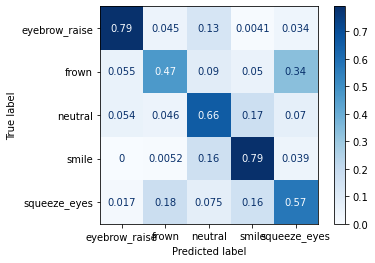

In [151]:
plot_confusion_matrix(estimator=clf_tree_rus, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [152]:
score_tree_rus = clf_tree_rus.score(X_test, y_test)
y_pred_tree_rus = clf_tree_rus.predict(X_test)
f1_tree_rus=f1_score(y_test, y_pred_tree_rus, average='macro')
print ('Accuracy: '+str(score_tree_rus*100)+' %')
print ('F1-Score: '+str(f1_tree_rus))

Accuracy: 72.7188940092166 %
F1-Score: 0.6354569028752113


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


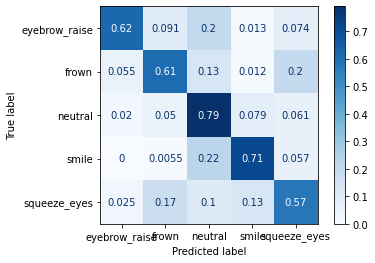

In [153]:
plot_confusion_matrix(estimator=clf_tree_rus, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest - Random Undersampling

In [154]:
clf_rf_rus = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_rus.fit(X_train_rus, y_train_rus)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [155]:
y_pred_rf_rus = clf_rf_rus.predict(X_valid)
score_rf_rus = clf_rf_rus.score(X_valid, y_valid)
f1_rf_rus = f1_score(y_valid, y_pred_rf_rus, average='macro')
print ('Accuracy: '+str(score_rf_rus*100)+' %')
print ('F1-Score: '+str(f1_rf_rus))

Accuracy: 82.32771822358346 %
F1-Score: 0.7273962824765736


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


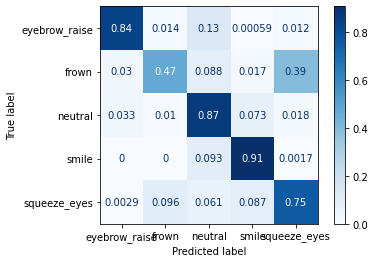

In [156]:
plot_confusion_matrix(estimator=clf_rf_rus, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [157]:
y_pred_rf_rus = clf_rf_rus.predict(X_test)
score_rf_rus = clf_rf_rus.score(X_test, y_test)
f1_rf_rus = f1_score(y_test, y_pred_rf_rus, average='macro')
print ('Accuracy: '+str(score_rf_rus*100)+' %')
print ('F1-Score: '+str(f1_rf_rus))

Accuracy: 85.49923195084486 %
F1-Score: 0.7959017876493065


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


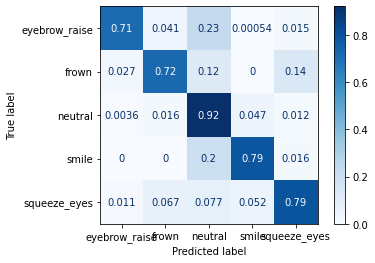

In [158]:
plot_confusion_matrix(estimator=clf_rf_rus, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - Random Undersampling

In [159]:
xgb_rus = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_rus = le.fit_transform(y_train_rus)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [160]:
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

In [161]:
xgb_rus.fit(X_train_rus, y_trainXGB_rus)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [162]:
y_predXGB_rus = xgb_rus.predict(X_valid)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_validXGB, predictions_rus)
f1_xgb_rus = f1_score(y_validXGB, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 82.90964777947933 %
F1-Score: 0.7481688614430626


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


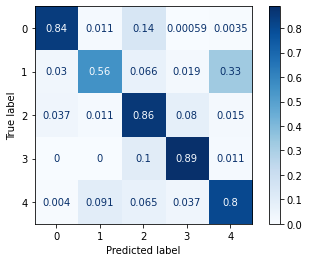

In [163]:
plot_confusion_matrix(estimator=xgb_rus, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [164]:
y_predXGB_rus = xgb_rus.predict(X_test)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_testXGB, predictions_rus)
f1_xgb_rus = f1_score(y_testXGB, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 84.85919098822325 %
F1-Score: 0.7933930313461124


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


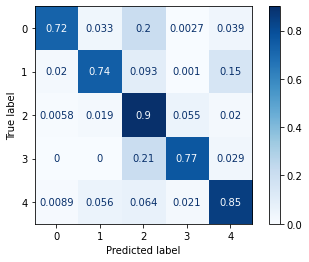

In [165]:
plot_confusion_matrix(estimator=xgb_rus, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

<br>

## Expressions vs Neutral
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [166]:
y_train_expressions=y_train
y_valid_expressions=y_valid
y_test_expressions=y_test

In [167]:
y_train_expressions['event'] = y_train_expressions['event'].replace(['smile','frown','squeeze_eyes','eyebrow_raise'], 'expression')
y_valid_expressions['event'] = y_valid_expressions['event'].replace(['smile','frown','squeeze_eyes','eyebrow_raise'], 'expression')
y_test_expressions['event'] = y_test_expressions['event'].replace(['smile','frown','squeeze_eyes','eyebrow_raise'], 'expression')

In [168]:
y_train_expressions.value_counts()

event     
neutral       51773
expression    31137
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='event', ylabel='count'>

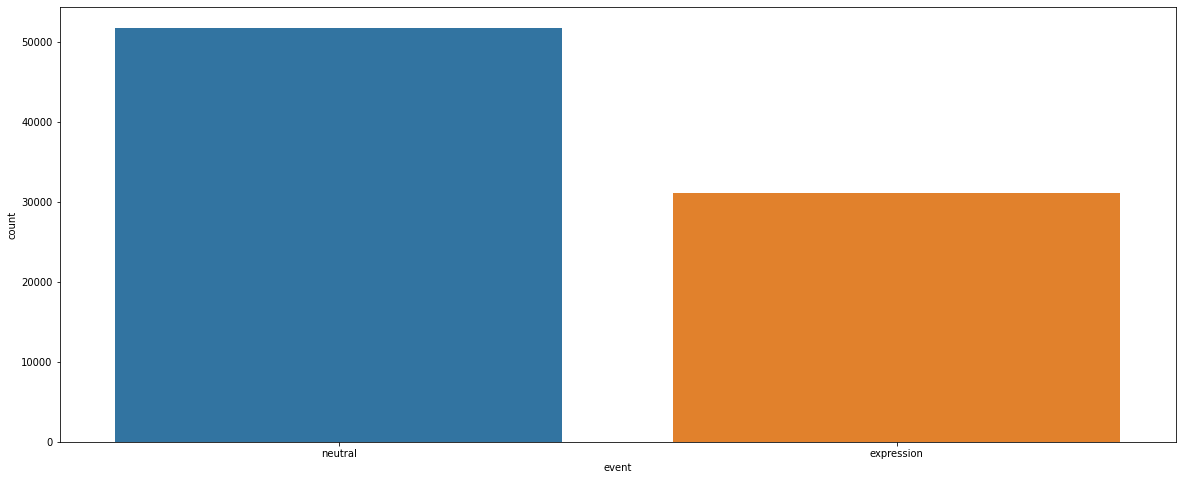

In [169]:
plt.figure(figsize = (20,8))
sns.countplot(y_train_expressions['event'], order = y_train_expressions['event'].value_counts().index)

### Dummy Classifier - Expressions vs Neutral

In [170]:
dclf_expressions = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_expressions.fit(X_train, y_train_expressions)

DummyClassifier(random_state=0, strategy='most_frequent')

In [171]:
score_dummy_expressions = dclf_expressions.score(X_valid, y_valid_expressions)
y_pred_dummy_expressions = dclf_expressions.predict(X_valid)
f1_dummy_expressions=f1_score(y_valid_expressions, y_pred_dummy_expressions, average='macro')
print ('Accuracy: '+str(score_dummy_expressions*100)+' %')
print ('F1-Score: '+str(f1_dummy_expressions))

Accuracy: 65.02807554874937 %
F1-Score: 0.3940425005413097


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


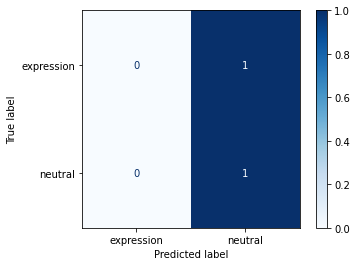

In [172]:
plot_confusion_matrix(estimator=dclf_expressions, X=X_valid, y_true=y_valid_expressions,
                      normalize='true', cmap='Blues')

In [173]:
score_dummy_expressions = dclf_expressions.score(X_test, y_test_expressions)
y_pred_dummy_expressions = dclf_expressions.predict(X_test)
f1_dummy_expressions=f1_score(y_test_expressions, y_pred_dummy_expressions, average='macro')
print ('Accuracy: '+str(score_dummy_expressions*100)+' %')
print ('F1-Score: '+str(f1_dummy_expressions))

Accuracy: 60.8858166922683 %
F1-Score: 0.3784411699182076


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


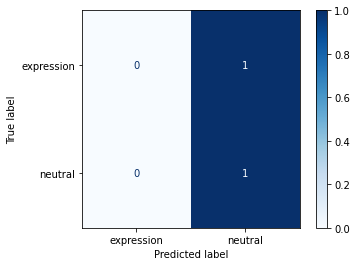

In [174]:
plot_confusion_matrix(estimator=dclf_expressions, X=X_test, y_true=y_test_expressions,
                      normalize='true', cmap='Blues')

### Decision Tree - Expressions vs Neutral

In [175]:
clf_tree_expressions = tree.DecisionTreeClassifier()
clf_tree_expressions.fit(X_train, y_train_expressions)

DecisionTreeClassifier()

In [176]:
score_tree_expressions = clf_tree_expressions.score(X_valid, y_valid_expressions)
y_pred_tree_expressions = clf_tree_expressions.predict(X_valid)
f1_tree_expressions=f1_score(y_valid_expressions, y_pred_tree_expressions, average='macro')
print ('Accuracy: '+str(score_tree_expressions*100)+' %')
print ('F1-Score: '+str(f1_tree_expressions))

Accuracy: 81.58754466564574 %
F1-Score: 0.802607025598624


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


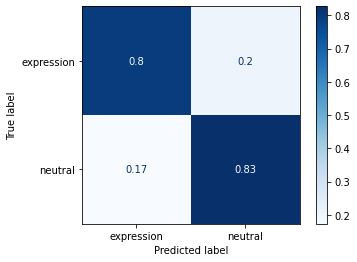

In [177]:
plot_confusion_matrix(estimator=clf_tree_expressions, X=X_valid, y_true=y_valid_expressions,
                      normalize='true', cmap='Blues')

In [178]:
score_tree_expressions = clf_tree_expressions.score(X_test, y_test_expressions)
y_pred_tree_expressions = clf_tree_expressions.predict(X_test)
f1_tree_expressions=f1_score(y_test_expressions, y_pred_tree_expressions, average='macro')
print ('Accuracy: '+str(score_tree_expressions*100)+' %')
print ('F1-Score: '+str(f1_tree_expressions))

Accuracy: 83.45622119815668 %
F1-Score: 0.823081892652815


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


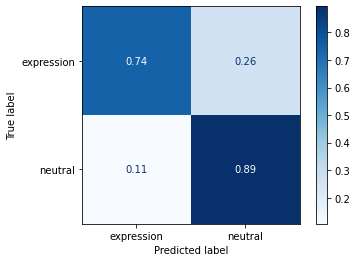

In [179]:
plot_confusion_matrix(estimator=clf_tree_expressions, X=X_test, y_true=y_test_expressions,
                      normalize='true', cmap='Blues')

### Random Forest - Expressions vs Neutral

In [180]:
clf_rf_expressions = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_expressions.fit(X_train, y_train_expressions)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [181]:
y_pred_rf_expressions = clf_rf_expressions.predict(X_valid)
score_rf_expressions = clf_rf_expressions.score(X_valid, y_valid_expressions)
f1_rf_expressions = f1_score(y_valid_expressions, y_pred_rf_expressions, average='macro')
print ('Accuracy: '+str(score_rf_expressions*100)+' %')
print ('F1-Score: '+str(f1_rf_expressions))

Accuracy: 91.3782542113323 %
F1-Score: 0.9042368124869081


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


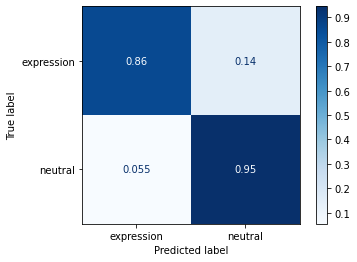

In [182]:
plot_confusion_matrix(estimator=clf_rf_expressions, X=X_valid, y_true=y_valid_expressions,
                      normalize='true', cmap='Blues')

In [183]:
y_pred_rf_expressions = clf_rf_expressions.predict(X_test)
score_rf_expressions = clf_rf_expressions.score(X_test, y_test_expressions)
f1_rf_expressions = f1_score(y_test_expressions, y_pred_rf_expressions, average='macro')
print ('Accuracy: '+str(score_rf_expressions*100)+' %')
print ('F1-Score: '+str(f1_rf_expressions))

Accuracy: 88.85304659498208 %
F1-Score: 0.8784939368626503


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


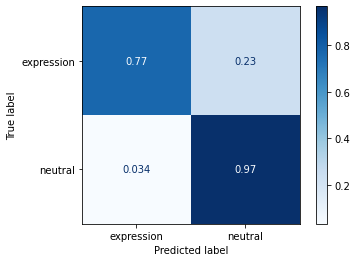

In [184]:
plot_confusion_matrix(estimator=clf_rf_expressions, X=X_test, y_true=y_test_expressions,
                      normalize='true', cmap='Blues')

### XGBoost - Expressions vs Neutral

In [185]:
xgb_expressions = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_expressions = le.fit_transform(y_train_expressions)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
y_validXGB_expressions = le.fit_transform(y_valid_expressions)
y_testXGB_expressions = le.fit_transform(y_test_expressions)

In [187]:
xgb_expressions.fit(X_train, y_trainXGB_expressions)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [188]:
y_predXGB_expressions = xgb_expressions.predict(X_valid)
predictions_expressions = [round(value) for value in y_predXGB_expressions]
score_xgb_expressions = accuracy_score(y_validXGB_expressions, predictions_expressions)
f1_xgb_expressions = f1_score(y_validXGB_expressions, predictions_expressions, average='macro')
print ('Accuracy: '+str(score_xgb_expressions*100)+' %')
print ('F1-Score: '+str(f1_xgb_expressions))

Accuracy: 90.55130168453293 %
F1-Score: 0.8959923765908411


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


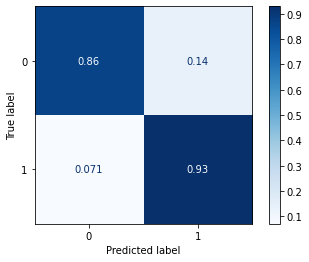

In [189]:
plot_confusion_matrix(estimator=xgb_expressions, X=X_valid, y_true=y_validXGB_expressions,
                      normalize='true', cmap='Blues')

In [190]:
y_predXGB_expressions = xgb_expressions.predict(X_test)
predictions_expressions = [round(value) for value in y_predXGB_expressions]
score_xgb_expressions = accuracy_score(y_testXGB_expressions, predictions_expressions)
f1_xgb_expressions = f1_score(y_testXGB_expressions, predictions_expressions, average='macro')
print ('Accuracy: '+str(score_xgb_expressions*100)+' %')
print ('F1-Score: '+str(f1_xgb_expressions))

Accuracy: 88.42293906810036 %
F1-Score: 0.8755087713137408


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


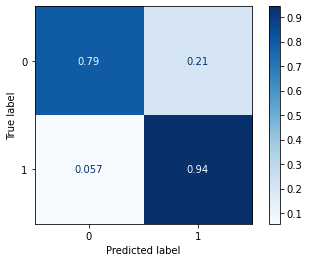

In [191]:
plot_confusion_matrix(estimator=xgb_expressions, X=X_test, y_true=y_testXGB_expressions,
                      normalize='true', cmap='Blues')

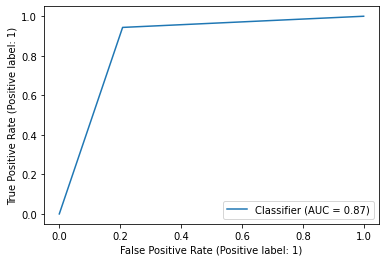

In [192]:
RocCurveDisplay.from_predictions(y_testXGB_expressions, predictions_expressions)
plt.show()

## Expressions only (EO) - without neutral 
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [193]:
trainData_eo=trainData
validData_eo=validData
testData_eo=testData

In [194]:
trainData_eo.drop(trainData_eo.loc[trainData_eo['event']=='neutral'].index, inplace=True)
validData_eo.drop(validData_eo.loc[validData_eo['event']=='neutral'].index, inplace=True)
testData_eo.drop(testData_eo.loc[testData_eo['event']=='neutral'].index, inplace=True)

In [195]:
X_train_eo = trainData_eo.drop(['event'], axis=1)
y_train_eo = pd.DataFrame(trainData_eo.iloc[:,-1])

X_valid_eo = validData_eo.drop(['event'], axis=1)
y_valid_eo = pd.DataFrame(validData_eo.iloc[:,-1])

X_test_eo = testData_eo.drop(['event'], axis=1)
y_test_eo = pd.DataFrame(testData_eo.iloc[:,-1])


In [196]:
X_train_eo

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
96,0.000551,0.000001,-0.136452,-0.121716,-0.263292,0.302878,0.136452,0.130020,0.297525,-0.438049,...,3.467566e-07,933.759502,860.16,870.40,1.303908e-15,3.272808e-13,235497.070033,235497.070033,1.126985,1.660107e-07
97,0.000590,0.000001,-0.157705,-0.095752,-0.304365,0.285026,0.157705,0.103302,0.335806,-0.428596,...,2.308059e-06,937.716222,860.16,665.60,1.482811e-15,3.721855e-13,229141.873324,229141.873324,1.122761,1.978949e-07
98,0.000629,0.000001,-0.179179,-0.116615,-0.302900,0.291728,0.179179,0.127062,0.341388,-0.441116,...,-2.982160e-06,935.251070,860.16,931.84,1.689931e-15,4.241727e-13,224935.214310,224935.214310,1.121231,2.706221e-07
99,0.000639,0.000001,-0.190464,-0.128460,-0.334881,0.290310,0.190464,0.140693,0.381997,-0.456656,...,-1.911377e-06,939.817627,849.92,880.64,1.622623e-15,4.072785e-13,219159.397537,219159.397537,1.117196,3.239262e-07
100,0.000584,0.000001,-0.254480,-0.152403,-0.340642,0.219968,0.254480,0.171795,0.399162,-0.351672,...,7.511728e-07,945.359747,849.92,880.64,1.306551e-15,3.279443e-13,211405.204893,211405.204893,1.112002,2.856139e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82882,0.001619,0.000003,-0.315074,0.193497,-0.704946,0.863585,0.315074,-0.223979,0.547052,-1.572224,...,-7.289110e-06,809.921384,706.56,675.84,5.016785e-15,1.259213e-12,157080.559297,157080.559297,1.113311,5.871174e-07
82883,0.001358,0.000003,-0.301592,0.140119,-0.652993,0.823167,0.301592,-0.161248,0.547699,-1.499439,...,-6.948225e-06,811.920617,727.04,675.84,4.809414e-15,1.207163e-12,152811.498590,152811.498590,1.109869,5.546881e-07
82884,0.001103,0.000002,-0.256290,0.075599,-0.589991,0.758159,0.256290,-0.085287,0.539673,-1.371896,...,-1.949086e-06,840.186945,757.76,829.44,3.498159e-15,8.780380e-13,172170.248231,172170.248231,1.115301,4.459210e-07
82885,0.000821,0.000002,-0.187685,0.034027,-0.552970,0.689249,0.187685,-0.037220,0.532388,-1.239671,...,-2.924147e-06,835.026603,747.52,583.68,2.893725e-15,7.263249e-13,193994.595987,193994.595987,1.130584,3.714205e-07


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='event', ylabel='count'>

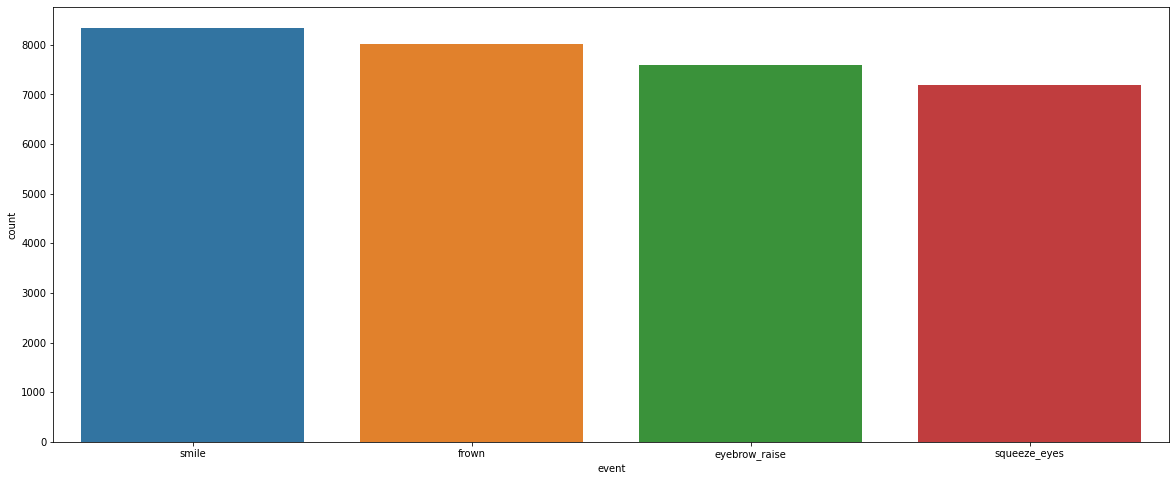

In [197]:
plt.figure(figsize = (20,8))
sns.countplot(y_train_eo['event'], order = y_train_eo['event'].value_counts().index)

### Dummy Classifier - Expressions Only

In [198]:
dclf_eo = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_eo.fit(X_train_eo, y_train_eo)

DummyClassifier(random_state=0, strategy='most_frequent')

In [199]:
score_dummy_eo = dclf_eo.score(X_valid_eo, y_valid_eo)
y_pred_dummy_eo = dclf_eo.predict(X_valid_eo)
f1_dummy_eo=f1_score(y_valid_eo, y_pred_dummy_eo, average='macro')
print ('Accuracy: '+str(score_dummy_eo*100)+' %')
print ('F1-Score: '+str(f1_dummy_eo))

Accuracy: 25.13501678587068 %
F1-Score: 0.10043158754228391


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


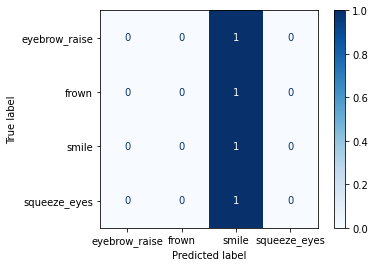

In [200]:
plot_confusion_matrix(estimator=dclf_eo, X=X_valid_eo, y_true=y_valid_eo,
                      normalize='true', cmap='Blues')

In [201]:
score_dummy_eo = dclf_eo.score(X_test_eo, y_test_eo)
y_pred_dummy_eo = dclf_eo.predict(X_test_eo)
f1_dummy_eo=f1_score(y_test_eo, y_pred_dummy_eo, average='macro')
print ('Accuracy: '+str(score_dummy_eo*100)+' %')
print ('F1-Score: '+str(f1_dummy_eo))

Accuracy: 26.155255923550204 %
F1-Score: 0.10366296565321159


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


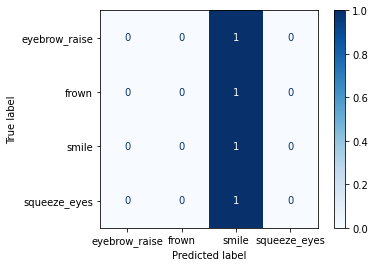

In [202]:
plot_confusion_matrix(estimator=dclf_eo, X=X_test_eo, y_true=y_test_eo,
                      normalize='true', cmap='Blues')

### Decision Tree - Expressions Only

In [203]:
clf_tree_eo = tree.DecisionTreeClassifier()
clf_tree_eo.fit(X_train_eo, y_train_eo)

DecisionTreeClassifier()

In [204]:
score_tree_eo = clf_tree_eo.score(X_valid_eo, y_valid_eo)
y_pred_tree_eo = clf_tree_eo.predict(X_valid_eo)
f1_tree_eo=f1_score(y_valid_eo, y_pred_tree_eo, average='macro')
print ('Accuracy: '+str(score_tree_eo*100)+' %')
print ('F1-Score: '+str(f1_tree_eo))

Accuracy: 69.24536564005254 %
F1-Score: 0.6869100877987171


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


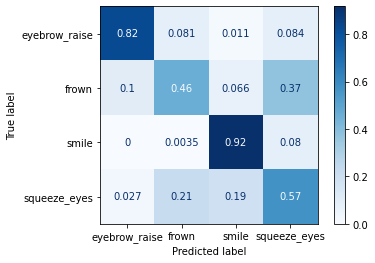

In [205]:
plot_confusion_matrix(estimator=clf_tree_eo, X=X_valid_eo, y_true=y_valid_eo,
                      normalize='true', cmap='Blues')

In [206]:
score_tree_eo = clf_tree_eo.score(X_test_eo, y_test_eo)
y_pred_tree_eo = clf_tree_eo.predict(X_test_eo)
f1_tree_eo=f1_score(y_test_eo, y_pred_tree_eo, average='macro')
print ('Accuracy: '+str(score_tree_eo*100)+' %')
print ('F1-Score: '+str(f1_tree_eo))

Accuracy: 72.2214949600733 %
F1-Score: 0.7184260653152992


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


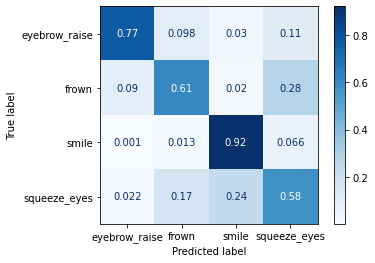

In [207]:
plot_confusion_matrix(estimator=clf_tree_eo, X=X_test_eo, y_true=y_test_eo,
                      normalize='true', cmap='Blues')

### Random Forest - Expressions Only

In [208]:
clf_rf_eo = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_eo.fit(X_train_eo, y_train_eo)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [209]:
y_pred_rf_eo = clf_rf_eo.predict(X_valid_eo)
score_rf_eo = clf_rf_eo.score(X_valid_eo, y_valid_eo)
f1_rf_eo = f1_score(y_valid_eo, y_pred_rf_eo, average='macro')
print ('Accuracy: '+str(score_rf_eo*100)+' %')
print ('F1-Score: '+str(f1_rf_eo))

Accuracy: 80.54298642533936 %
F1-Score: 0.7979761196896916


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


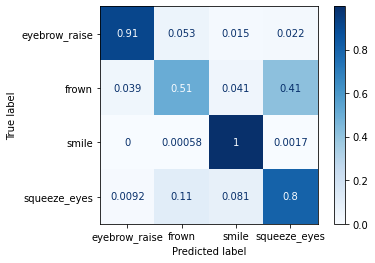

In [210]:
plot_confusion_matrix(estimator=clf_rf_eo, X=X_valid_eo, y_true=y_valid_eo,
                      normalize='true', cmap='Blues')

In [211]:
y_pred_rf_eo = clf_rf_eo.predict(X_test_eo)
score_rf_eo = clf_rf_eo.score(X_test_eo, y_test_eo)
f1_rf_eo = f1_score(y_test_eo, y_pred_rf_eo, average='macro')
print ('Accuracy: '+str(score_rf_eo*100)+' %')
print ('F1-Score: '+str(f1_rf_eo))

Accuracy: 84.94567351747611 %
F1-Score: 0.8477130133846186


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


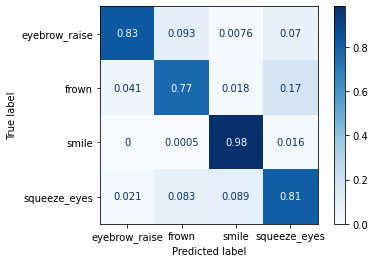

In [212]:
plot_confusion_matrix(estimator=clf_rf_eo, X=X_test_eo, y_true=y_test_eo,
                      normalize='true', cmap='Blues')

### XGBoost - Expressions Only

In [213]:
xgb_eo = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_eo = le.fit_transform(y_train_eo)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [214]:
y_validXGB_eo = le.fit_transform(y_valid_eo)
y_testXGB_eo = le.fit_transform(y_test_eo)

In [215]:
xgb_eo.fit(X_train_eo, y_trainXGB_eo)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [216]:
y_predXGB_eo = xgb_eo.predict(X_valid_eo)
predictions_eo = [round(value) for value in y_predXGB_eo]
score_xgb_eo = accuracy_score(y_validXGB_eo, predictions_eo)
f1_xgb_eo = f1_score(y_validXGB_eo, predictions_eo, average='macro')
print ('Accuracy: '+str(score_xgb_eo*100)+' %')
print ('F1-Score: '+str(f1_xgb_eo))

Accuracy: 82.0902058093709 %
F1-Score: 0.8169678332586049


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


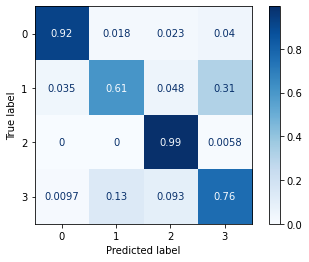

In [217]:
plot_confusion_matrix(estimator=xgb_eo, X=X_valid_eo, y_true=y_validXGB_eo,
                      normalize='true', cmap='Blues')

In [218]:
y_predXGB_eo = xgb_eo.predict(X_test_eo)
predictions_eo = [round(value) for value in y_predXGB_eo]
score_xgb_eo = accuracy_score(y_testXGB_eo, predictions_eo)
f1_xgb_eo = f1_score(y_testXGB_eo, predictions_eo, average='macro')
print ('Accuracy: '+str(score_xgb_eo*100)+' %')
print ('F1-Score: '+str(f1_xgb_eo))

Accuracy: 86.12383819871711 %
F1-Score: 0.8603460175192661


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


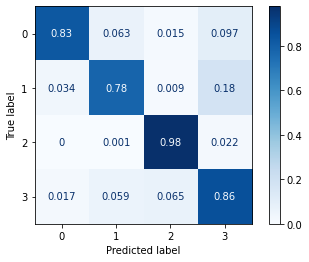

In [219]:
plot_confusion_matrix(estimator=xgb_eo, X=X_test_eo, y_true=y_testXGB_eo,
                      normalize='true', cmap='Blues')

# Task B
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [220]:
DF_listB = list()

In [221]:
for i in range (0, 30):
    DF_listB.insert(i, pd.read_csv('../input/participantstaskb/Participant'+str(i+1)+'.csv') )

    


In [222]:
DF_trainB = list()
DF_validationB = list()
DF_testB = list()

In [223]:
DF_trainB.clear()
DF_validationB.clear()
DF_testB.clear()

In [224]:
k=0

In [225]:
k=0
for i in training_subjects:
    DF_trainB.insert(k, DF_listB[i-1])
    k=k+1

In [226]:
k=0
for i in validation_subjects:
    DF_validationB.insert(k, DF_listB[i-1])
    k=k+1

In [227]:
k=0
for i in test_subjects:
    DF_testB.insert(k, DF_listB[i-1])
    k=k+1

In [228]:
trainDataB = pd.concat(DF_trainB, ignore_index=True)
validDataB = pd.concat(DF_validationB, ignore_index=True)
testDataB = pd.concat (DF_testB, ignore_index=True)

X_trainB = trainDataB.drop(['event'], axis=1)
y_trainB = pd.DataFrame(trainDataB.iloc[:,-1])

X_validB = validDataB.drop(['event'], axis=1)
y_validB = pd.DataFrame(validDataB.iloc[:,-1])

X_testB = testDataB.drop(['event'], axis=1)
y_testB = pd.DataFrame(testDataB.iloc[:,-1])

In [229]:
X_trainB

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,0.000159,2.927381e-09,-0.947965,3.763602,-5.679850,3.864213,0.947965,-5.547483,-25.829022,145.849054,...,6.352747e-22,1485.609099,1648.64,2560.00,3.674221e-47,9.222296e-45,721686.592894,721686.592894,1.151952,1.937104e-07
1,0.000159,1.824073e-09,-0.951616,3.773886,-5.689452,3.867181,0.951616,-5.569531,-25.998127,146.942026,...,-2.117582e-22,1468.073774,1638.40,2560.00,3.635839e-47,9.125956e-45,723865.415182,723865.415182,1.155795,1.937104e-07
2,0.000204,2.108749e-07,0.029527,0.211390,-0.059150,0.328876,-0.029527,-0.208269,0.046831,-0.351979,...,2.106031e-06,607.785457,512.00,10.24,1.745888e-16,4.382180e-14,442666.936278,442666.936278,1.482677,1.937103e-07
3,0.000239,4.060641e-07,-0.085619,0.137134,-0.105188,0.190024,0.085619,-0.143005,0.090145,-0.215719,...,3.019969e-06,664.085192,552.96,10.24,2.727025e-16,6.844833e-14,468001.083926,468001.083926,1.435690,1.933634e-07
4,0.000291,6.272071e-07,-0.116291,0.084704,-0.320854,0.153874,0.116291,-0.089630,0.292096,-0.221293,...,2.900759e-06,772.023142,686.08,10.24,3.643256e-16,9.144573e-14,458336.320713,458336.320713,1.330036,1.895798e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109715,0.000424,1.105843e-06,-0.283678,-0.054703,-0.299064,0.138266,0.283678,0.062462,0.317744,-0.204165,...,-6.666312e-07,1036.306247,880.64,675.84,4.860116e-16,1.219889e-13,284017.625453,284017.625453,1.124485,1.434949e-07
109716,0.000412,1.083210e-06,-0.293886,-0.048547,-0.302243,0.134123,0.293886,0.055680,0.319071,-0.198315,...,1.785876e-06,1073.263892,911.36,675.84,5.105369e-16,1.281448e-13,280199.666530,280199.666530,1.115012,1.662116e-07
109717,0.000394,1.047392e-06,-0.258428,-0.013907,-0.297156,0.139468,0.258428,0.015704,0.301822,-0.202609,...,-3.343087e-06,1100.163913,972.80,593.92,4.951706e-16,1.242878e-13,285103.467065,285103.467065,1.111554,1.667598e-07
109718,0.000383,1.024084e-06,-0.257115,-0.019811,-0.327909,0.142467,0.257115,0.022358,0.335240,-0.214108,...,-9.429547e-07,1107.758800,993.28,686.08,4.651290e-16,1.167474e-13,290983.707250,290983.707250,1.112261,1.526755e-07


<br>

## Exploratory Data Analysis - Task B 
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

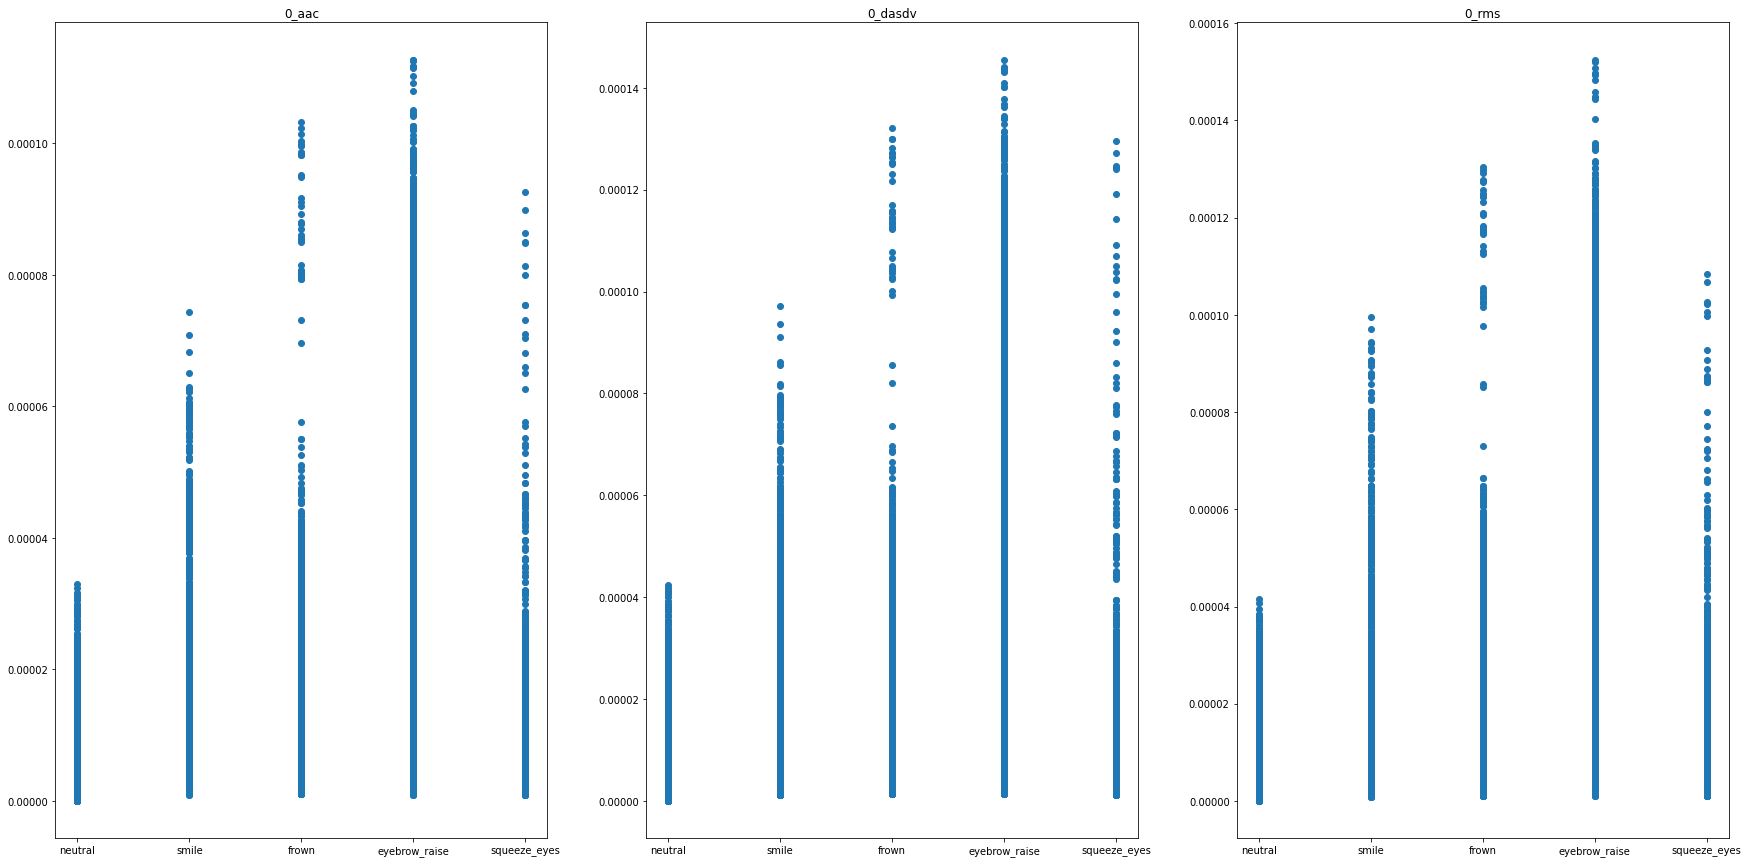

In [230]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('0_aac')
ax2.set_title('0_dasdv')
ax3.set_title('0_rms')




ax1.scatter(y_trainB['event'], X_trainB['0_aac'])
ax2.scatter(y_trainB['event'], X_trainB['0_dasdv'])
ax3.scatter(y_trainB['event'], X_trainB['0_rms'])

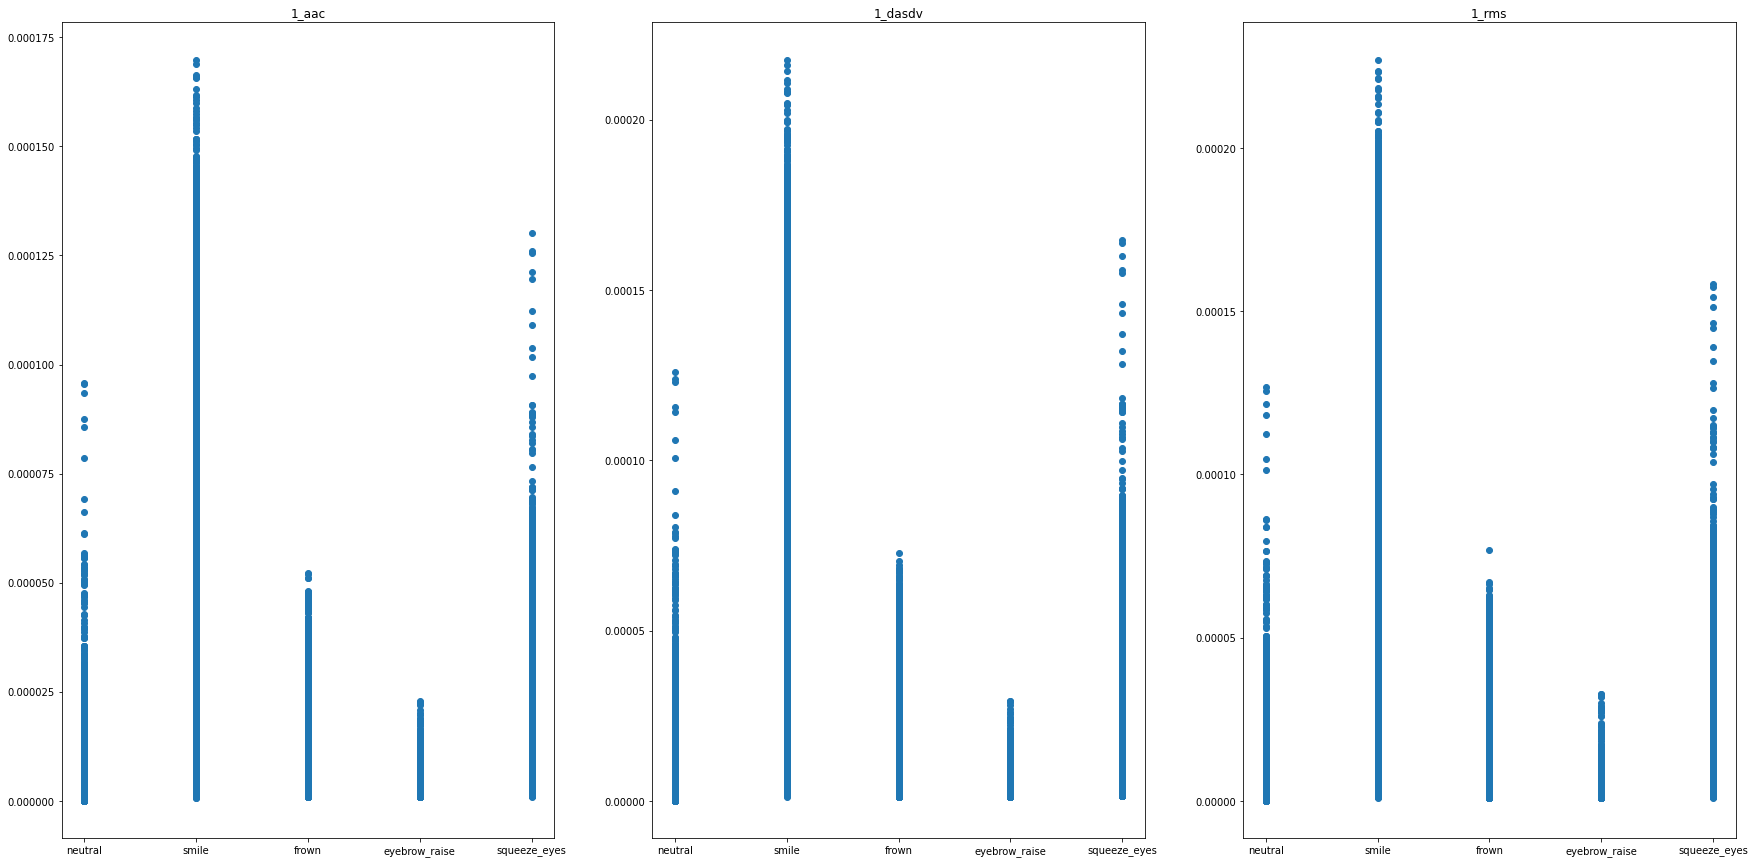

In [231]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('1_aac')
ax2.set_title('1_dasdv')
ax3.set_title('1_rms')




ax1.scatter(y_trainB['event'], X_trainB['1_aac'])
ax2.scatter(y_trainB['event'], X_trainB['1_dasdv'])
ax3.scatter(y_trainB['event'], X_trainB['1_rms'])


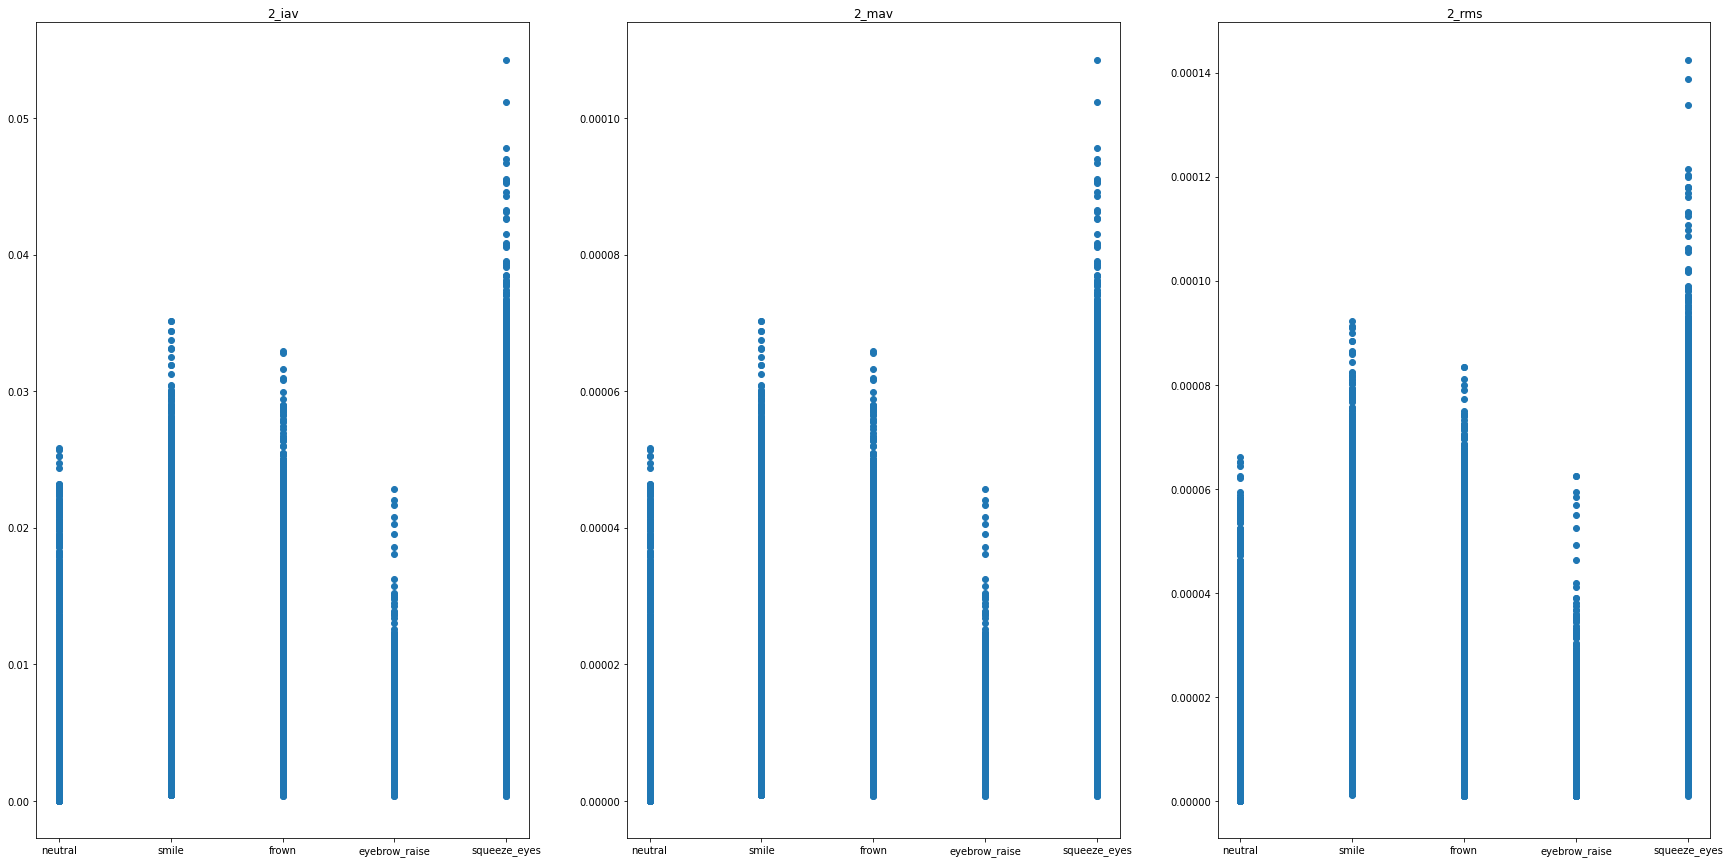

In [232]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('2_iav')
ax2.set_title('2_mav')
ax3.set_title('2_rms')




ax1.scatter(y_trainB['event'], X_trainB['2_iav'])
ax2.scatter(y_trainB['event'], X_trainB['2_mav'])
ax3.scatter(y_trainB['event'], X_trainB['2_rms'])

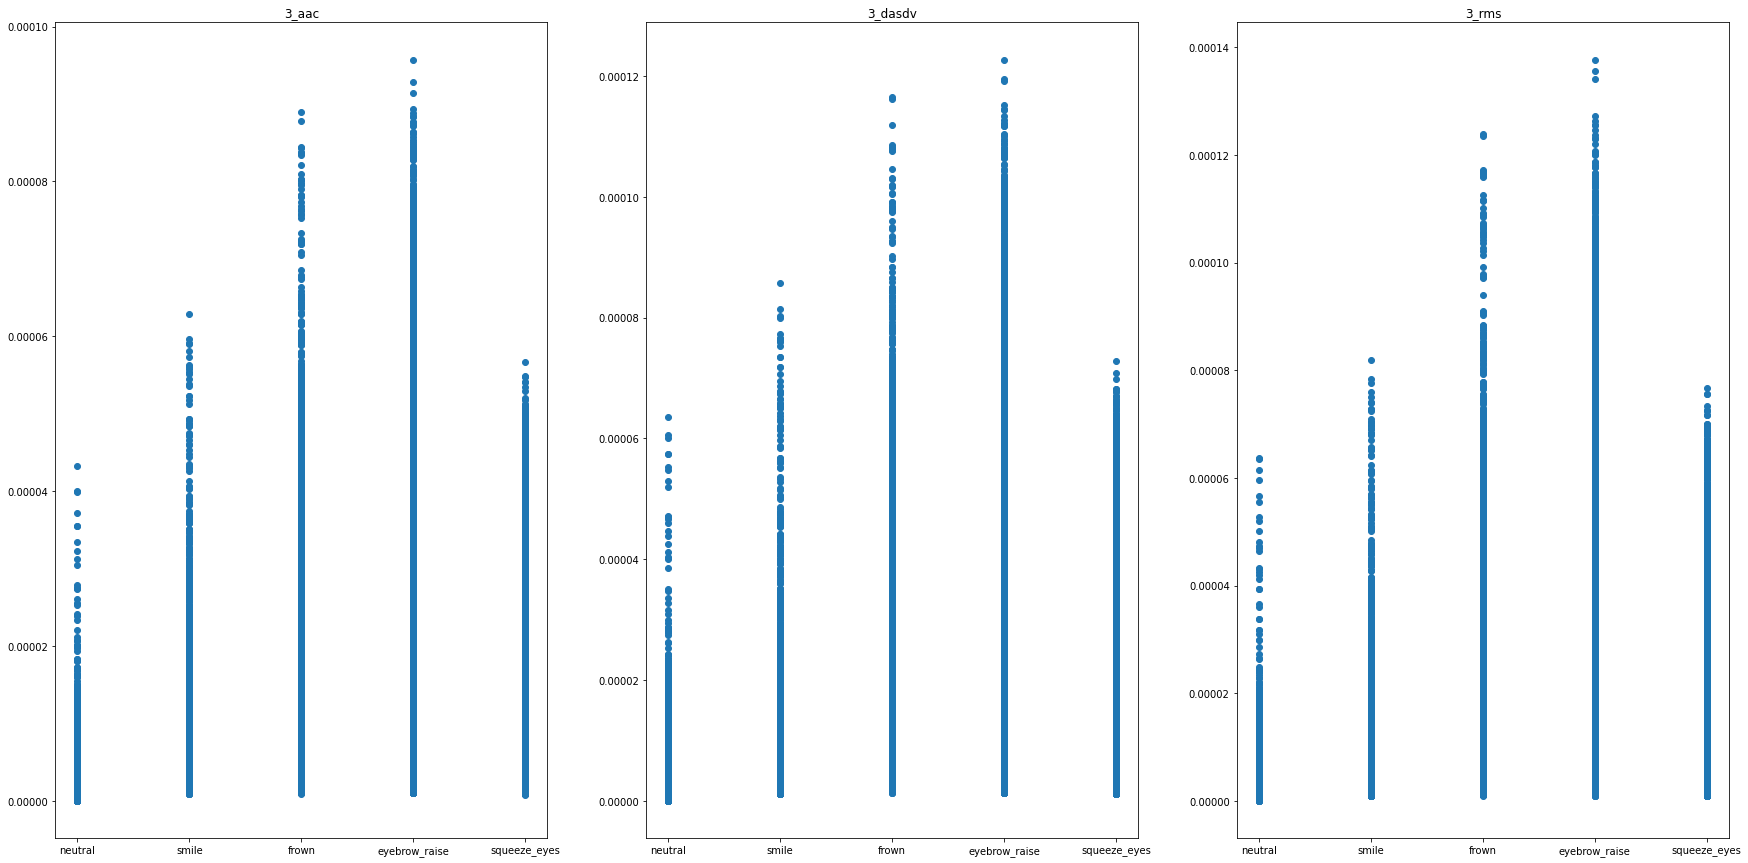

In [233]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('3_aac')
ax2.set_title('3_dasdv')
ax3.set_title('3_rms')




ax1.scatter(y_trainB['event'], X_trainB['3_aac'])
ax2.scatter(y_trainB['event'], X_trainB['3_dasdv'])
ax3.scatter(y_trainB['event'], X_trainB['3_rms'])

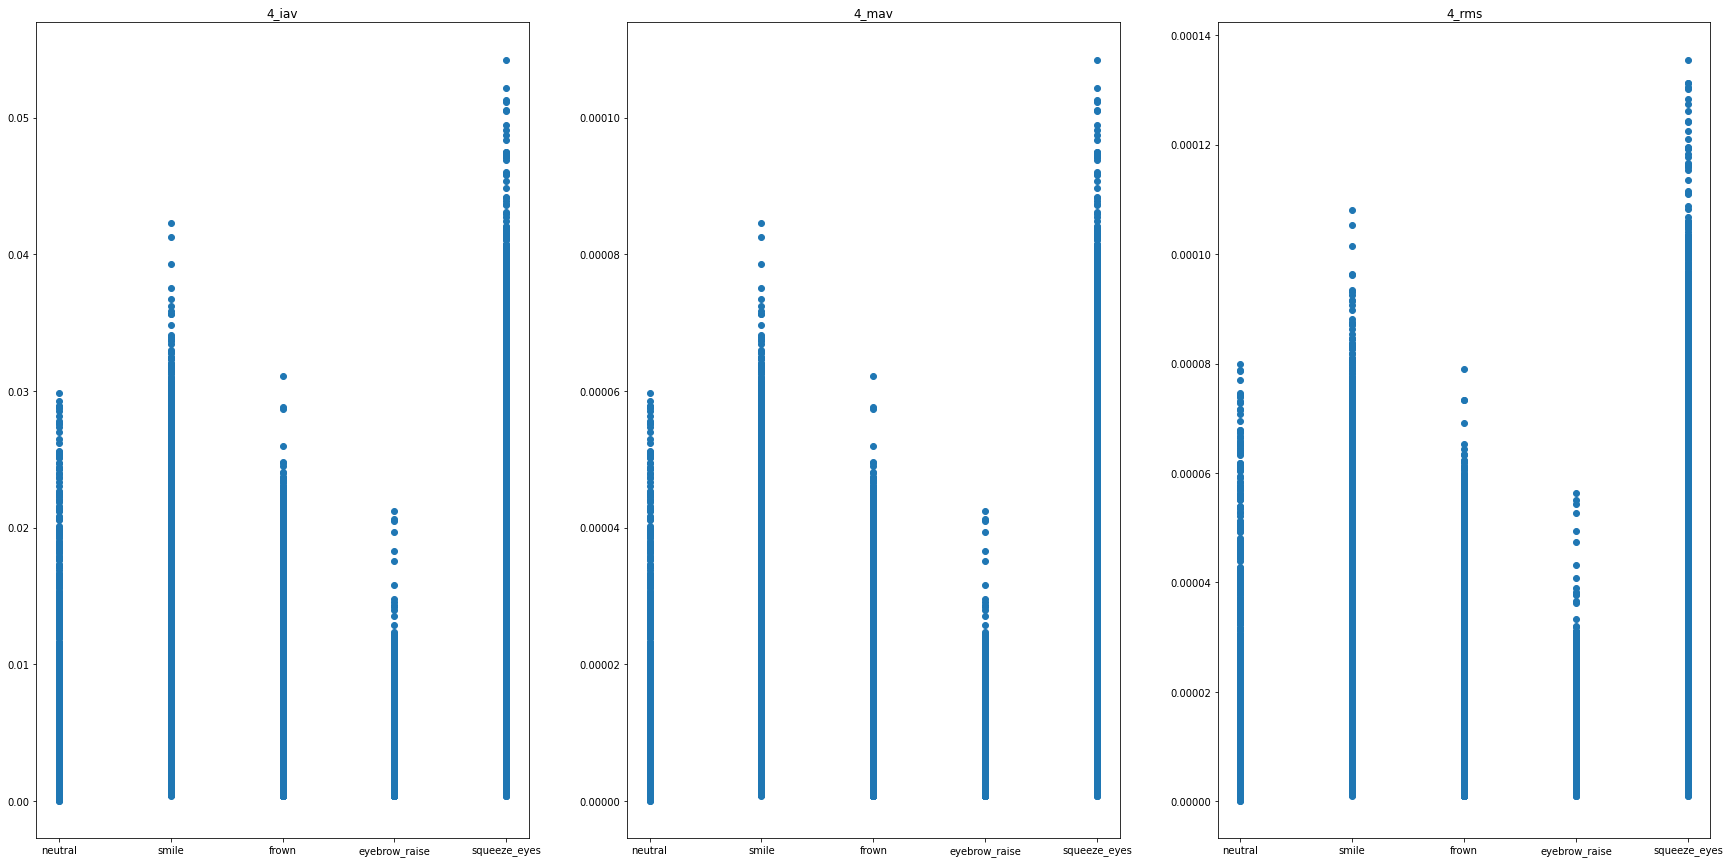

In [234]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('4_iav')
ax2.set_title('4_mav')
ax3.set_title('4_rms')




ax1.scatter(y_trainB['event'], X_trainB['4_iav'])
ax2.scatter(y_trainB['event'], X_trainB['4_mav'])
ax3.scatter(y_trainB['event'], X_trainB['4_rms'])

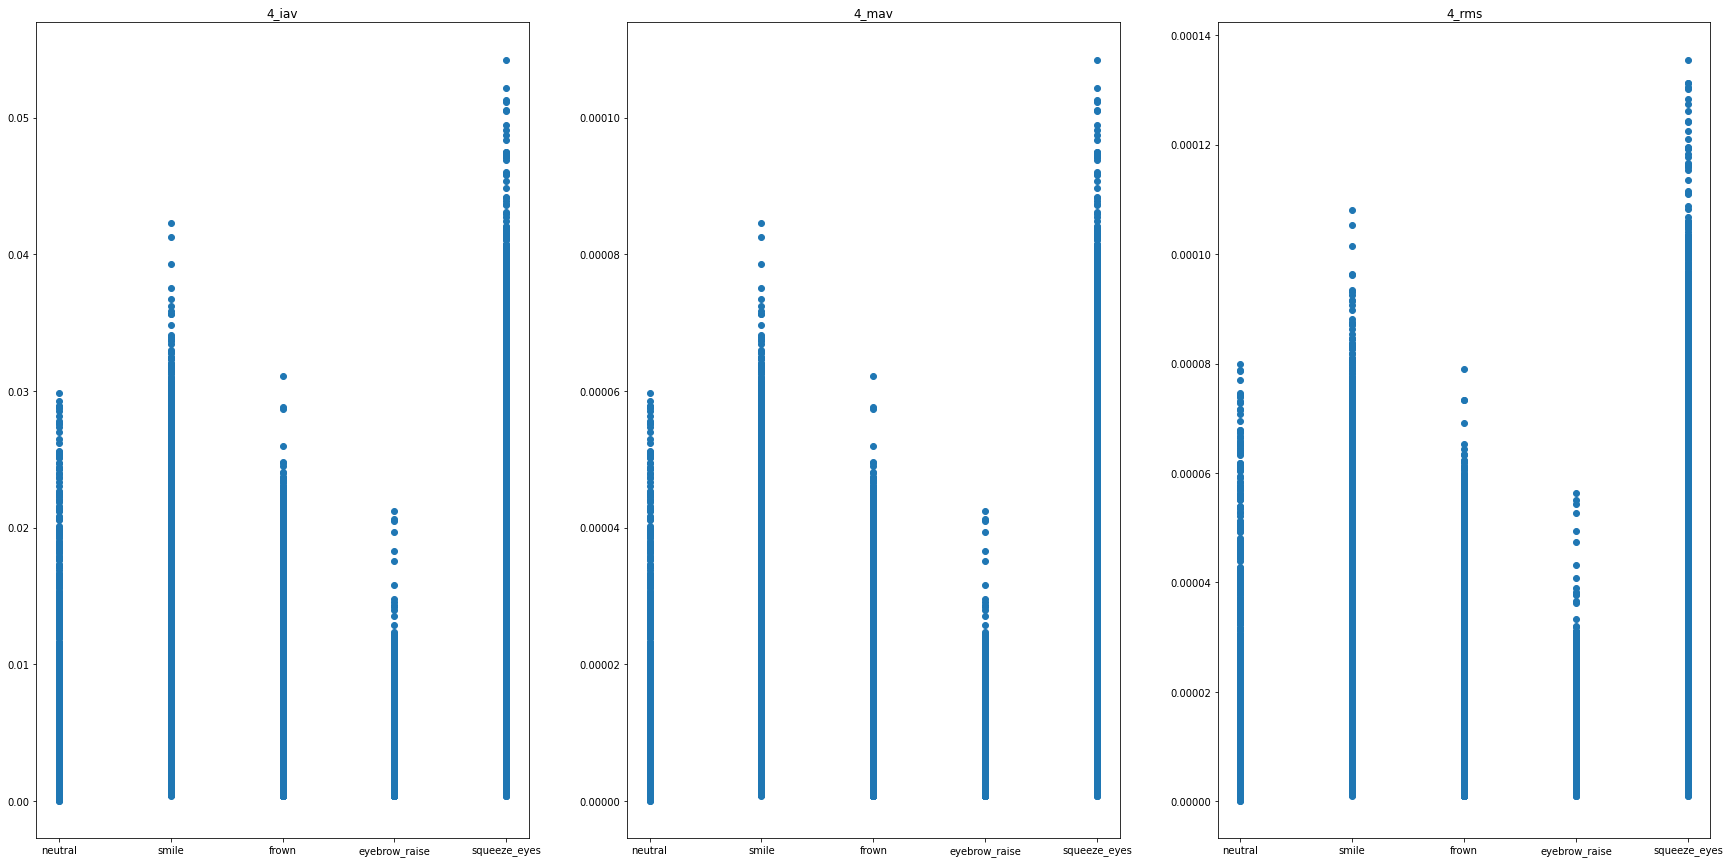

In [235]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('4_iav')
ax2.set_title('4_mav')
ax3.set_title('4_rms')




ax1.scatter(y_trainB['event'], X_trainB['4_iav'])
ax2.scatter(y_trainB['event'], X_trainB['4_mav'])
ax3.scatter(y_trainB['event'], X_trainB['4_rms'])

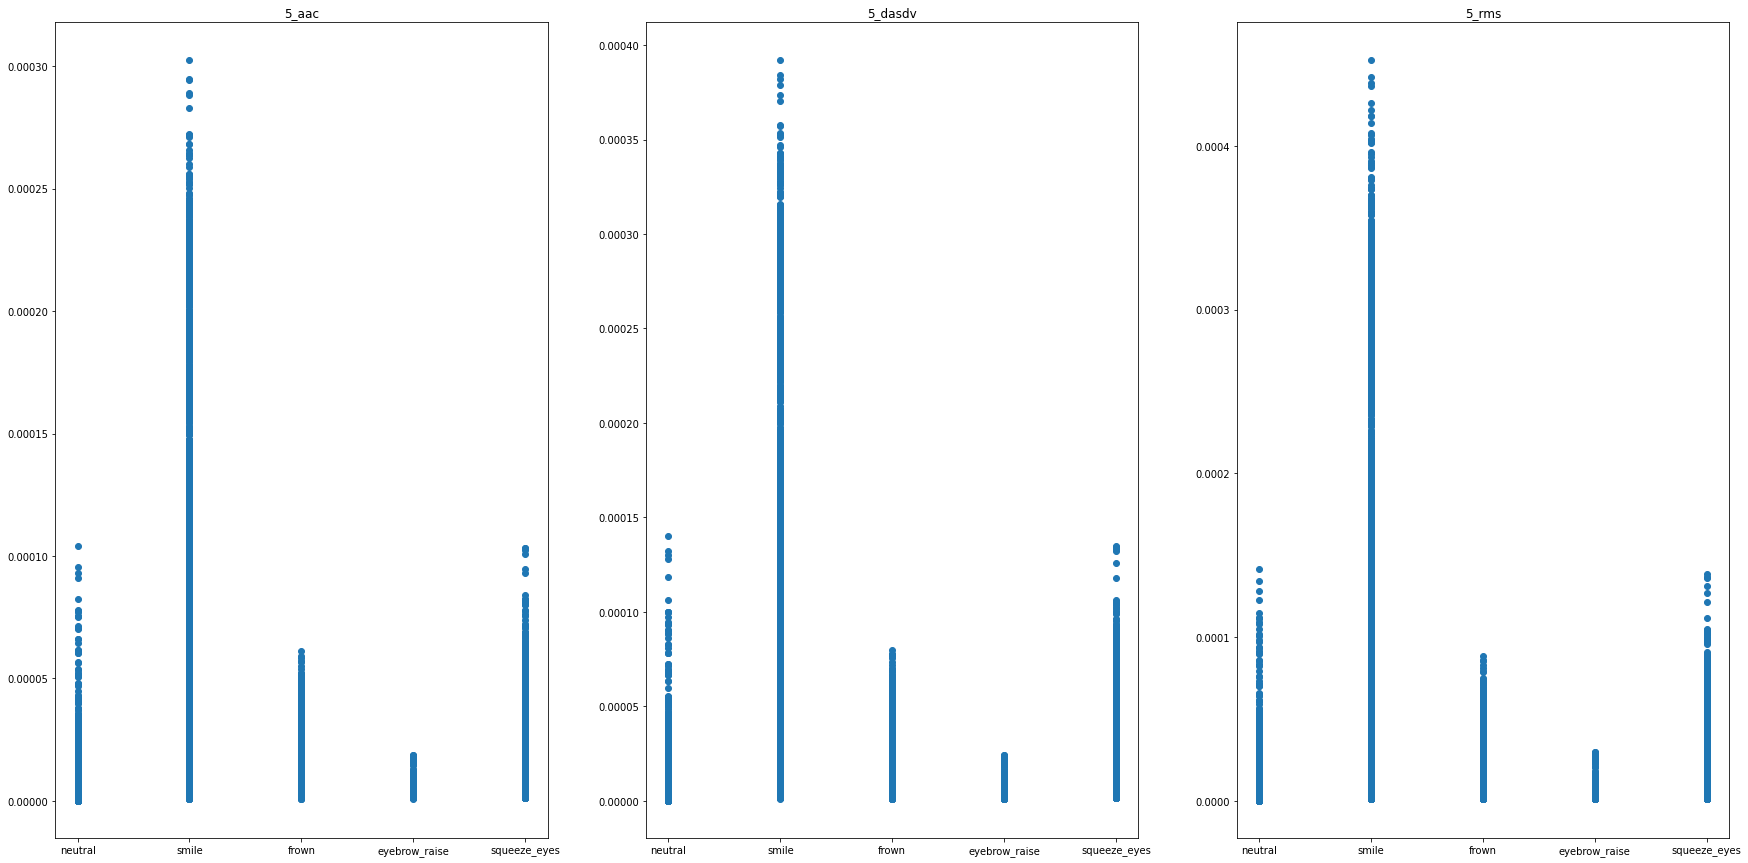

In [236]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('5_aac')
ax2.set_title('5_dasdv')
ax3.set_title('5_rms')




ax1.scatter(y_trainB['event'], X_trainB['5_aac'])
ax2.scatter(y_trainB['event'], X_trainB['5_dasdv'])
ax3.scatter(y_trainB['event'], X_trainB['5_rms'])

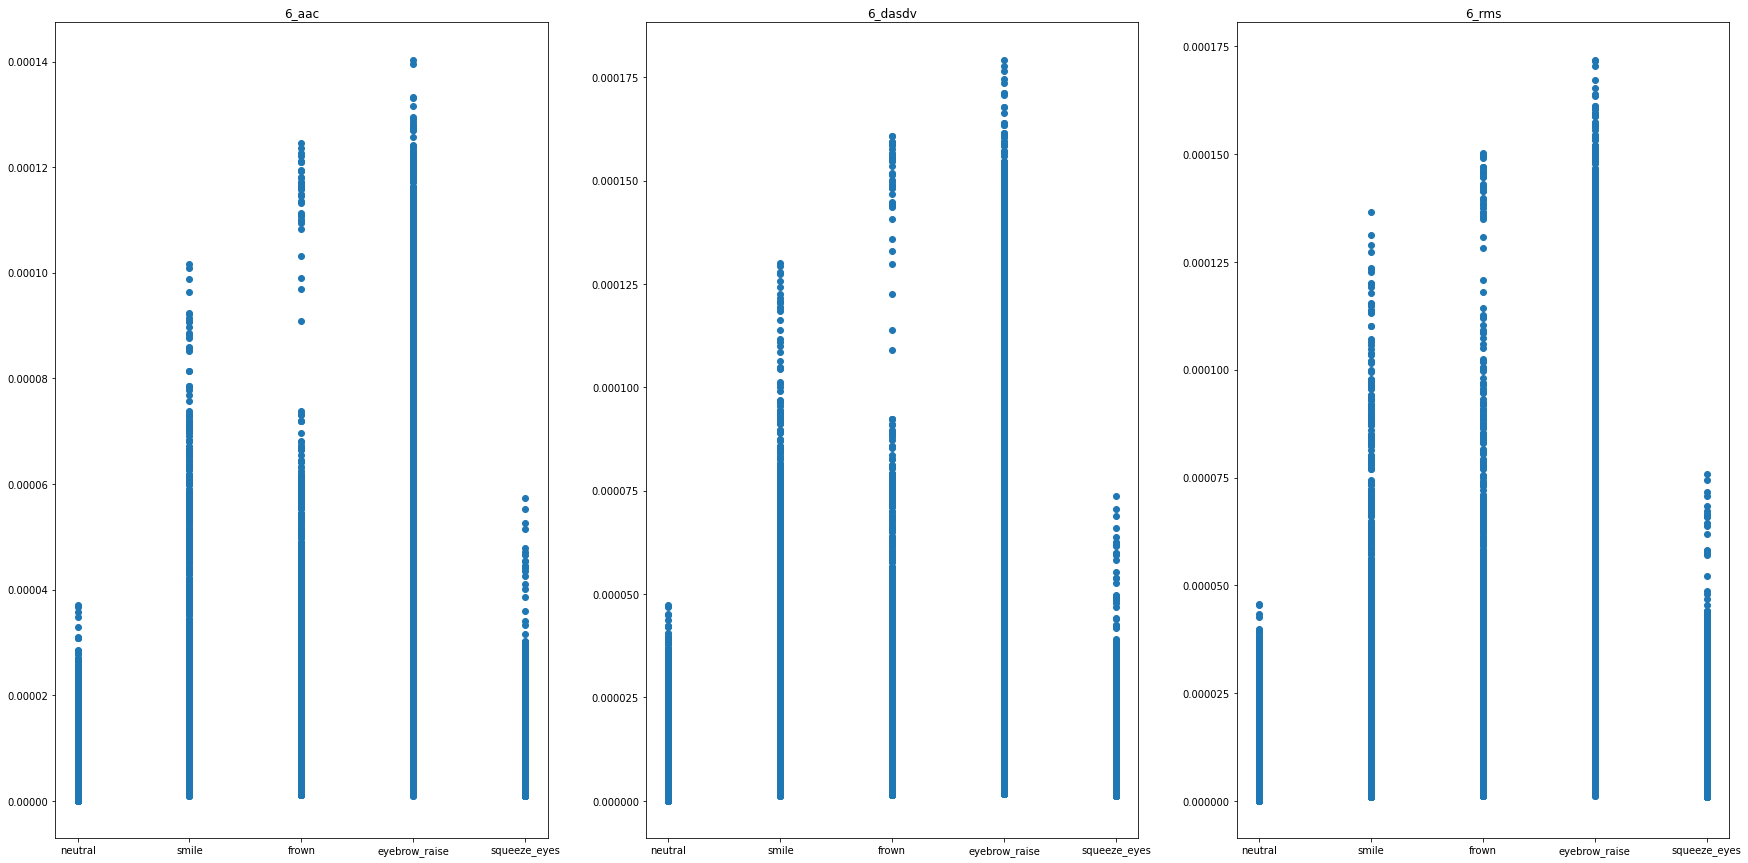

In [237]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



ax1.set_title('6_aac')
ax2.set_title('6_dasdv')
ax3.set_title('6_rms')




ax1.scatter(y_trainB['event'], X_trainB['6_aac'])
ax2.scatter(y_trainB['event'], X_trainB['6_dasdv'])
ax3.scatter(y_trainB['event'], X_trainB['6_rms'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='event', ylabel='count'>

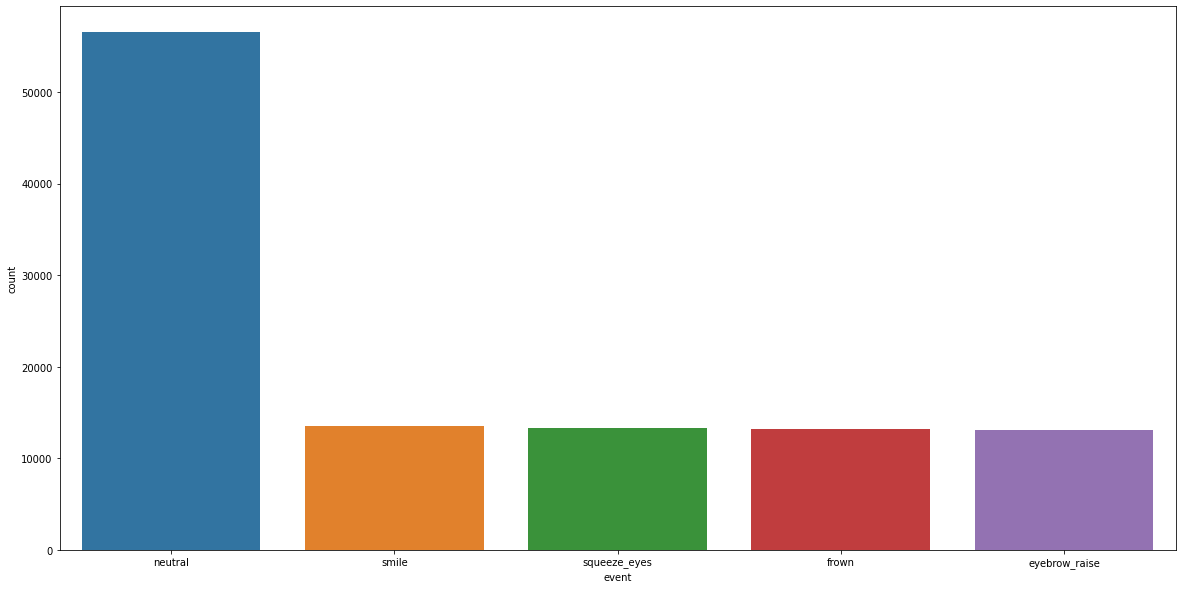

In [238]:
plt.figure(figsize = (20,10))
sns.countplot(y_trainB['event'], order = y_trainB['event'].value_counts().index)

## Predictions based on best model trained on Task A
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### XGBoost

In [239]:
y_validXGB_B = le.fit_transform(y_validB)
y_testXGB_B = le.fit_transform(y_testB)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [240]:
y_predXGB_B_A = xgb_rus.predict(X_validB)
predictions_B_A = [round(value) for value in y_predXGB_B_A]
score_xgb_B_A = accuracy_score(y_validXGB_B, predictions_B_A)
f1_xgb_B_A = f1_score(y_validXGB_B, predictions_B_A, average='macro')
print ('Accuracy: '+str(score_xgb_B_A*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_A))

Accuracy: 78.92571012381646 %
F1-Score: 0.7256341709842398


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


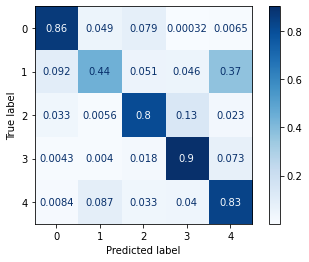

In [241]:
plot_confusion_matrix(estimator=xgb_rus, X=X_validB, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [242]:
y_predXGB_B_A = xgb.predict(X_testB)
predictions_B_A = [round(value) for value in y_predXGB_B_A]
score_xgb_B_A = accuracy_score(y_testXGB_B, predictions_B_A)
f1_xgb_B_A = f1_score(y_testXGB_B, predictions_B_A, average='macro')
print ('Accuracy: '+str(score_xgb_B_A*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_A))

Accuracy: 85.445580715851 %
F1-Score: 0.794787191639184


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


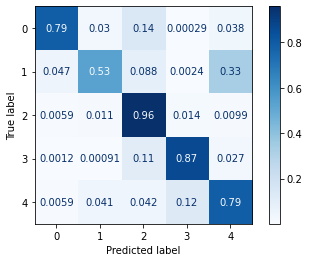

In [243]:
plot_confusion_matrix(estimator=xgb, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

### Random Forest

In [244]:
y_pred_rf_B_A = clf_rf_rus.predict(X_validB)
score_rf_B_A = clf_rf_rus.score(X_validB, y_validB)
f1_rf_B_A = f1_score(y_validB, y_pred_rf_B_A, average='macro')
print ('Accuracy: '+str(score_rf_B_A*100)+' %')
print ('F1-Score: '+str(f1_rf_B_A))

Accuracy: 78.0517115804807 %
F1-Score: 0.7041531312677061


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


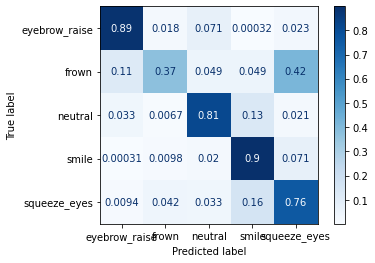

In [245]:
plot_confusion_matrix(estimator=clf_rf_rus, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [246]:
y_pred_rf_B_A = clf_rf_rus.predict(X_testB)
score_rf_B_A = clf_rf_rus.score(X_testB, y_testB)
f1_rf_B_A = f1_score(y_testB, y_pred_rf_B_A, average='macro')
print ('Accuracy: '+str(score_rf_B_A*100)+' %')
print ('F1-Score: '+str(f1_rf_B_A))

Accuracy: 80.97151205259313 %
F1-Score: 0.7558860212831997


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


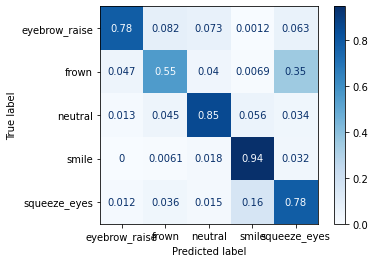

In [247]:
plot_confusion_matrix(estimator=clf_rf_rus, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### Decision Tree

In [248]:
y_pred_tree_B_A = clf_tree.predict(X_testB)
score_tree_B_A = clf_tree.score(X_testB, y_testB)
f1_tree_B_A = f1_score(y_testB, y_pred_rf_B_A, average='macro')
print ('Accuracy: '+str(score_tree_B_A*100)+' %')
print ('F1-Score: '+str(f1_tree_B_A))

Accuracy: 69.70416362308254 %
F1-Score: 0.7558860212831997


<br>

## Training Default Task B
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Dummy Classifier

In [249]:
dclfB = DummyClassifier(strategy="most_frequent", random_state = 0)
dclfB.fit(X_trainB, y_trainB)

DummyClassifier(random_state=0, strategy='most_frequent')

In [250]:
score_dummyB = dclfB.score(X_validB, y_validB)
y_pred_dummyB = dclfB.predict(X_validB)
f1_dummyB=f1_score(y_validB, y_pred_dummyB, average='macro')
print ('Accuracy: '+str(score_dummyB*100)+' %')
print ('F1-Score: '+str(f1_dummyB))

Accuracy: 55.57902403495994 %
F1-Score: 0.1428959318383971


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


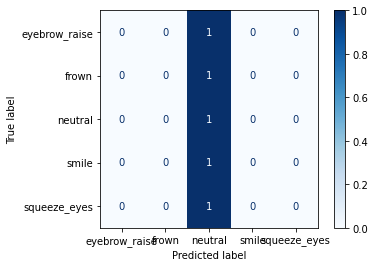

In [251]:
plot_confusion_matrix(estimator=dclfB, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')


In [252]:
score_dummyB = dclfB.score(X_testB, y_testB)
y_pred_dummyB = dclfB.predict(X_testB)
f1_dummyB=f1_score(y_testB, y_pred_dummyB, average='macro')
print ('Accuracy: '+str(score_dummyB*100)+' %')
print ('F1-Score: '+str(f1_dummyB))

Accuracy: 51.58144631117604 %
F1-Score: 0.13611546153290124


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


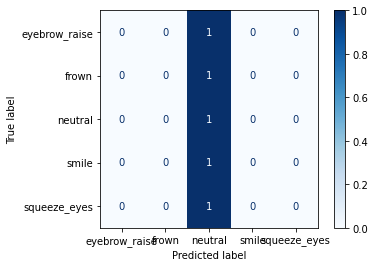

In [253]:
plot_confusion_matrix(estimator=dclfB, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### Decision Tree

In [254]:
clf_treeB = tree.DecisionTreeClassifier()
clf_treeB.fit(X_trainB, y_trainB)

DecisionTreeClassifier()

In [255]:
score_treeB = clf_treeB.score(X_validB, y_validB)
y_pred_treeB = clf_treeB.predict(X_validB)
f1_treeB=f1_score(y_validB, y_pred_treeB, average='macro')
print ('Accuracy: '+str(score_treeB*100)+' %')
print ('F1-Score: '+str(f1_treeB))

Accuracy: 73.6489439184268 %
F1-Score: 0.6223058523080279


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


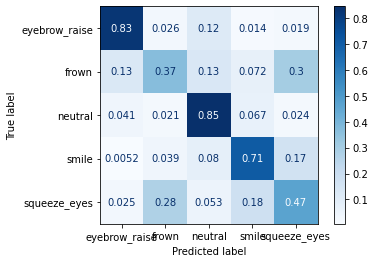

In [256]:
plot_confusion_matrix(estimator=clf_treeB, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')


In [257]:
score_treeB = clf_treeB.score(X_testB, y_testB)
y_pred_treeB = clf_treeB.predict(X_testB)
f1_treeB=f1_score(y_testB, y_pred_treeB, average='macro')
print ('Accuracy: '+str(score_treeB*100)+' %')
print ('F1-Score: '+str(f1_treeB))

Accuracy: 73.41855368882396 %
F1-Score: 0.6531316236485015


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


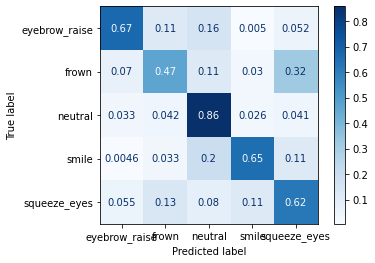

In [258]:
plot_confusion_matrix(estimator=clf_treeB, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

In [259]:
score_treeB = clf_treeB.score(X_test, y_test)
y_pred_treeB = clf_treeB.predict(X_test)
f1_treeB=f1_score(y_test, y_pred_treeB, average='macro')
print ('Accuracy: '+str(score_treeB*100)+' %')
print ('F1-Score: '+str(f1_treeB))

Accuracy: 56.282642089093706 %
F1-Score: 0.14642528873436436


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


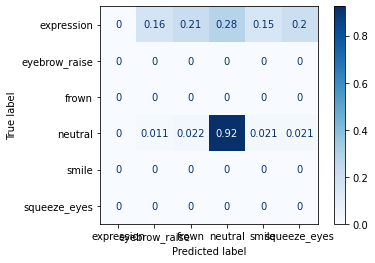

In [260]:
plot_confusion_matrix(estimator=clf_treeB, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest

In [261]:
clf_rfB = RandomForestClassifier(random_state=42)
clf_rfB.fit(X_trainB, y_trainB)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [262]:
y_pred_rfB = clf_rfB.predict(X_validB)
score_rfB = clf_rfB.score(X_validB, y_validB)
f1_rfB = f1_score(y_validB, y_pred_rfB, average='macro')
print ('Accuracy: '+str(score_rfB*100)+' %')
print ('F1-Score: '+str(f1_rfB))


Accuracy: 84.5156591405681 %
F1-Score: 0.7436339320771559


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


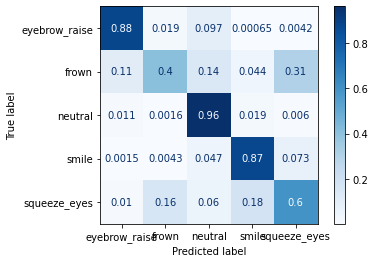

In [263]:
plot_confusion_matrix(estimator=clf_rfB, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [264]:
y_pred_rfB = clf_rfB.predict(X_testB)
score_rfB = clf_rfB.score(X_testB, y_testB)
f1_rfB = f1_score(y_testB, y_pred_rfB, average='macro')
print ('Accuracy: '+str(score_rfB*100)+' %')
print ('F1-Score: '+str(f1_rfB))


Accuracy: 84.34989043097151 %
F1-Score: 0.7740220323625145


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


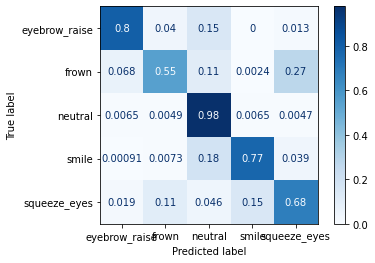

In [265]:
plot_confusion_matrix(estimator=clf_rfB, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

In [266]:
y_pred_rfB = clf_rfB.predict(X_test_eo)
score_rfB = clf_rfB.score(X_test_eo, y_test_eo)
f1_rfB = f1_score(y_test_eo, y_pred_rfB, average='macro')
print ('Accuracy: '+str(score_rfB*100)+' %')
print ('F1-Score: '+str(f1_rfB))

Accuracy: 64.57651525068727 %
F1-Score: 0.6026387143146523


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


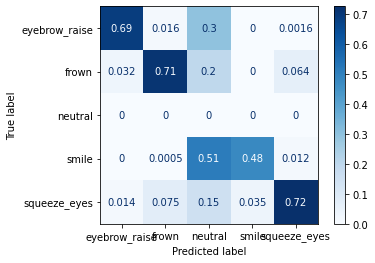

In [267]:
plot_confusion_matrix(estimator=clf_rfB, X=X_test_eo, y_true=y_test_eo,
                      normalize='true', cmap='Blues')

### XGBoost

In [268]:
xgbB = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_B = le.fit_transform(y_trainB)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [269]:
xgbB.fit(X_trainB, y_trainXGB_B)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [270]:
y_validXGB_B = le.fit_transform(y_validB)
y_predXGB_B = xgbB.predict(X_validB)
predictions_B = [round(value) for value in y_predXGB_B]
score_xgb_B = accuracy_score(y_validXGB_B, predictions_B)
f1_xgb_B = f1_score(y_validXGB_B, predictions_B, average='macro')
print ('Accuracy: '+str(score_xgb_B*100)+' %')
print ('F1-Score: '+str(f1_xgb_B))


Accuracy: 84.5375091041515 %
F1-Score: 0.7469108729338213


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


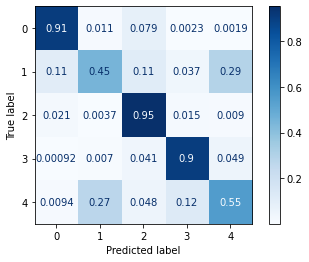

In [271]:
plot_confusion_matrix(estimator=xgbB, X=X_validB, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [272]:
y_testXGB_B = le.fit_transform(y_testB)
y_predXGB_B = xgbB.predict(X_testB)
predictions_B = [round(value) for value in y_predXGB_B]
score_xgb_B = accuracy_score(y_testXGB_B, predictions_B)
f1_xgb_B = f1_score(y_testXGB_B, predictions_B, average='macro')
print ('Accuracy: '+str(score_xgb_B*100)+' %')
print ('F1-Score: '+str(f1_xgb_B))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 86.245434623813 %
F1-Score: 0.8095932952825787


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


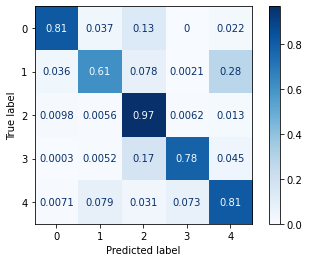

In [273]:
plot_confusion_matrix(estimator=xgbB, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

## Undersampling - Task B
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [274]:
dict_os = {
  "eyebrow_raise": 13140,
  "frown": 13159,
  "neutral": 12000 ,
  "smile": 13578 ,
  "squeeze_eyes": 13319 
}

In [275]:
y_trainB.value_counts()

event        
neutral          56524
smile            13578
squeeze_eyes     13319
frown            13159
eyebrow_raise    13140
dtype: int64

In [276]:
undersample = RandomUnderSampler(sampling_strategy=dict_os, random_state=42)
X_trainB_us = X_trainB
y_trainB_us = y_trainB
X_trainB_us, y_trainB_us = undersample.fit_resample(X_trainB_us, y_trainB_us)

In [277]:
y_trainB_us['event'].value_counts()

smile            13578
squeeze_eyes     13319
frown            13159
eyebrow_raise    13140
neutral          12000
Name: event, dtype: int64

<br>

### Decision Tree - Undersampling

In [278]:
clf_treeB_us = tree.DecisionTreeClassifier()
clf_treeB_us.fit(X_trainB_us, y_trainB_us)

DecisionTreeClassifier()

In [279]:
score_treeB_us = clf_treeB_us.score(X_validB, y_validB)
y_pred_treeB_us = clf_treeB_us.predict(X_validB)
f1_treeB_us=f1_score(y_validB, y_pred_treeB_us, average='macro')
print ('Accuracy: '+str(score_treeB_us*100)+' %')
print ('F1-Score: '+str(f1_treeB_us))

Accuracy: 68.27021121631464 %
F1-Score: 0.5728543152358042


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


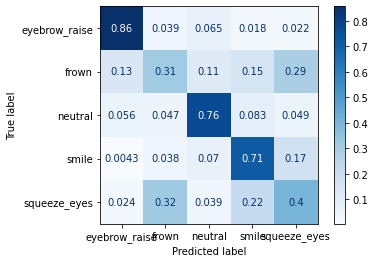

In [280]:
plot_confusion_matrix(estimator=clf_treeB_us, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')


In [281]:
score_treeB_us = clf_treeB_us.score(X_testB, y_testB)
y_pred_treeB_us = clf_treeB_us.predict(X_testB)
f1_treeB_us=f1_score(y_testB, y_pred_treeB_us, average='macro')
print ('Accuracy: '+str(score_treeB_us*100)+' %')
print ('F1-Score: '+str(f1_treeB_us))

Accuracy: 71.00438276113951 %
F1-Score: 0.6475223350830945


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


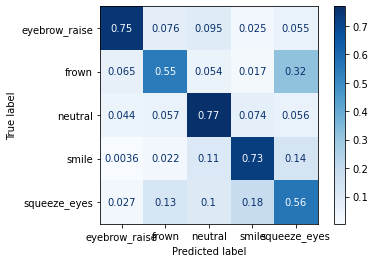

In [282]:
plot_confusion_matrix(estimator=clf_treeB_us, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

In [283]:
score_treeB_us = clf_treeB_us.score(X_test, y_test)
y_pred_treeB_us = clf_treeB_us.predict(X_test)
f1_treeB_us=f1_score(y_test, y_pred_treeB_us, average='macro')
print ('Accuracy: '+str(score_treeB_us*100)+' %')
print ('F1-Score: '+str(f1_treeB_us))

Accuracy: 52.74961597542243 %
F1-Score: 0.1447784476579957


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


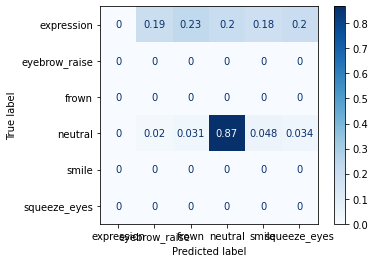

In [284]:
plot_confusion_matrix(estimator=clf_treeB_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest - Undersampling


In [285]:
clf_rfB_us = RandomForestClassifier(random_state=42)
clf_rfB_us.fit(X_trainB_us, y_trainB_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [286]:
y_pred_rfB_us = clf_rfB_us.predict(X_validB)
score_rfB_us = clf_rfB_us.score(X_validB, y_validB)
f1_rfB_us = f1_score(y_validB, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))


Accuracy: 82.04297159504735 %
F1-Score: 0.7288866701594682


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


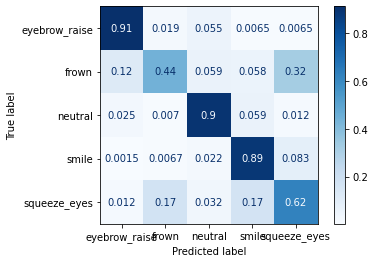

In [287]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [288]:
y_pred_rfB_us = clf_rfB_us.predict(X_testB)
score_rfB_us = clf_rfB_us.score(X_testB, y_testB)
f1_rfB_us = f1_score(y_testB, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))

Accuracy: 84.68955441928415 %
F1-Score: 0.7867112455036641


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


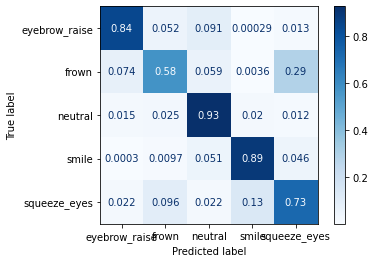

In [289]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

In [290]:
y_pred_rfB_us = clf_rfB_us.predict(X_test)
score_rfB_us = clf_rfB_us.score(X_test, y_test)
f1_rfB_us = f1_score(y_test, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))

Accuracy: 58.30517153097799 %
F1-Score: 0.15226519041506206


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


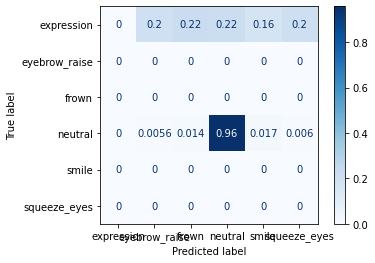

In [291]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - Undersampling

In [292]:
xgbB_us = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_B_us = le.fit_transform(y_trainB_us)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [293]:
xgbB_us.fit(X_trainB_us, y_trainXGB_B_us)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [294]:
y_validXGB_B = le.fit_transform(y_validB)
y_predXGB_B_us = xgbB_us.predict(X_validB)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_validXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_validXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))


Accuracy: 82.38892935178441 %
F1-Score: 0.7318379570543093


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


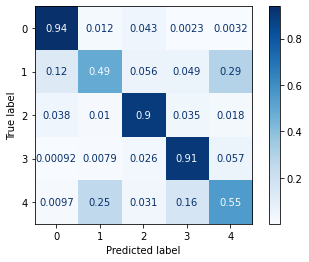

In [295]:
plot_confusion_matrix(estimator=xgbB_us, X=X_validB, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [296]:
y_testXGB_B = le.fit_transform(y_testB)
y_predXGB_B_us = xgbB_us.predict(X_testB)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_testXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_testXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 84.19649379108839 %
F1-Score: 0.786178966823065


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


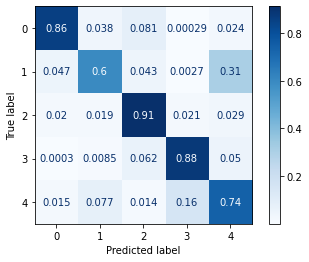

In [297]:
plot_confusion_matrix(estimator=xgbB_us, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

In [298]:
y_testXGB_B = le.fit_transform(y_test)
y_predXGB_B_us = xgbB_us.predict(X_test)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_testXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_testXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 8.494623655913978 %
F1-Score: 0.06951556489807545


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


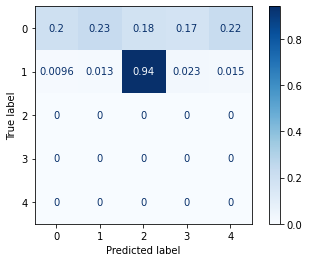

In [299]:
plot_confusion_matrix(estimator=xgbB_us, X=X_test, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

<br>

# TRYING TO IMPROVE THE MODEL
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Oversampling - frown & squeeze eyes

In [300]:
dict_os2 = {
  "eyebrow_raise": 8834,
  "frown": 14230,
  "neutral": 42338 ,
  "smile": 8374 ,
  "squeeze_eyes": 13423 
}

In [301]:
from imblearn.over_sampling import SMOTE

In [302]:
oversample = SMOTE(sampling_strategy=dict_os2, k_neighbors=5)

In [303]:
X_train_os, y_train_os = oversample.fit_resample(X_train_us, y_train_us)

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (42338) in class neutral will be larger than the number of samples in the majority class (class #neutral -> 40537)
  f"After over-sampling, the number of samples ({n_samples})"


In [304]:
y_train_os.value_counts()

event        
neutral          42338
frown            14230
squeeze_eyes     13423
eyebrow_raise     8834
smile             8374
dtype: int64

In [305]:
xgb_os = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_os = le.fit_transform(y_train_os)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [306]:
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

In [307]:
xgb_os.fit(X_train_os, y_trainXGB_os)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [308]:
y_predXGB_os = xgb_os.predict(X_valid)
predictions_os = [round(value) for value in y_predXGB_os]
score_xgb_os = accuracy_score(y_validXGB, predictions_os)
f1_xgb_os = f1_score(y_validXGB, predictions_os, average='macro')
print ('Accuracy: '+str(score_xgb_os*100)+' %')
print ('F1-Score: '+str(f1_xgb_os))

Accuracy: 7.483409903011741 %
F1-Score: 0.06807160475783655


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


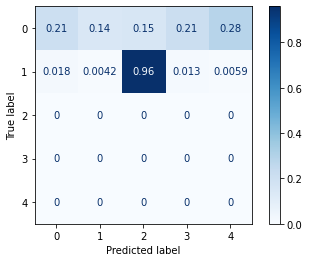

In [309]:
plot_confusion_matrix(estimator=xgb_os, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [310]:
y_predXGB_os = xgb_os.predict(X_test)
predictions_os = [round(value) for value in y_predXGB_os]
score_xgb_os = accuracy_score(y_testXGB, predictions_os)
f1_xgb_os = f1_score(y_testXGB, predictions_os, average='macro')
print ('Accuracy: '+str(score_xgb_os*100)+' %')
print ('F1-Score: '+str(f1_xgb_os))

Accuracy: 7.096774193548387 %
F1-Score: 0.06055311760899177


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


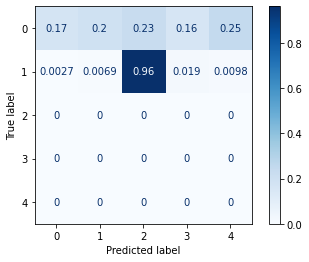

In [311]:
plot_confusion_matrix(estimator=xgb_os, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

# Training on B testing on A 
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [312]:
y_validXGB_B = le.fit_transform(y_valid)
y_predXGB_B = xgbB.predict(X_valid)
predictions_B = [round(value) for value in y_predXGB_B]
score_xgb_B = accuracy_score(y_validXGB_B, predictions_B)
f1_xgb_B = f1_score(y_validXGB_B, predictions_B, average='macro')
print ('Accuracy: '+str(score_xgb_B*100)+' %')
print ('F1-Score: '+str(f1_xgb_B))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 7.764165390505359 %
F1-Score: 0.07062831081075258


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


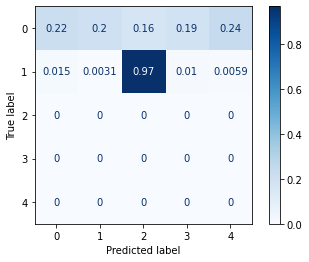

In [313]:
plot_confusion_matrix(estimator=xgbB, X=X_valid, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [314]:
y_testXGB_B = le.fit_transform(y_test)
y_predXGB_B = xgbB.predict(X_test)
predictions_B = [round(value) for value in y_predXGB_B]
score_xgb_B = accuracy_score(y_testXGB_B, predictions_B)
f1_xgb_B = f1_score(y_testXGB_B, predictions_B, average='macro')
print ('Accuracy: '+str(score_xgb_B*100)+' %')
print ('F1-Score: '+str(f1_xgb_B))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 7.378392217101895 %
F1-Score: 0.06243757058268512


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


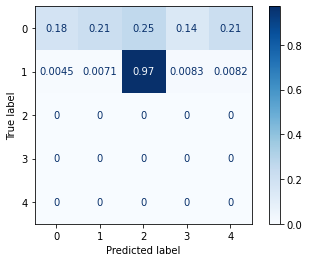

In [315]:
plot_confusion_matrix(estimator=xgbB, X=X_test, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

# Merging Task A and Task B
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [316]:
DF_listFull=list()

In [317]:
for i in range (0, 30):
    frames = [DF_listA[i], DF_listB[i]]
    result = pd.concat(frames)
    DF_listFull.insert(i, result)

    

In [318]:
DF_trainFull = list()
DF_validationFull = list()
DF_testFull = list()
k=0

In [319]:
for i in training_subjects:
    DF_trainFull.insert(k, DF_listFull[i-1])
    k=k+1

In [320]:
k=0
for i in validation_subjects:
    DF_validationFull.insert(k, DF_listFull[i-1])
    k=k+1

In [321]:
k=0
for i in test_subjects:
    DF_testFull.insert(k, DF_listFull[i-1])
    k=k+1

In [322]:
trainDataFull = pd.concat(DF_trainFull, ignore_index=True)
validDataFull = pd.concat(DF_validationFull, ignore_index=True)
testDataFull = pd.concat (DF_testFull, ignore_index=True)

X_trainFull = trainDataFull.drop(['event'], axis=1)
y_trainFull = pd.DataFrame(trainDataFull.iloc[:,-1])

X_validFull = validDataFull.drop(['event'], axis=1)
y_validFull = pd.DataFrame(validDataFull.iloc[:,-1])

X_testFull = testDataFull.drop(['event'], axis=1)
y_testFull = pd.DataFrame(testDataFull.iloc[:,-1])


In [323]:
trainDataFull

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx,event
0,0.000239,1.638807e-08,-0.792585,3.046877,-4.630699,3.376406,0.792585,-4.254332,-15.069834,72.946410,...,886.323611,1034.24,1034.24,9.515519e-19,2.388395e-16,95944.576112,95944.576112,1.059308,1.410458e-08,neutral
1,0.000238,1.670549e-08,-0.793107,3.050583,-4.634412,3.376935,0.793107,-4.260304,-15.109591,73.159224,...,888.641711,1034.24,1034.24,9.559702e-19,2.399485e-16,94691.414013,94691.414013,1.058258,1.394538e-08,neutral
2,0.000281,2.506824e-07,0.323033,0.045824,-0.210550,0.538019,-0.323033,-0.038422,0.202461,-0.701410,...,1155.245887,931.84,921.60,2.461759e-16,6.179016e-14,313782.431824,313782.431824,1.111357,1.382204e-08,neutral
3,0.000311,4.572766e-07,0.122728,0.126412,-0.278373,0.423509,-0.122728,-0.118655,0.245343,-0.579366,...,1002.328750,870.40,829.44,5.192087e-16,1.303214e-13,286343.037756,286343.037756,1.133585,1.653350e-08,neutral
4,0.000360,7.049527e-07,0.027009,-0.045968,-0.347643,0.309458,-0.027009,0.045347,0.363407,-0.478147,...,970.723874,829.44,829.44,7.944146e-16,1.993981e-13,272824.385121,272824.385121,1.135574,3.522982e-08,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192625,0.000424,1.105843e-06,-0.283678,-0.054703,-0.299064,0.138266,0.283678,0.062462,0.317744,-0.204165,...,1036.306247,880.64,675.84,4.860116e-16,1.219889e-13,284017.625453,284017.625453,1.124485,1.434949e-07,neutral
192626,0.000412,1.083210e-06,-0.293886,-0.048547,-0.302243,0.134123,0.293886,0.055680,0.319071,-0.198315,...,1073.263892,911.36,675.84,5.105369e-16,1.281448e-13,280199.666530,280199.666530,1.115012,1.662116e-07,neutral
192627,0.000394,1.047392e-06,-0.258428,-0.013907,-0.297156,0.139468,0.258428,0.015704,0.301822,-0.202609,...,1100.163913,972.80,593.92,4.951706e-16,1.242878e-13,285103.467065,285103.467065,1.111554,1.667598e-07,neutral
192628,0.000383,1.024084e-06,-0.257115,-0.019811,-0.327909,0.142467,0.257115,0.022358,0.335240,-0.214108,...,1107.758800,993.28,686.08,4.651290e-16,1.167474e-13,290983.707250,290983.707250,1.112261,1.526755e-07,neutral


## Training the model - Full dataset

### Dummy Classifier

In [324]:
dclfFull = DummyClassifier(strategy="most_frequent", random_state = 0)
dclfFull.fit(X_trainFull, y_trainFull)


DummyClassifier(random_state=0, strategy='most_frequent')

In [325]:
score_dummyFull = dclfFull.score(X_validFull, y_validFull)
y_pred_dummyFull = dclfFull.predict(X_validFull)
f1_dummyFull=f1_score(y_validFull, y_pred_dummyFull, average='macro')
print ('Accuracy: '+str(score_dummyFull*100)+' %')
print ('F1-Score: '+str(f1_dummyFull))

Accuracy: 59.51328374070138 %
F1-Score: 0.14923718538060785


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


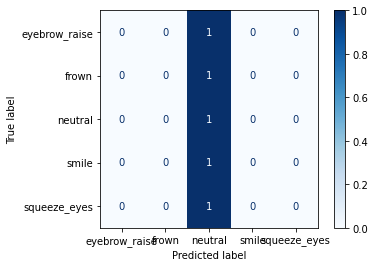

In [326]:
plot_confusion_matrix(estimator=dclfFull, X=X_validFull, y_true=y_validFull,
                      normalize='true', cmap='Blues')

In [327]:
score_dummyFull = dclfFull.score(X_testFull, y_testFull)
y_pred_dummyFull = dclfFull.predict(X_testFull)
f1_dummyFull=f1_score(y_testFull, y_pred_dummyFull, average='macro')
print ('Accuracy: '+str(score_dummyFull*100)+' %')
print ('F1-Score: '+str(f1_dummyFull))

Accuracy: 55.45512683862716 %
F1-Score: 0.1426910207887664


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


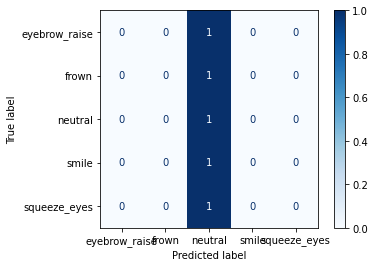

In [328]:
plot_confusion_matrix(estimator=dclfFull, X=X_testFull, y_true=y_testFull,
                      normalize='true', cmap='Blues')

### Decision Tree

In [329]:
clf_treeFull = tree.DecisionTreeClassifier()
clf_treeFull.fit(X_trainFull, y_trainFull)

DecisionTreeClassifier()

In [330]:
score_treeFull = clf_treeFull.score(X_validFull, y_validFull)
y_pred_treeFull = clf_treeFull.predict(X_validFull)
f1_treeFull=f1_score(y_validFull, y_pred_treeFull, average='macro')
print ('Accuracy: '+str(score_treeFull*100)+' %')
print ('F1-Score: '+str(f1_treeFull))

Accuracy: 72.56110520722635 %
F1-Score: 0.607835083044318


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


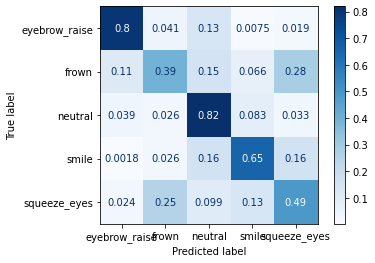

In [331]:
plot_confusion_matrix(estimator=clf_treeFull, X=X_validFull, y_true=y_validFull,
                      normalize='true', cmap='Blues')

In [332]:
score_treeFull = clf_treeFull.score(X_testFull, y_testFull)
y_pred_treeFull = clf_treeFull.predict(X_testFull)
f1_treeFull=f1_score(y_testFull, y_pred_treeFull, average='macro')
print ('Accuracy: '+str(score_treeFull*100)+' %')
print ('F1-Score: '+str(f1_treeFull))

Accuracy: 73.85632061394159 %
F1-Score: 0.6409444808387614


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


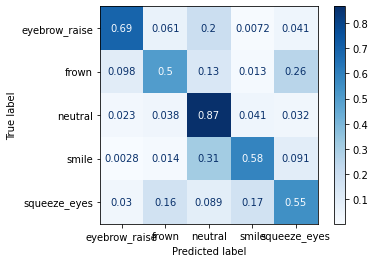

In [333]:
plot_confusion_matrix(estimator=clf_treeFull, X=X_testFull, y_true=y_testFull,
                      normalize='true', cmap='Blues')

### Random Forest

In [334]:
clf_rfFull = RandomForestClassifier(random_state=42)
clf_rfFull.fit(X_trainFull, y_trainFull)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [335]:
y_pred_rfFull = clf_rfFull.predict(X_validFull)
score_rfFull = clf_rfFull.score(X_validFull, y_validFull)
f1_rfFull = f1_score(y_validFull, y_pred_rfFull, average='macro')
print ('Accuracy: '+str(score_rfFull*100)+' %')
print ('F1-Score: '+str(f1_rfFull))

Accuracy: 85.16896918172158 %
F1-Score: 0.7461181474462967


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


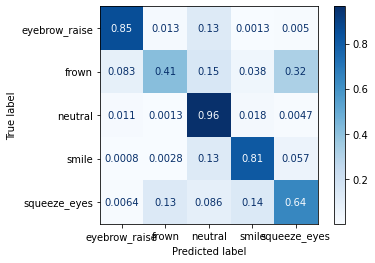

In [336]:
plot_confusion_matrix(estimator=clf_rfFull, X=X_validFull, y_true=y_validFull,
                      normalize='true', cmap='Blues')

In [337]:
y_pred_rfFull = clf_rfFull.predict(X_testFull)
score_rfFull = clf_rfFull.score(X_testFull, y_testFull)
f1_rfFull = f1_score(y_testFull, y_pred_rfFull, average='macro')
print ('Accuracy: '+str(score_rfFull*100)+' %')
print ('F1-Score: '+str(f1_rfFull))

Accuracy: 85.09486250266468 %
F1-Score: 0.7829860685133833


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


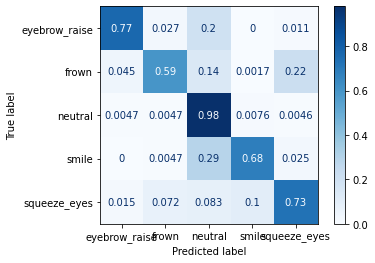

In [338]:
plot_confusion_matrix(estimator=clf_rfFull, X=X_testFull, y_true=y_testFull,
                      normalize='true', cmap='Blues')

### XGBoost

In [339]:
xgbFull = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGBFull = le.fit_transform(y_trainFull)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [340]:
xgbFull.fit(X_trainFull, y_trainXGBFull)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [341]:
y_validXGBFull = le.fit_transform(y_validFull)

y_predXGBFull = xgbFull.predict(X_validFull)
predictionsFull = [round(value) for value in y_predXGBFull]
score_xgbFull = accuracy_score(y_validXGBFull, predictionsFull)
f1_xgbFull = f1_score(y_validXGBFull, predictionsFull, average='macro')
print ('Accuracy: '+str(score_xgbFull*100)+' %')
print ('F1-Score: '+str(f1_xgbFull))

Accuracy: 85.30924548352816 %
F1-Score: 0.757158884083133


In [342]:
y_testXGBFull = le.fit_transform(y_testFull)

y_predXGBFull = xgbFull.predict(X_testFull)
predictionsFull = [round(value) for value in y_predXGBFull]
score_xgbFull = accuracy_score(y_testXGBFull, predictionsFull)
f1_xgbFull = f1_score(y_testXGBFull, predictionsFull, average='macro')
print ('Accuracy: '+str(score_xgbFull*100)+' %')
print ('F1-Score: '+str(f1_xgbFull))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 85.86442123214665 %
F1-Score: 0.7978317690676759


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


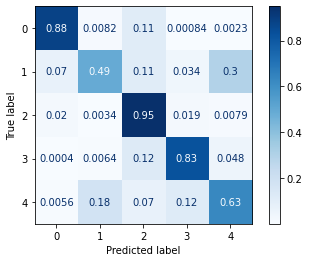

In [343]:
plot_confusion_matrix(estimator=xgbFull, X=X_validFull, y_true=y_validXGBFull,
                      normalize='true', cmap='Blues')